In [1]:
%load_ext autoreload

In [2]:
%autoreload

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import os
import math
import scipy as sp
import numpy as np
import pandas as pd 
pd.set_option('display.max_rows', 200)
pd.set_option('display.max_columns', 200)
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.dpi'] = 200
plt.rcParams['savefig.dpi'] = 200
import seaborn as sns 
sns.set(rc={"figure.dpi":200, 'savefig.dpi':200})
sns.set_context('notebook')
sns.set_style("ticks")
import math

sns.set_style('darkgrid')

from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import kpss

from pmdarima import auto_arima
from statsmodels.tsa.arima.model import ARIMA
import sklearn as skl
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
import statsmodels.api as sm

import warnings
warnings.filterwarnings('ignore')

import datetime

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

In [3]:
def list_directory_tree_with_os_walk(starting_directory):
    for root, directories, files in os.walk(starting_directory):
        print(f"Directory: {root}")
        for file in files:
            print(f"  File: {file}")

list_directory_tree_with_os_walk('.')

Directory: .
  File: Cleaning.ipynb
  File: Forecasting A.ipynb
  File: Forecasting B.ipynb
  File: Forecasting C.ipynb
  File: full_arimax_A.csv
  File: full_arimax_B.csv
  File: full_arimax_C.csv
  File: full_arimax_test_213_0.csv
  File: Getting csv.ipynb
  File: Neg_Pow_Inc_0.csv
  File: Test File.ipynb
Directory: .\data
  File: Readme.md
  File: read_files.ipynb
  File: sample_submission.csv
  File: test.csv
Directory: .\data\A
  File: train_targets.parquet
  File: X_test_estimated.parquet
  File: X_train_estimated.parquet
  File: X_train_observed.parquet
Directory: .\data\B
  File: train_targets.parquet
  File: X_test_estimated.parquet
  File: X_train_estimated.parquet
  File: X_train_observed.parquet
Directory: .\data\C
  File: train_targets.parquet
  File: X_test_estimated.parquet
  File: X_train_estimated.parquet
  File: X_train_observed.parquet
Directory: .\Plots
  File: 1 pv_measurement.png
  File: absolute_humidity_2mgm3.png
  File: air_density_2mkgm3.png
  File: ceiling_he

In [4]:
train_a = pd.read_parquet('data/A/train_targets.parquet')

X_train_estimated_a = pd.read_parquet('data/A/X_train_estimated.parquet').drop("date_calc", axis=1)

X_train_observed_a = pd.read_parquet('data/A/X_train_observed.parquet')

X_test_estimated_a = pd.read_parquet('data/A/X_test_estimated.parquet').drop("date_calc", axis=1)

In [5]:
pd.read_parquet('data/A/train_targets.parquet').set_index("time")

pv_measurement
time                               
2019-06-02 22:00:00            0.00
2019-06-02 23:00:00            0.00
2019-06-03 00:00:00            0.00
2019-06-03 01:00:00            0.00
2019-06-03 02:00:00           19.36
...                             ...
2023-04-30 19:00:00            9.02
2023-04-30 20:00:00            0.00
2023-04-30 21:00:00            0.00
2023-04-30 22:00:00            0.00
2023-04-30 23:00:00            0.00

[34085 rows x 1 columns]

In [6]:
pd.Series(kpss(train_a["pv_measurement"], regression="c", nlags="auto")[0:3], index=["Test Statistic", "p-value", "Lags Used"])

Test Statistic     1.066607
p-value            0.010000
Lags Used         51.000000
dtype: float64

In [7]:
pd.Series(adfuller(train_a["pv_measurement"])[0:4], index=["Test Statistic","p-value","#Lags Used","Number of Observations Used",])

Test Statistic                -9.879491e+00
p-value                        3.803447e-17
#Lags Used                     5.200000e+01
Number of Observations Used    3.403200e+04
dtype: float64

<Axes: >

Error in callback <function _draw_all_if_interactive at 0x000001D30BFD74C0> (for post_execute):


KeyboardInterrupt: 

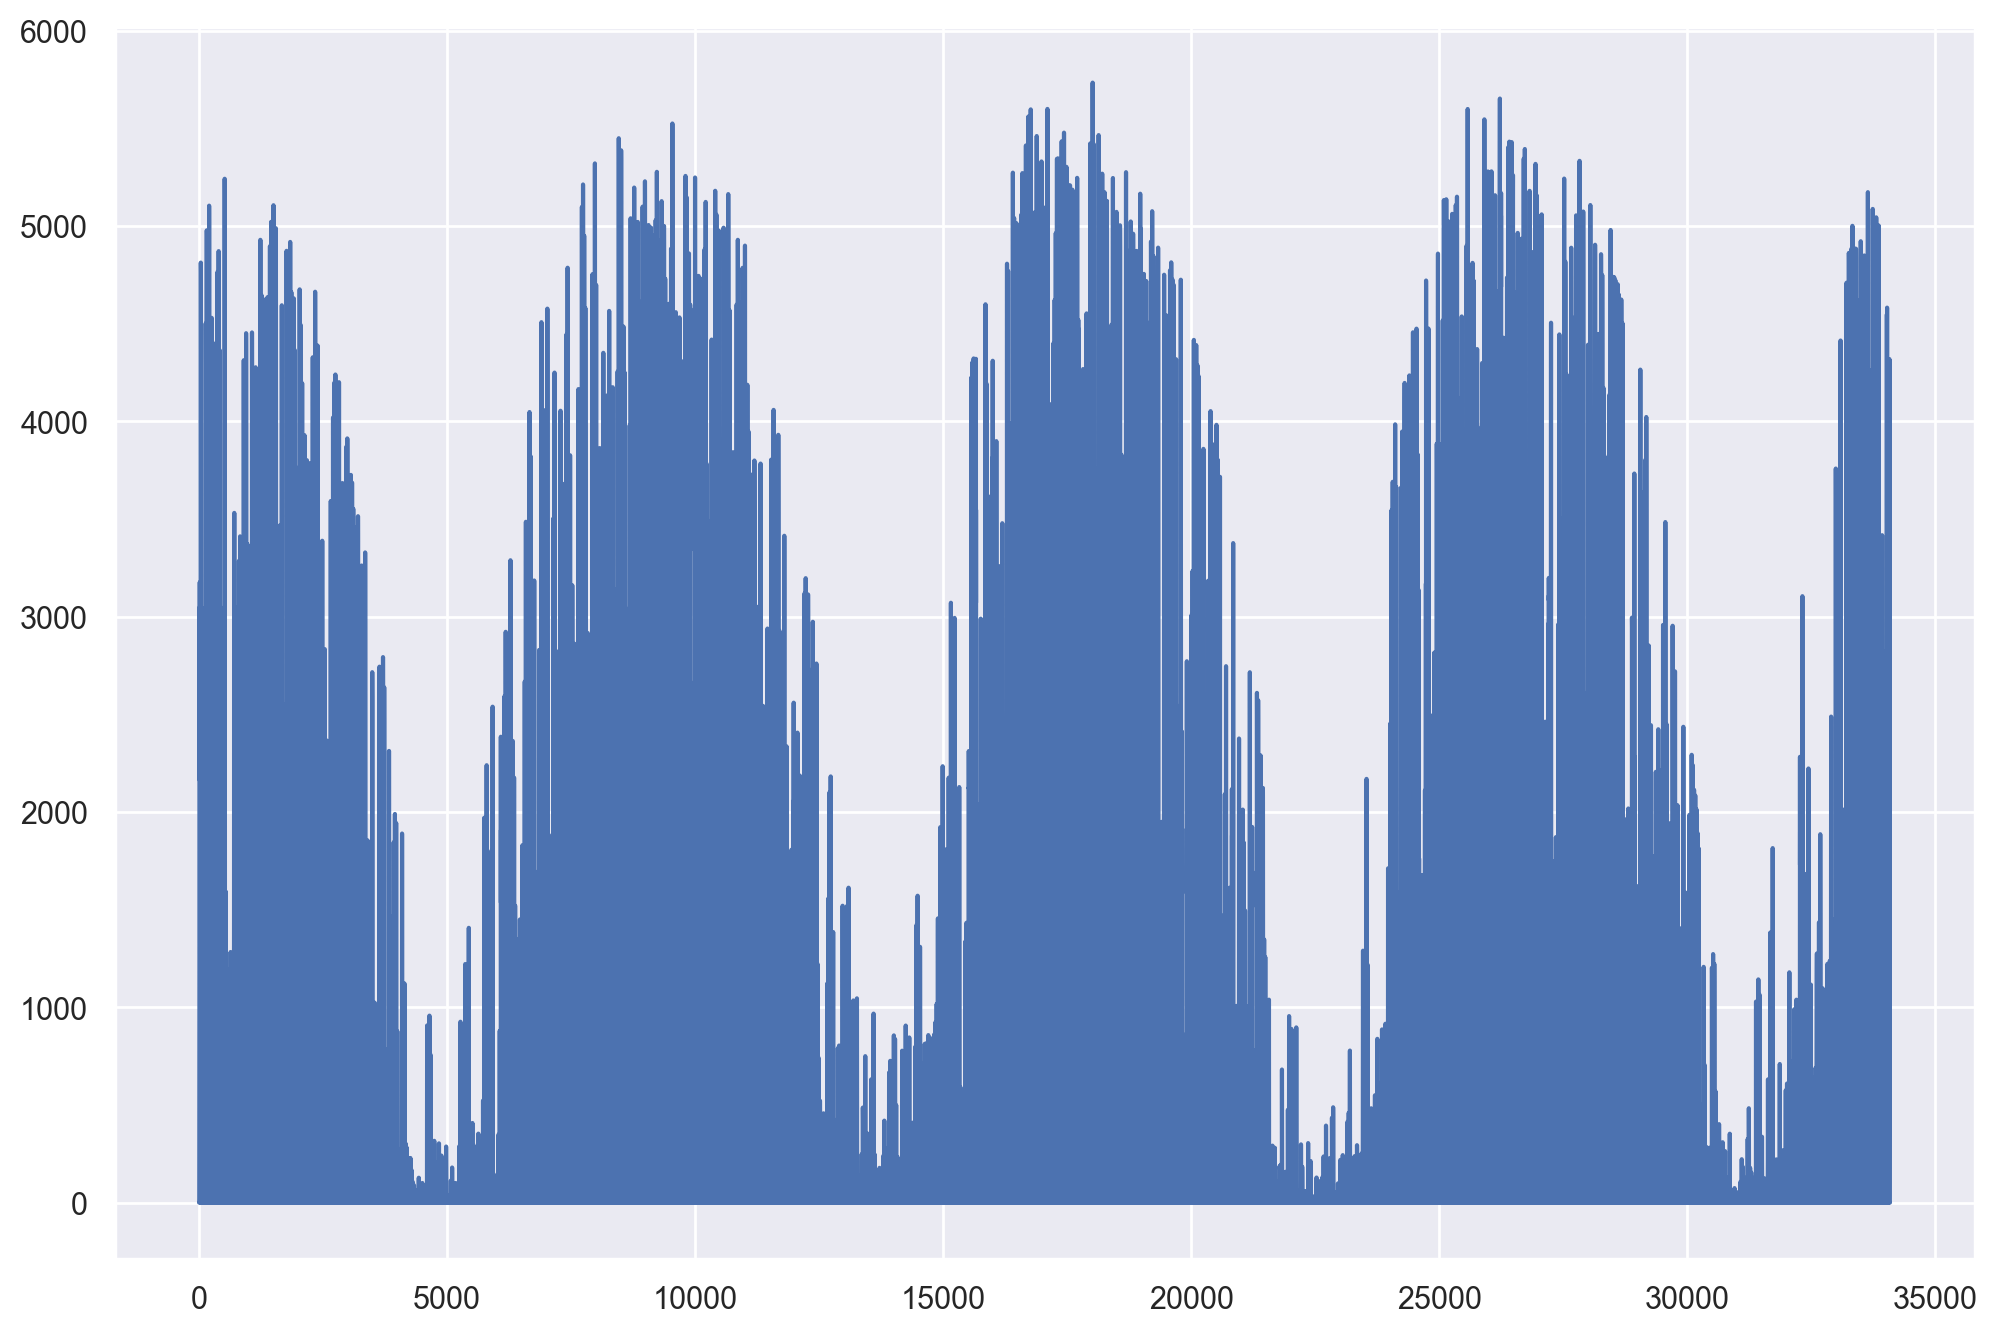

In [8]:
(train_a["pv_measurement"]).dropna().plot(figsize=(12, 8))

<Axes: >

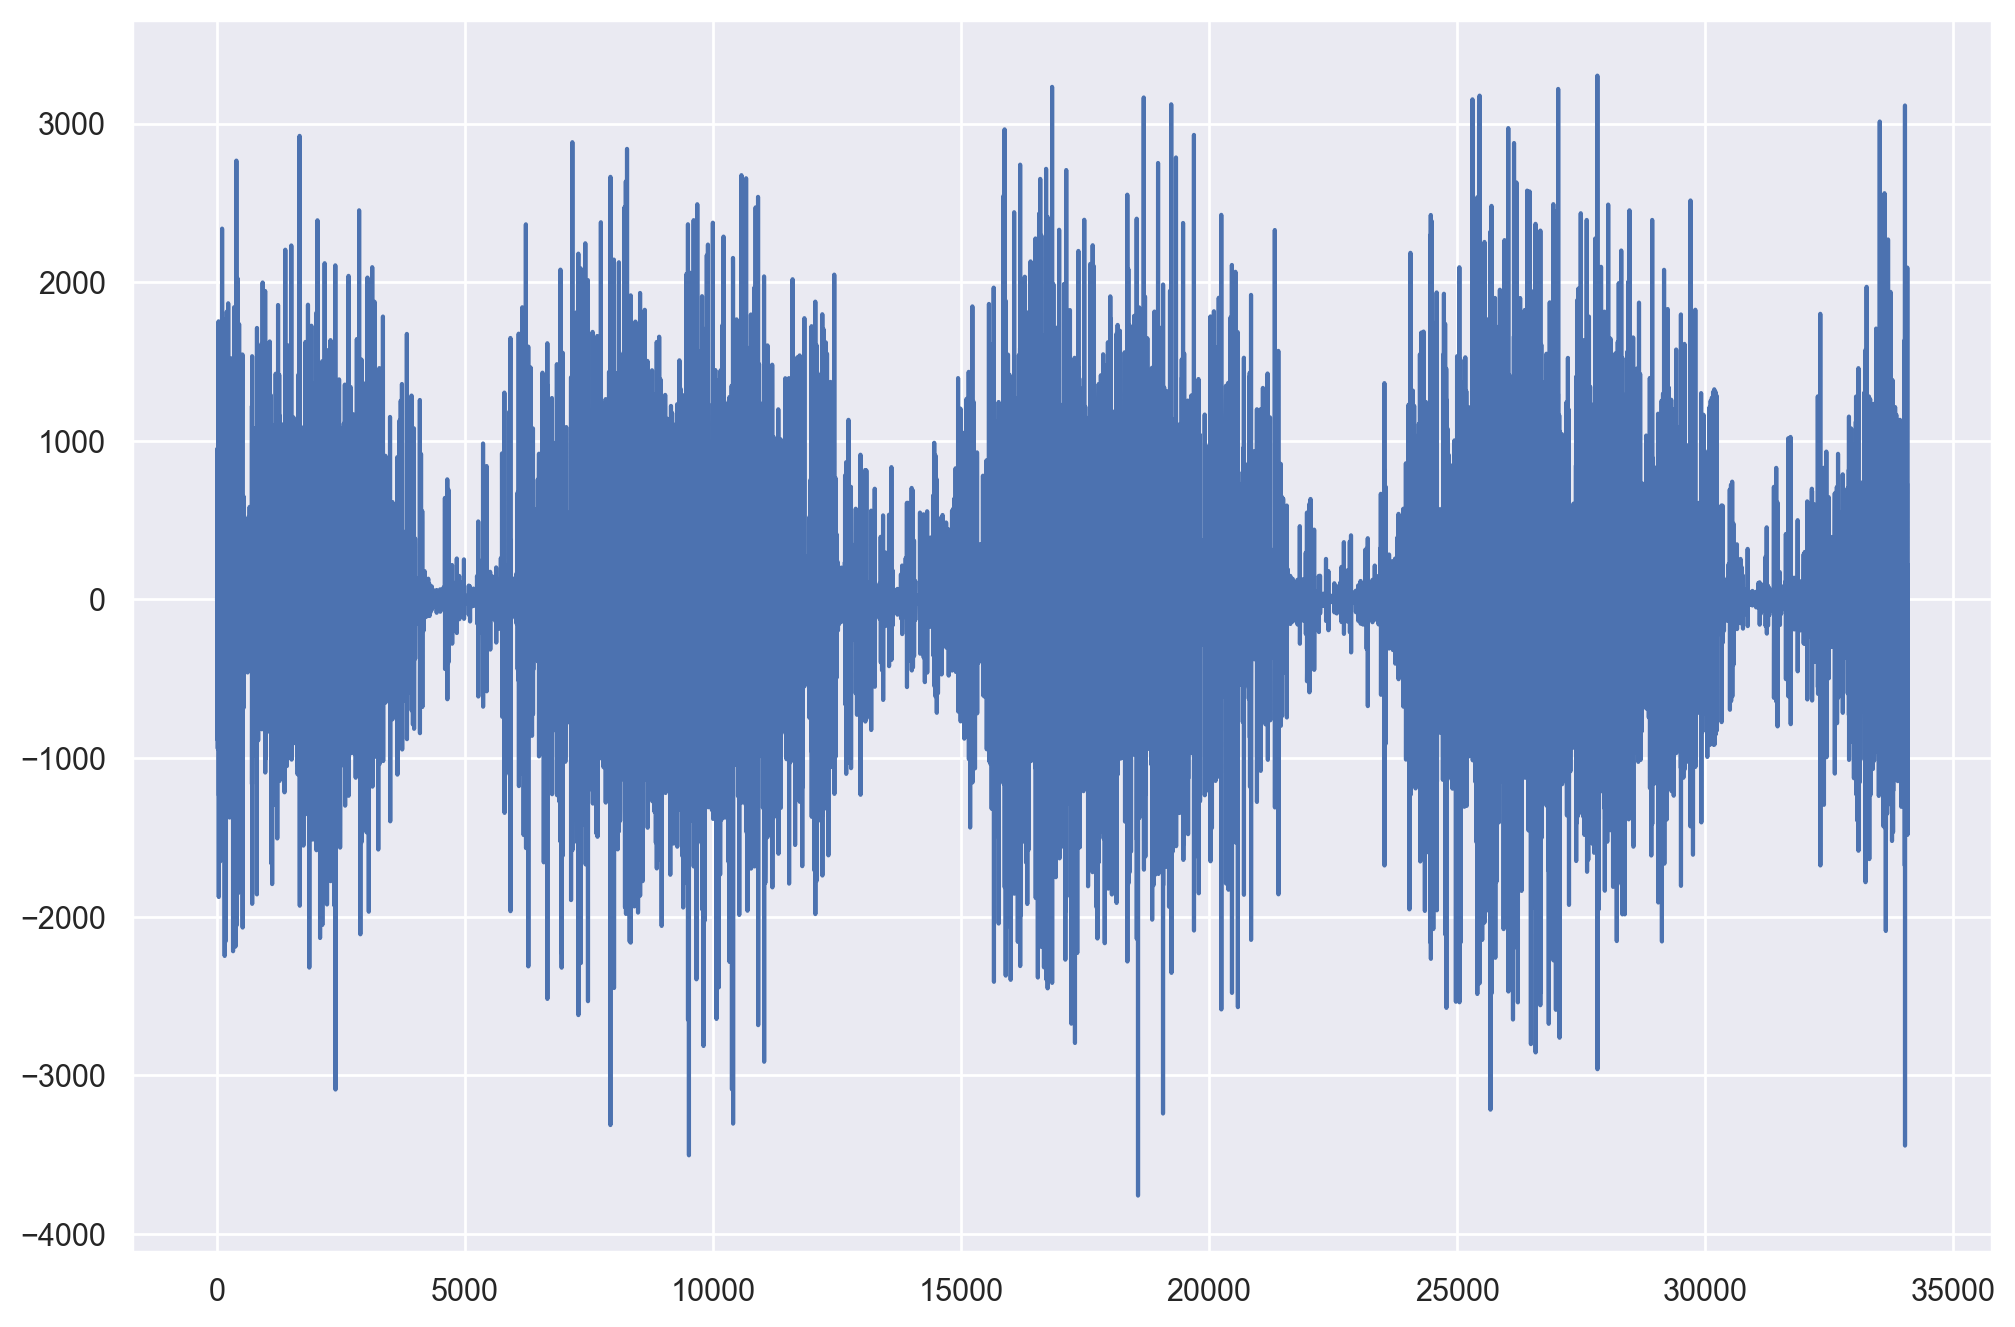

In [ ]:
(train_a["pv_measurement"] - train_a["pv_measurement"].shift(1)).dropna().plot(figsize=(12, 8))

In [ ]:
(train_a["pv_measurement"] - train_a["pv_measurement"].shift(1))

0           NaN
1          0.00
2          0.00
3          0.00
4         19.36
          ...  
34080   -185.68
34081     -9.02
34082      0.00
34083      0.00
34084      0.00
Name: pv_measurement, Length: 34085, dtype: float64

In [ ]:
pd.Series(kpss((train_a["pv_measurement"] - train_a["pv_measurement"].shift(1)).dropna(), regression="c", nlags="auto")[0:3], index=["Test Statistic", "p-value", "Lags Used"])

Test Statistic      0.016484
p-value             0.100000
Lags Used         336.000000
dtype: float64

In [ ]:
pd.Series(adfuller((train_a["pv_measurement"] - train_a["pv_measurement"].shift(1)).dropna())[0:4], index=["Test Statistic","p-value","#Lags Used","Number of Observations Used",])

Test Statistic                   -38.617666
p-value                            0.000000
#Lags Used                        52.000000
Number of Observations Used    34031.000000
dtype: float64

<Axes: >

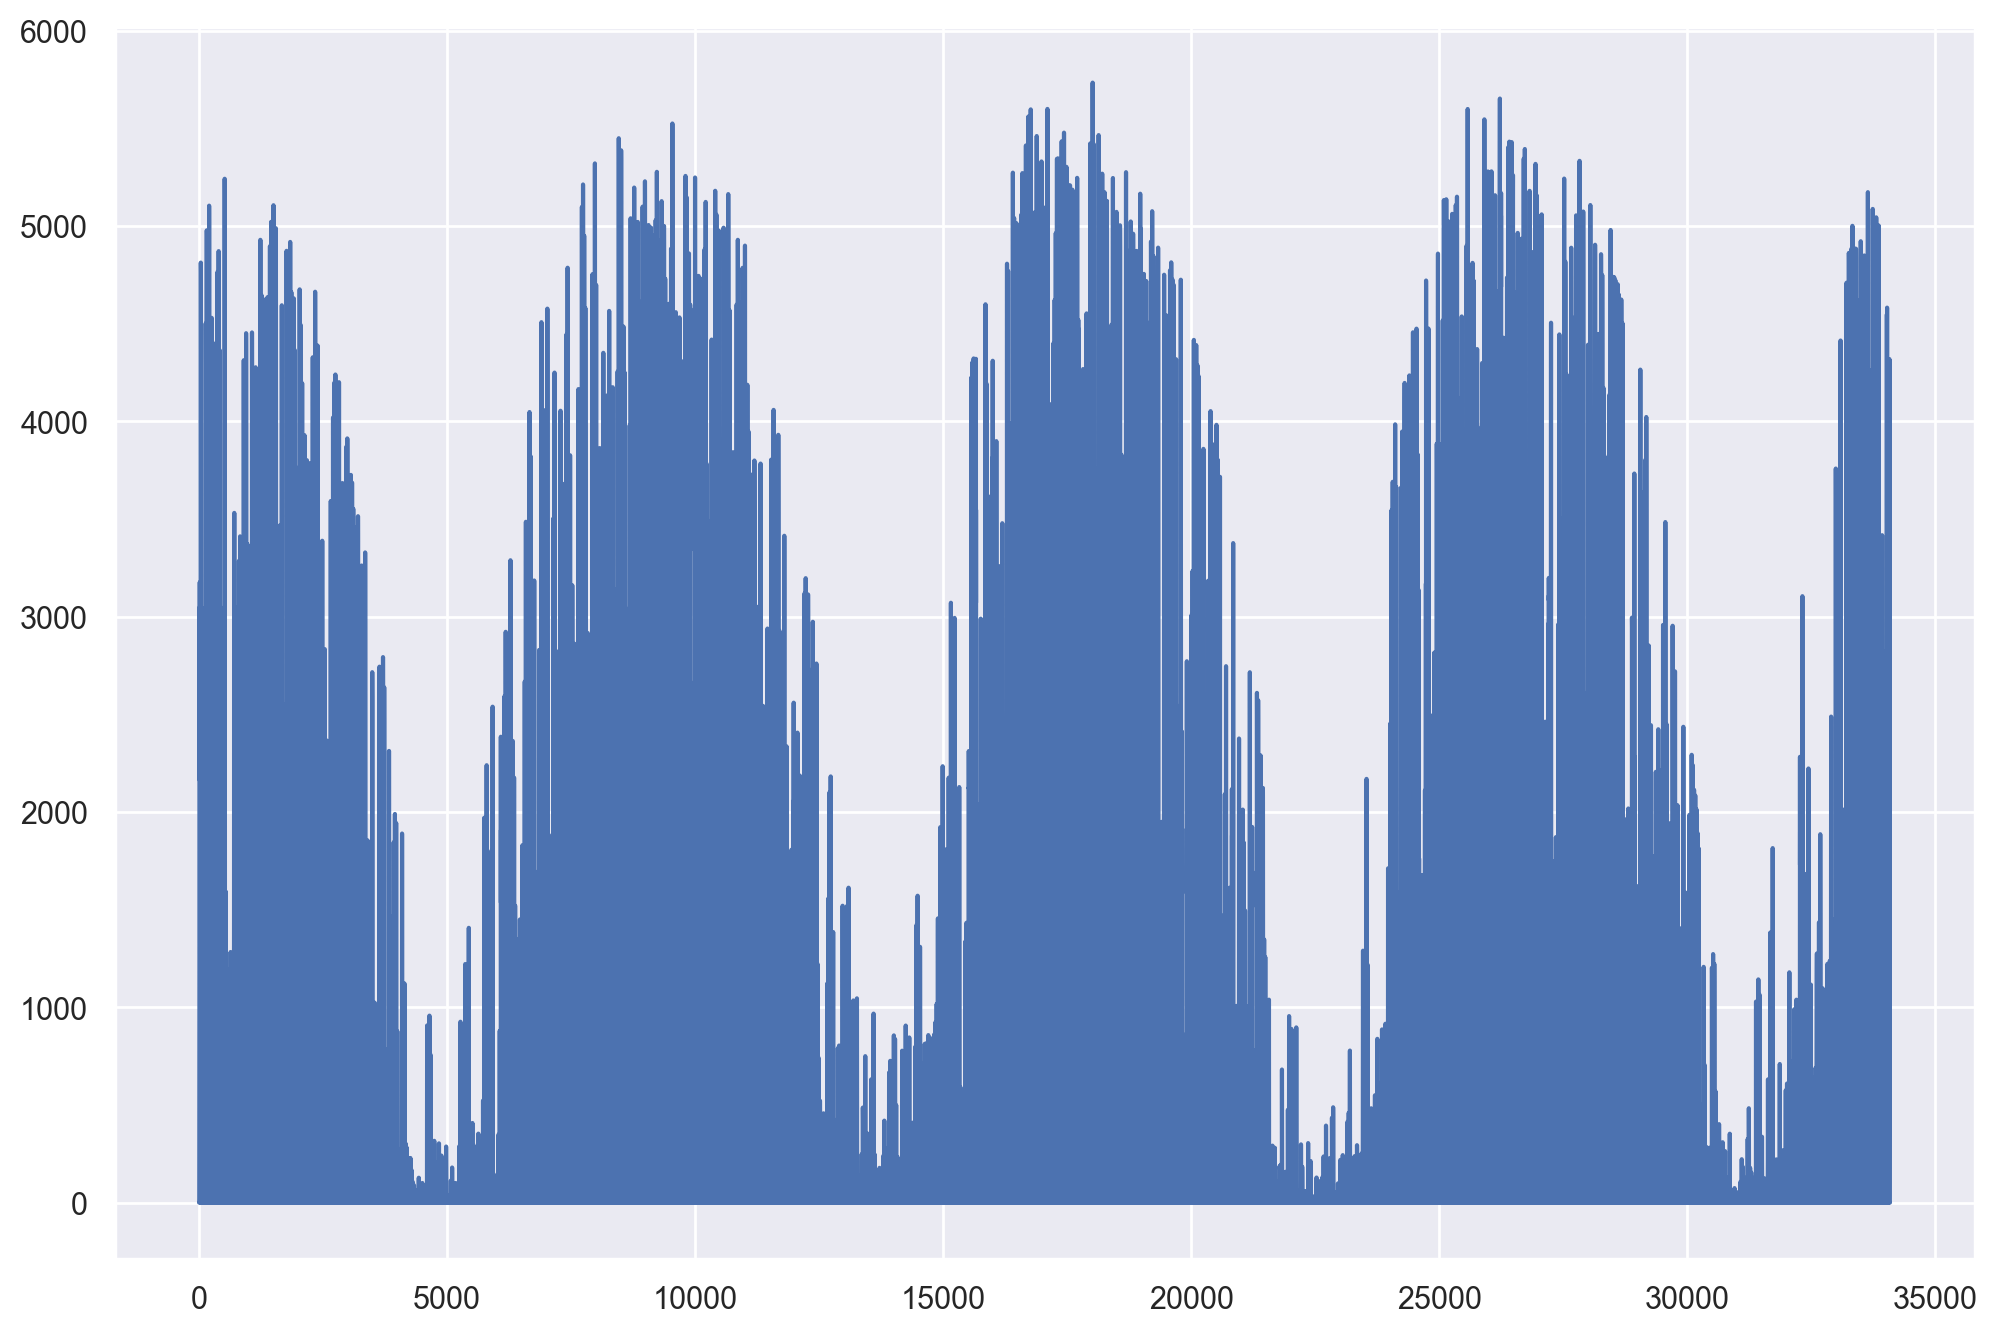

In [ ]:
(train_a["pv_measurement"]).dropna().plot(figsize=(12, 8))

<Axes: >

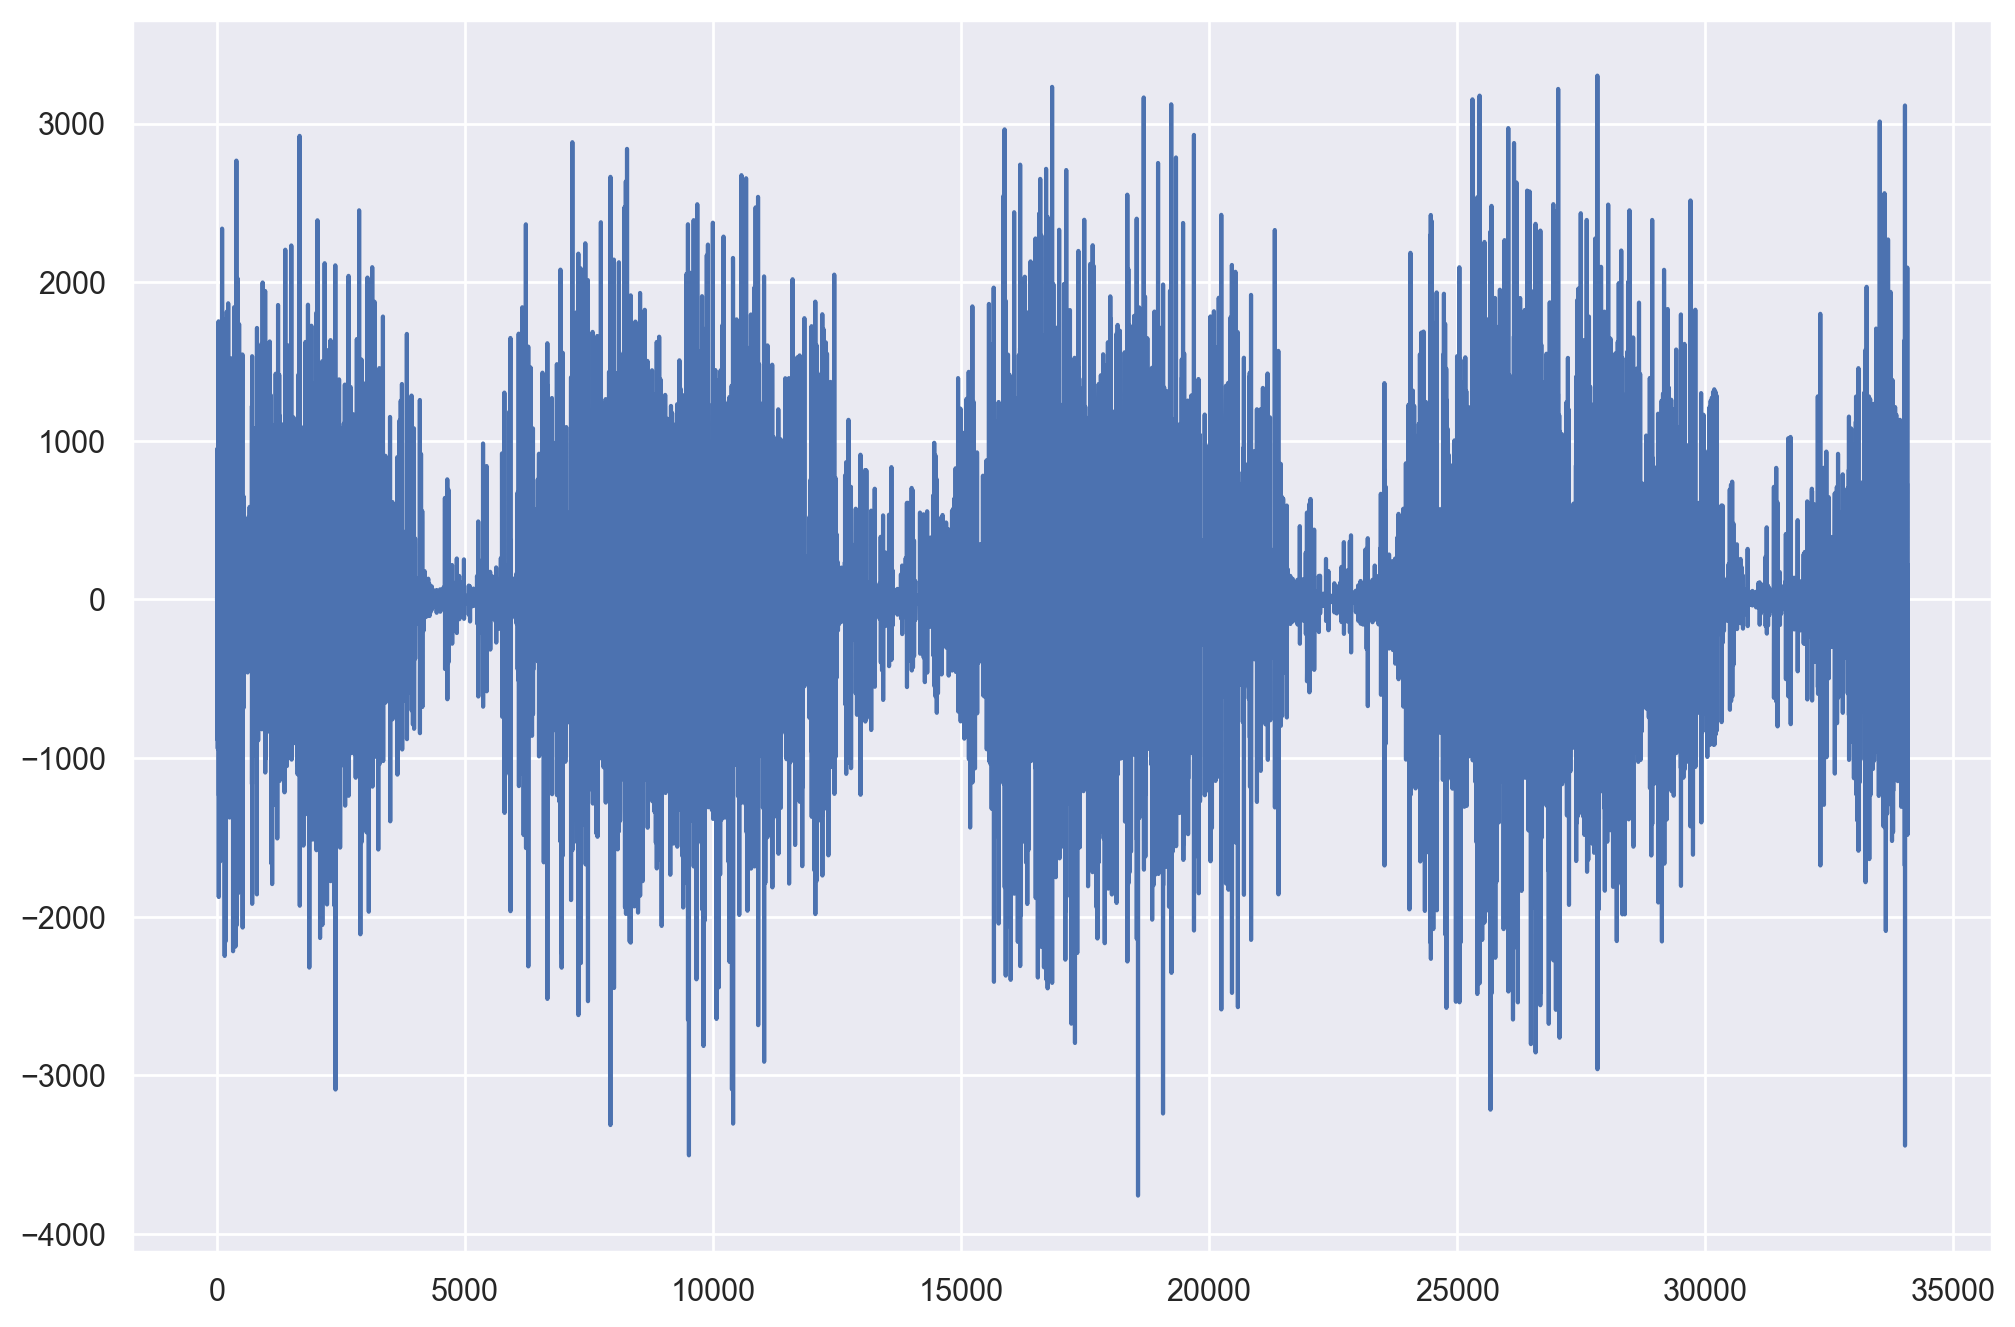

In [ ]:
(train_a["pv_measurement"] - train_a["pv_measurement"].shift(1)).dropna().plot(figsize=(12, 8))

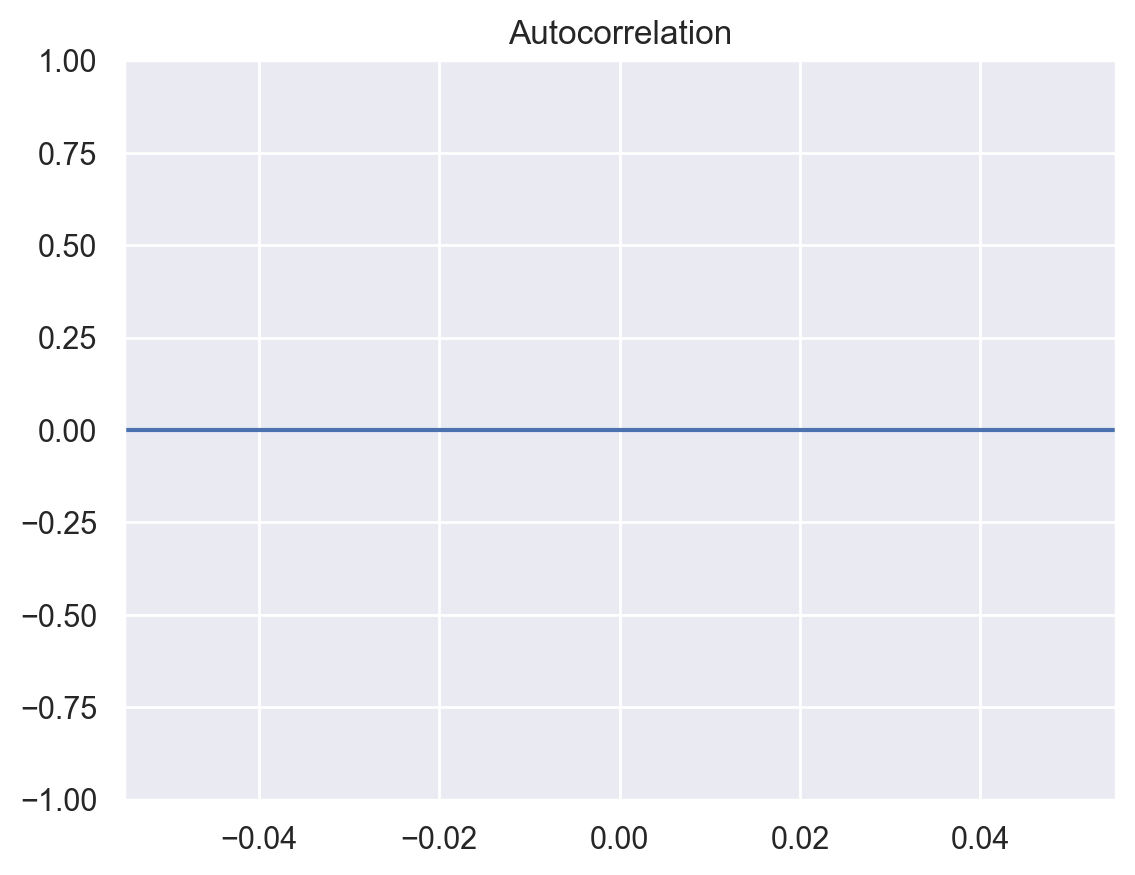

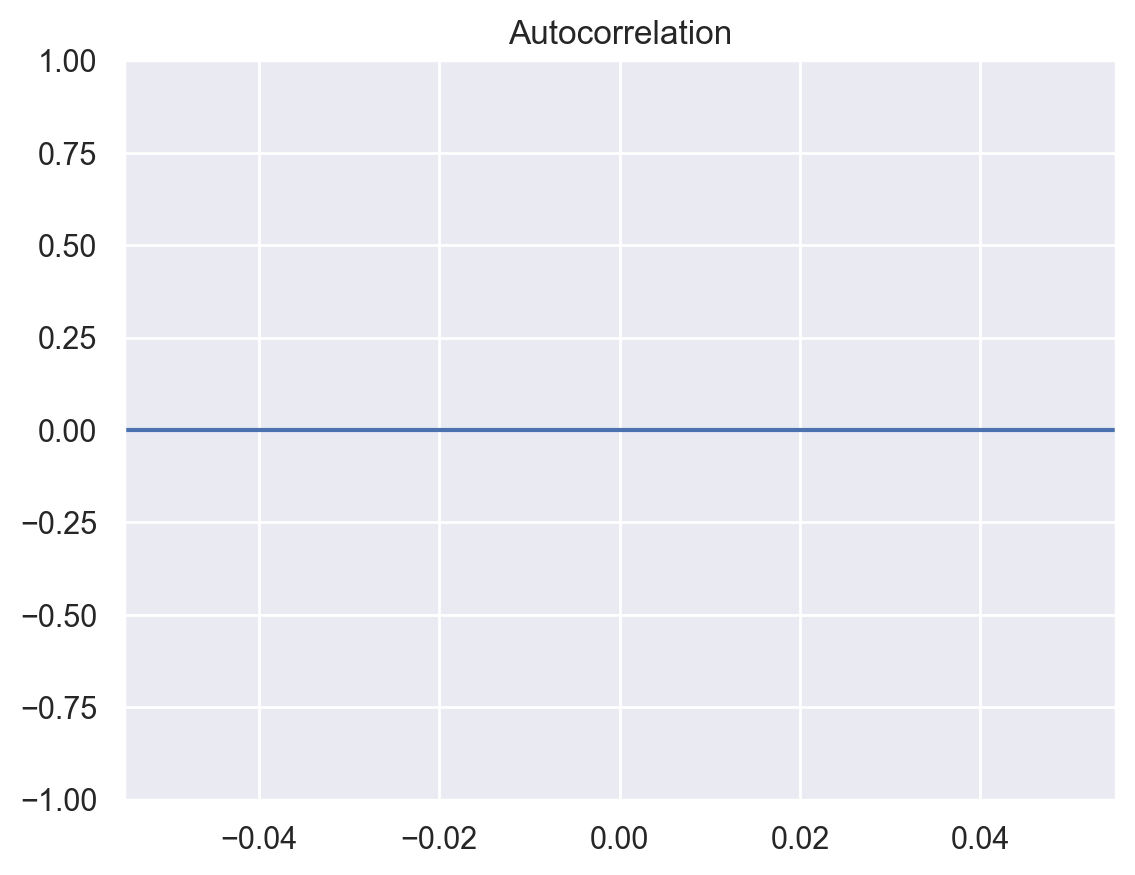

In [ ]:
plot_acf((train_a["pv_measurement"] - train_a["pv_measurement"].shift(1)), lags=1000)

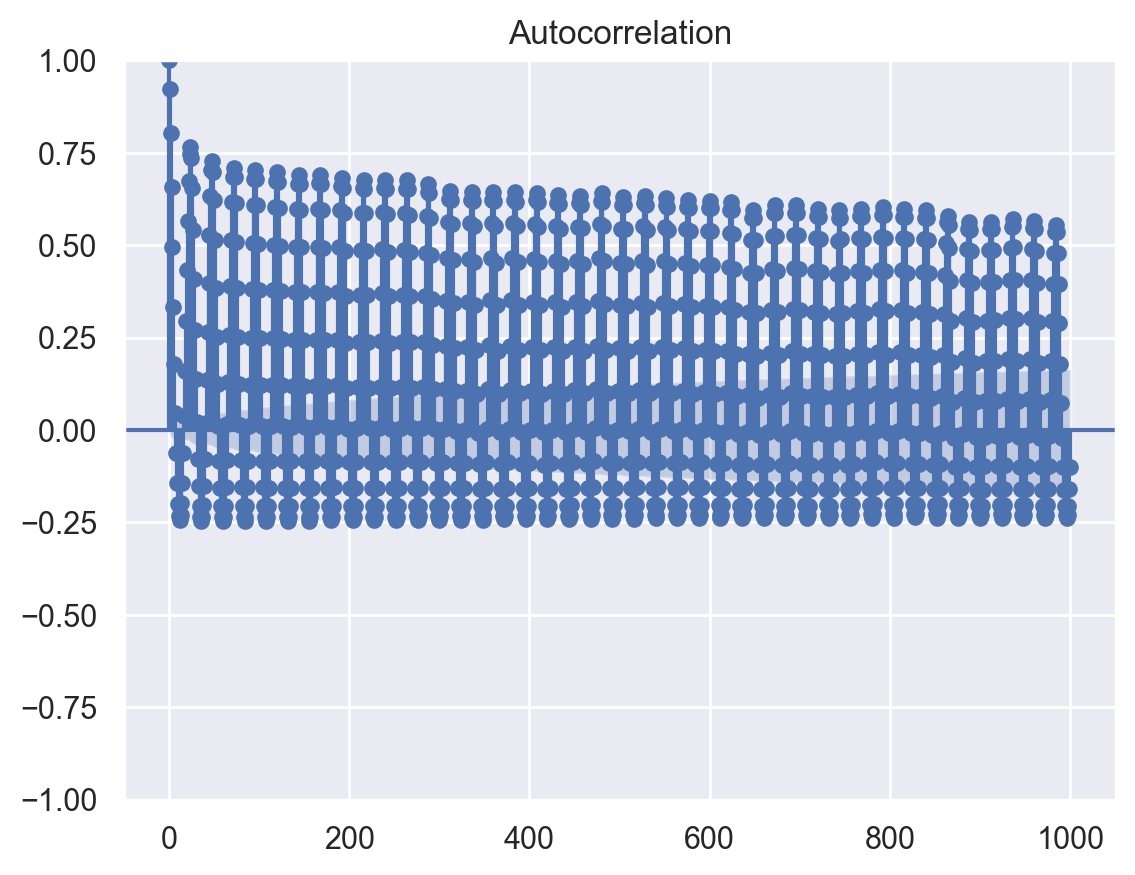

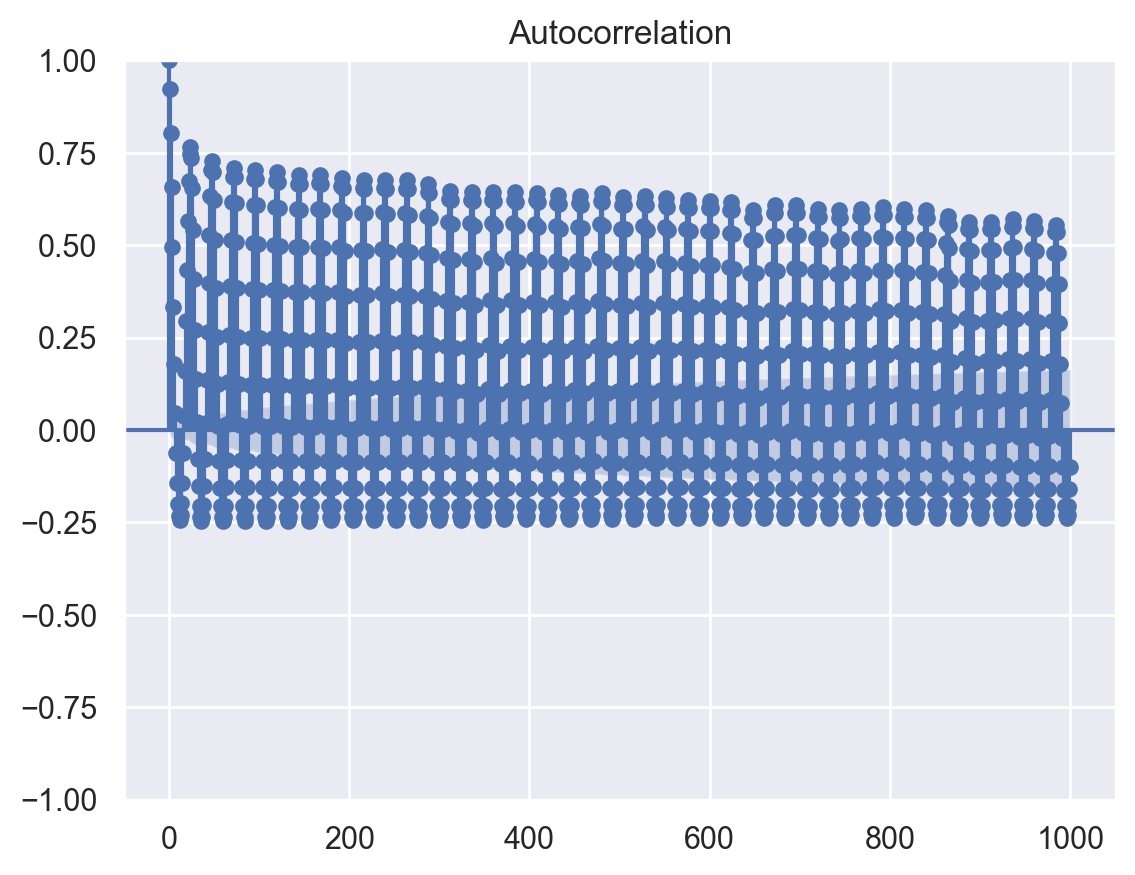

In [ ]:
plot_acf(train_a["pv_measurement"], lags=1000)

In [ ]:
train_a = pd.read_parquet('data/A/train_targets.parquet')

X_train_estimated_a = pd.read_parquet('data/A/X_train_estimated.parquet').drop("date_calc", axis=1)

X_train_observed_a = pd.read_parquet('data/A/X_train_observed.parquet')

X_test_estimated_a = pd.read_parquet('data/A/X_test_estimated.parquet').drop("date_calc", axis=1)

train_a_observed_part = train_a[train_a["time"] <= X_train_estimated_a["date_forecast"].min()]
train_a_estimated_part = train_a[train_a["time"] >= X_train_estimated_a["date_forecast"].min()].reset_index(drop = True)

train_a_estimated_part = pd.concat([train_a_estimated_part, pd.DataFrame([['2023-05-01 00:00:00',0]], columns=train_a.columns)], ignore_index=True)
train_a_estimated_part["time"] = train_a_estimated_part["time"].astype("datetime64[us]")

X_train_observed_a_clean = pd.DataFrame(columns=X_train_observed_a.columns)
for i in range(len(train_a_observed_part)-1):
    mean_values_observed = np.array(X_train_observed_a[(X_train_observed_a["date_forecast"] >= train_a_observed_part["time"][i]) & (X_train_observed_a["date_forecast"] <= train_a_observed_part["time"][i+1])].mean())
    mean_values_observed[0] = train_a_observed_part["time"][i]
    X_train_observed_a_clean = pd.concat([X_train_observed_a_clean, pd.DataFrame([mean_values_observed], columns=X_train_observed_a.columns)], ignore_index=True)
    # print(i)
X_train_observed_a_clean["date_forecast"] = X_train_observed_a_clean["date_forecast"].astype("datetime64[us]")
# X_train_observed_a_clean.insert(1, "year", X_train_observed_a_clean["date_forecast"].dt.year)
X_train_observed_a_clean.insert(1, "month", X_train_observed_a_clean["date_forecast"].dt.month)
X_train_observed_a_clean.insert(1, "day", X_train_observed_a_clean["date_forecast"].dt.day)
X_train_observed_a_clean.insert(1, "hour", X_train_observed_a_clean["date_forecast"].dt.hour)

X_train_estimated_a_clean = pd.DataFrame(columns=X_train_estimated_a.columns)
for i in range(len(train_a_estimated_part)-1):
    mean_values_estimated = np.array(X_train_estimated_a[(X_train_estimated_a["date_forecast"] >= train_a_estimated_part["time"][i]) & (X_train_estimated_a["date_forecast"] <= train_a_estimated_part["time"][i+1])].mean())
    mean_values_estimated[0] = train_a_estimated_part["time"][i]
    X_train_estimated_a_clean = pd.concat([X_train_estimated_a_clean, pd.DataFrame([mean_values_estimated], columns=X_train_estimated_a.columns)], ignore_index=True)
    # print(i)
X_train_estimated_a_clean["date_forecast"] = X_train_estimated_a_clean["date_forecast"].astype("datetime64[us]")
# X_train_estimated_a_clean.insert(1, "year", X_train_estimated_a_clean["date_forecast"].dt.year)
X_train_estimated_a_clean.insert(1, "month", X_train_estimated_a_clean["date_forecast"].dt.month)
X_train_estimated_a_clean.insert(1, "day", X_train_estimated_a_clean["date_forecast"].dt.day)
X_train_estimated_a_clean.insert(1, "hour", X_train_estimated_a_clean["date_forecast"].dt.hour)

X_train_a_clean = pd.concat([X_train_observed_a_clean, X_train_estimated_a_clean], ignore_index=True)

test_a_dates = pd.DataFrame(columns=train_a.columns).drop(["pv_measurement"],axis=1)
for i in range(len(X_test_estimated_a)):
    if (i%4 == 0):
        test_a_dates = pd.concat([test_a_dates, pd.DataFrame([X_test_estimated_a["date_forecast"][i]], columns=test_a_dates.columns)], ignore_index=True)
test_a_dates = pd.concat([test_a_dates, pd.DataFrame(['2023-07-04 00:00:00'], columns=test_a_dates.columns)], ignore_index=True)
test_a_dates["time"] = test_a_dates["time"].astype("datetime64[us]")

X_test_estimated_a_clean = pd.DataFrame(columns=X_test_estimated_a.columns)
for i in range(len(test_a_dates)-1):
    mean_values_test = np.array(X_test_estimated_a[(X_test_estimated_a["date_forecast"] >= test_a_dates["time"][i]) & (X_test_estimated_a["date_forecast"] <= test_a_dates["time"][i+1])].mean())
    mean_values_test[0] = test_a_dates["time"][i]
    X_test_estimated_a_clean = pd.concat([X_test_estimated_a_clean, pd.DataFrame([mean_values_test], columns=X_test_estimated_a.columns)], ignore_index=True)
    # print(i)
# X_test_estimated_a_clean.insert(1, "year", X_test_estimated_a_clean["date_forecast"].dt.year)
X_test_estimated_a_clean.insert(1, "month", X_test_estimated_a_clean["date_forecast"].dt.month)
X_test_estimated_a_clean.insert(1, "day", X_test_estimated_a_clean["date_forecast"].dt.day)
X_test_estimated_a_clean.insert(1, "hour", X_test_estimated_a_clean["date_forecast"].dt.hour)

X_train_a_cleaner = X_train_a_clean[~((X_train_a_clean["date_forecast"].dt.year == 2023) & (X_train_a_clean["date_forecast"].dt.month == 1) & (X_train_a_clean["date_forecast"].dt.day == 26))]
train_a_clean = train_a[~((X_train_a_clean["date_forecast"].dt.year == 2023) & (X_train_a_clean["date_forecast"].dt.month == 1) & (X_train_a_clean["date_forecast"].dt.day == 26))]

X_train_a_cleaner = X_train_a_cleaner.drop(train_a_clean[train_a_clean.isna().any(axis=1)].index).reset_index(drop=True)
train_a_clean = train_a_clean.drop(train_a_clean[train_a_clean.isna().any(axis=1)].index).reset_index(drop=True)

X_train_a_cleanest = X_train_a_cleaner.drop(["ceiling_height_agl:m", "cloud_base_agl:m", "snow_density:kgm3"], axis=1).reset_index(drop=True)
X_train_a_cleanest["date_forecast"] = X_train_a_cleanest["date_forecast"].astype("datetime64[us]")

X_test_a_cleanest = X_test_estimated_a_clean.drop(["ceiling_height_agl:m", "cloud_base_agl:m", "snow_density:kgm3"], axis=1).reset_index(drop=True)
X_test_a_cleanest["date_forecast"] = X_test_a_cleanest["date_forecast"].astype("datetime64[us]")

In [ ]:
X_test_a_cleanest

In [77]:
train_a_clean_train = train_a_clean.iloc[:int(len(X_train_observed_a_clean)+len(X_train_estimated_a_clean)/2)]
train_a_clean_test = train_a_clean.iloc[int(len(X_train_observed_a_clean)+len(X_train_estimated_a_clean)/2):].reset_index(drop=True)
X_train_estimated_train = X_train_a_cleanest.iloc[:int(len(X_train_observed_a_clean)+len(X_train_estimated_a_clean)/2)]
X_train_estimated_test = X_train_a_cleanest.iloc[int(len(X_train_observed_a_clean)+len(X_train_estimated_a_clean)/2):].reset_index(drop=True)

In [79]:
X_train_estimated_train

date_forecast  hour  day  month  absolute_humidity_2m:gm3  \
0     2019-06-02 22:00:00    22    2      6                  7.700000   
1     2019-06-02 23:00:00    23    2      6                  7.700000   
2     2019-06-03 00:00:00     0    3      6                  7.940000   
3     2019-06-03 01:00:00     1    3      6                  8.499999   
4     2019-06-03 02:00:00     2    3      6                  8.980000   
...                   ...   ...  ...    ...                       ...   
31871 2023-01-29 18:00:00    18   29      1                  5.900000   
31872 2023-01-29 19:00:00    19   29      1                  5.820000   
31873 2023-01-29 20:00:00    20   29      1                  5.660000   
31874 2023-01-29 21:00:00    21   29      1                  5.380000   
31875 2023-01-29 22:00:00    22   29      1                  5.000000   

       air_density_2m:kgm3  clear_sky_energy_1h:J  clear_sky_rad:W  \
0                   1.2276               0.000000         0.000000   
1                   1.2230               0.000000         0.000000   
2                   1.2194               0.000000         0.000000   
3                   1.2182            1476.300049         2.560000   
4                   1.2178           46419.699219        29.259998   
...                    ...                    ...              ...   
31871               1.2236               0.000000         0.000000   
31872               1.2212               0.000000         0.000000   
31873               1.2210               0.000000         0.000000   
31874               1.2236               0.000000         0.000000   
31875               1.2244               0.000000         0.000000   

       dew_or_rime:idx  dew_point_2m:K  diffuse_rad:W  diffuse_rad_1h:J  \
0                  0.0      280.299988            0.0          0.000000   
1                  0.0      280.279968            0.0          0.000000   
2                  0.0      280.779968            0.0          0.000000   
3                  0.0      281.799988            1.1       1970.080078   
4                  0.0      282.580017           15.4      29682.681641   
...                ...             ...            ...               ...   
31871              0.0      276.080017            0.0          0.000000   
31872              0.0      275.920013            0.0          0.000000   
31873              0.0      275.539978            0.0          0.000000   
31874              0.0      274.760010            0.0          0.000000   
31875              0.0      273.779968            0.0          0.000000   

       direct_rad:W  direct_rad_1h:J  effective_cloud_cover:p  elevation:m  \
0              0.00         0.000000                99.180000          6.0   
1              0.00         0.000000                99.799995          6.0   
2              0.00         0.000000               100.000000          6.0   
3              0.00         0.000000               100.000000          6.0   
4              0.48       858.040039                79.659996          6.0   
...             ...              ...                      ...          ...   
31871          0.00         0.000000                95.479996          6.0   
31872          0.00         0.000000                95.480003          6.0   
31873          0.00         0.000000                85.619995          6.0   
31874          0.00         0.000000                70.699997          6.0   
31875          0.00         0.000000                81.419998          6.0   

       fresh_snow_12h:cm  fresh_snow_1h:cm  fresh_snow_24h:cm  \
0                    0.0               0.0                0.0   
1                    0.0               0.0                0.0   
2                    0.0               0.0                0.0   
3                    0.0               0.0                0.0   
4                    0.0               0.0                0.0   
...                  ...               ...                ...   
3

In [89]:
X_train_estimated_train.iloc[:,[1,4]]

hour  absolute_humidity_2m:gm3
0        22                  7.700000
1        23                  7.700000
2         0                  7.940000
3         1                  8.499999
4         2                  8.980000
...     ...                       ...
31871    18                  5.900000
31872    19                  5.820000
31873    20                  5.660000
31874    21                  5.380000
31875    22                  5.000000

[31876 rows x 2 columns]

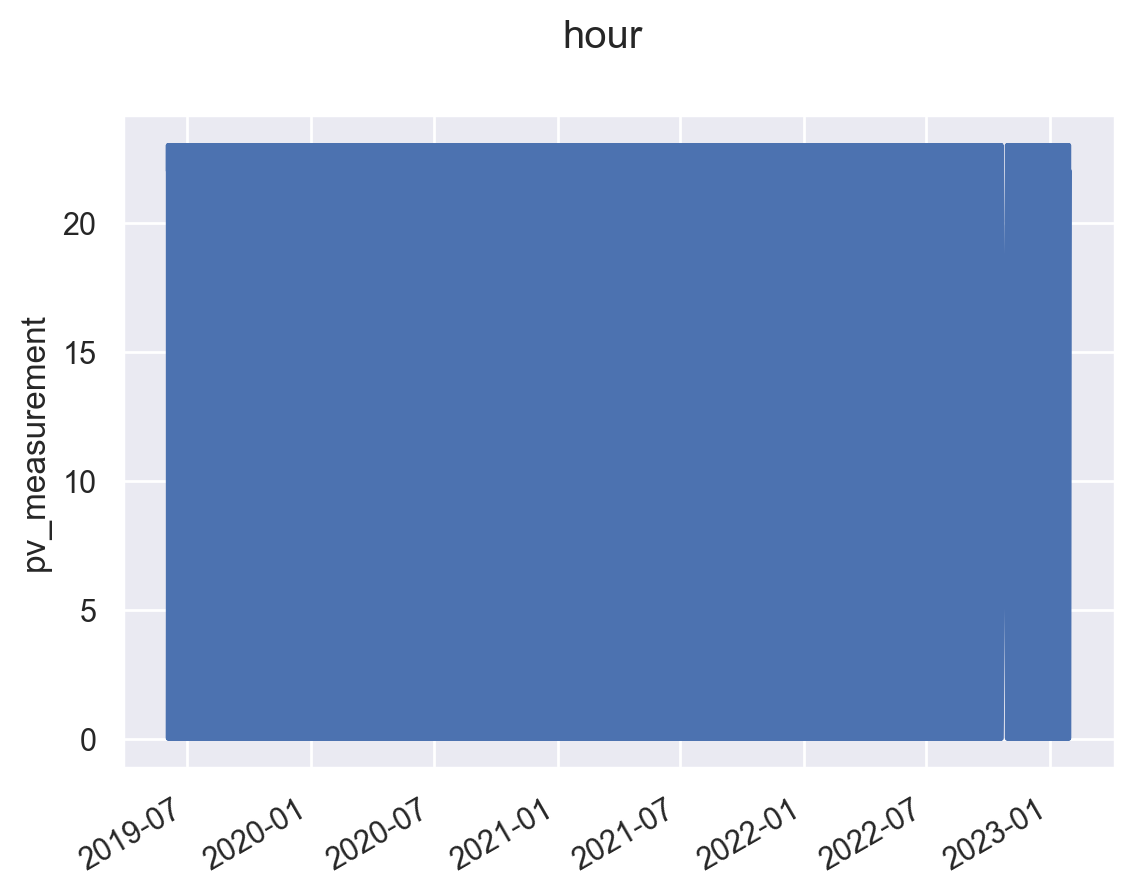

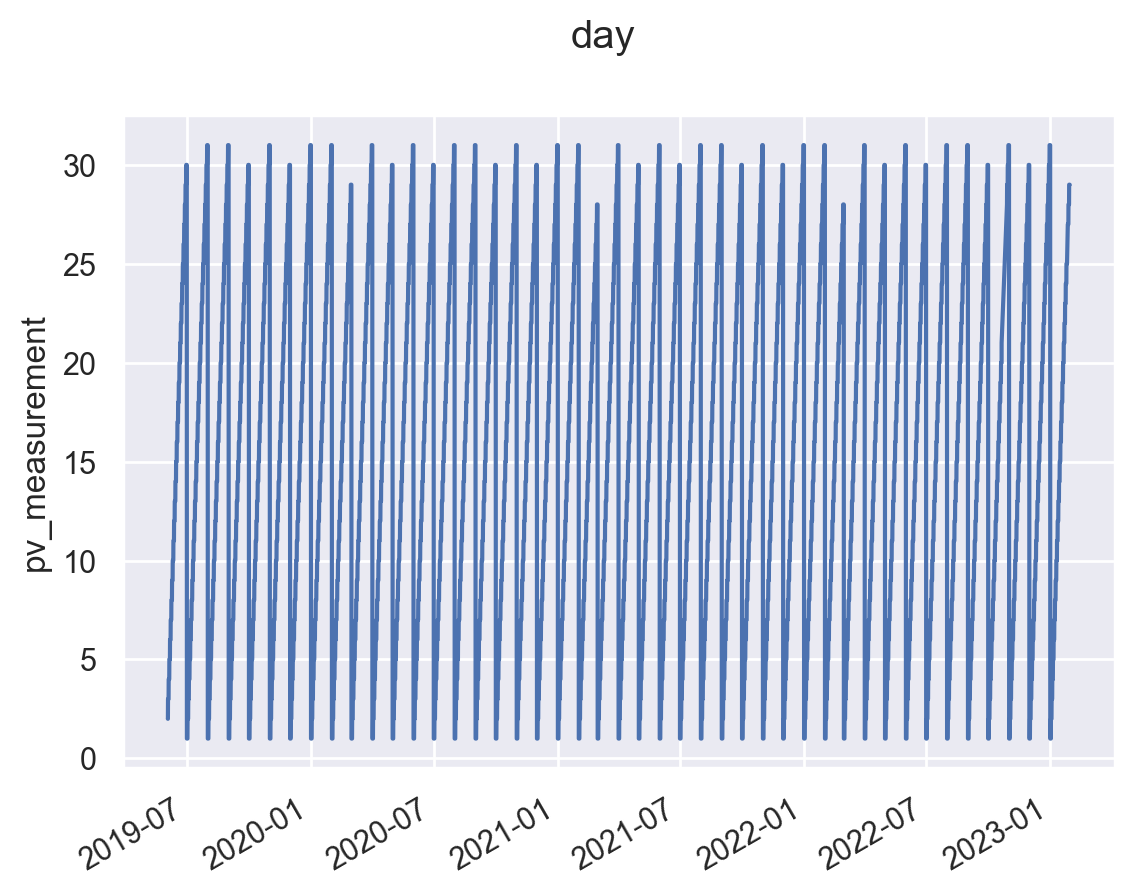

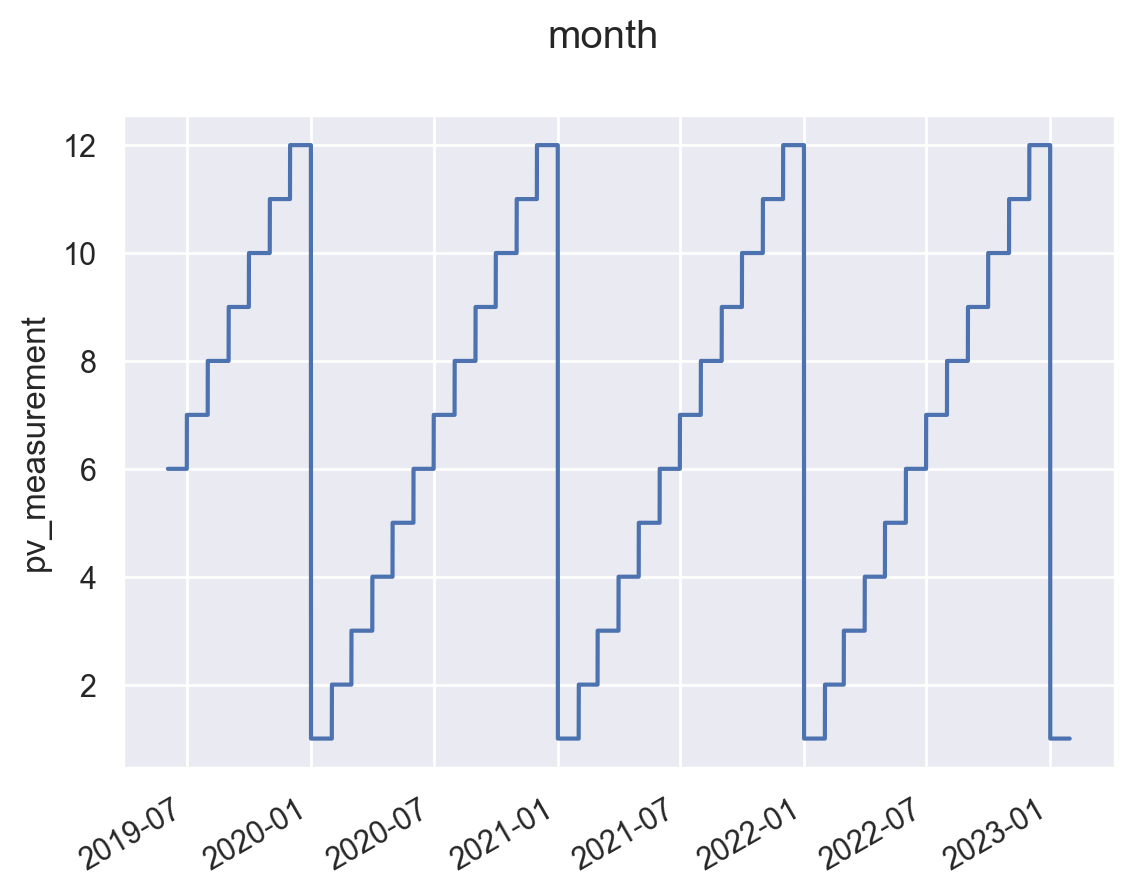

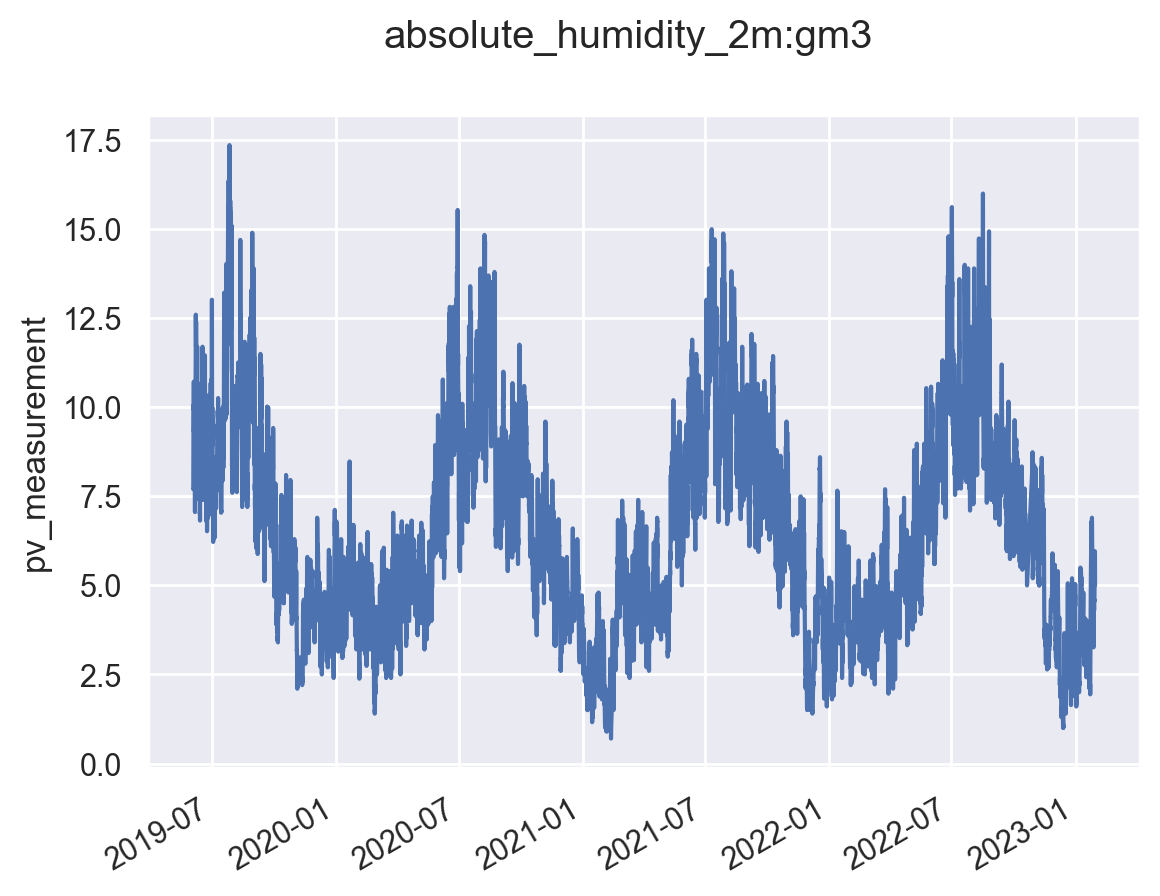

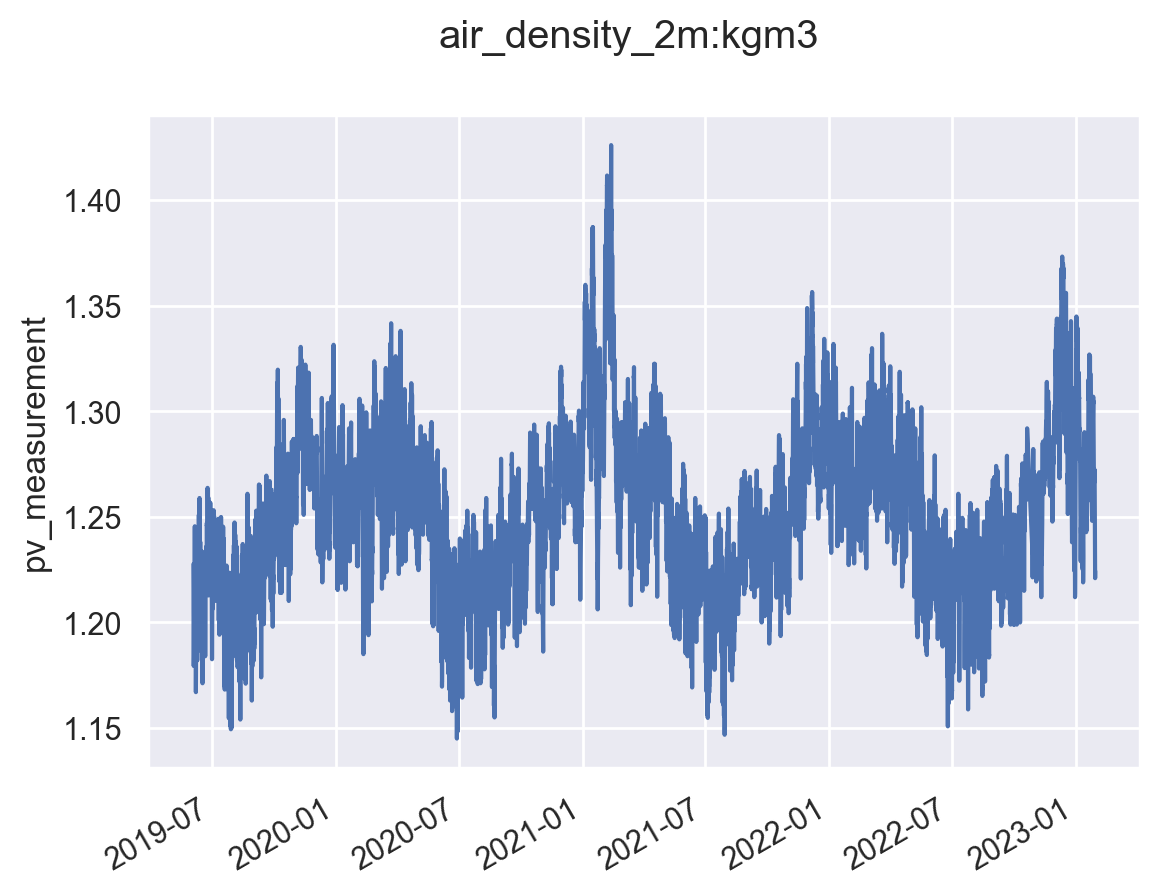

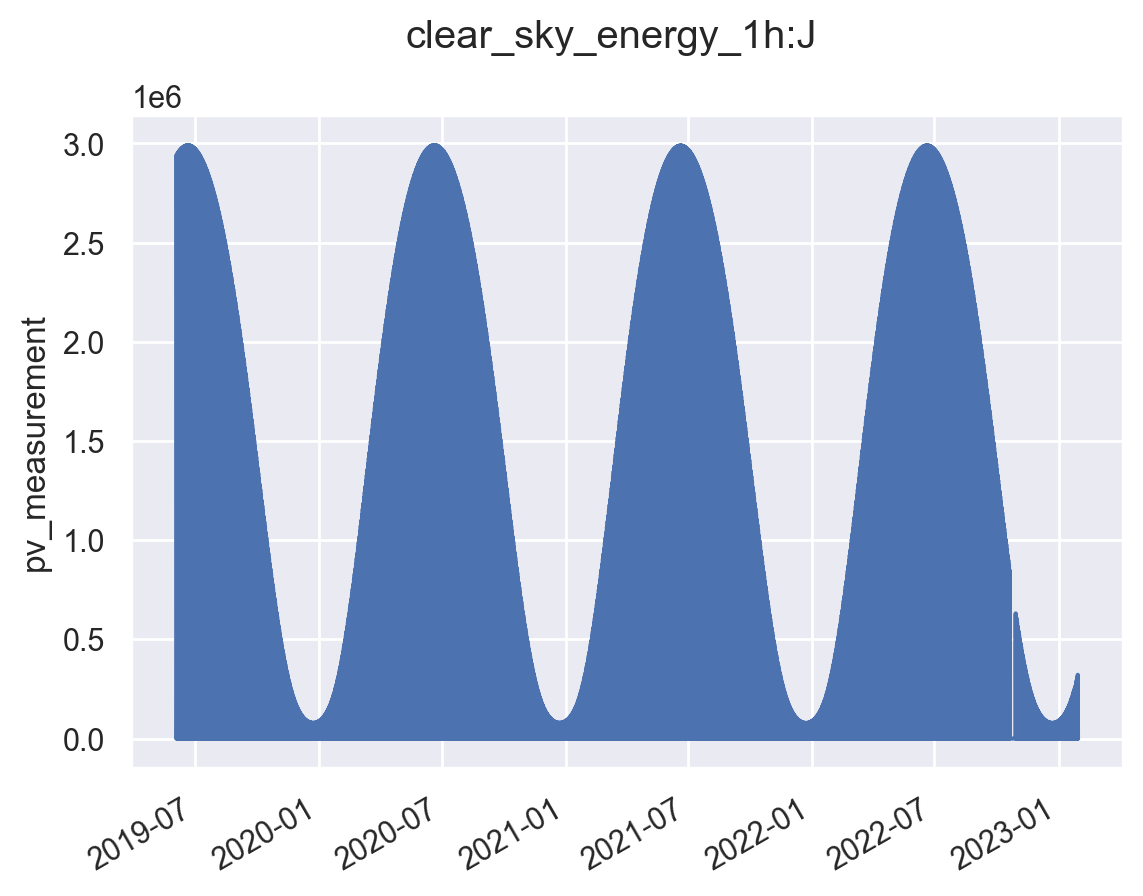

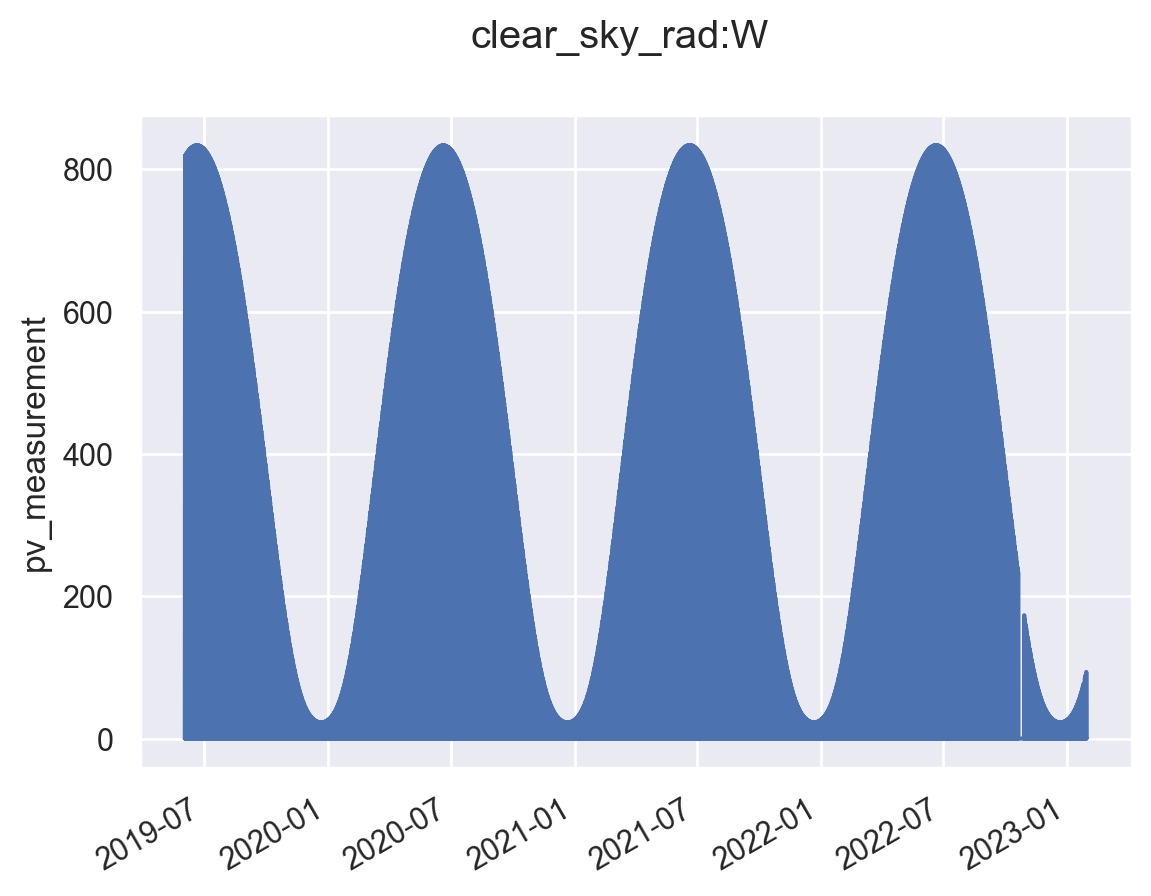

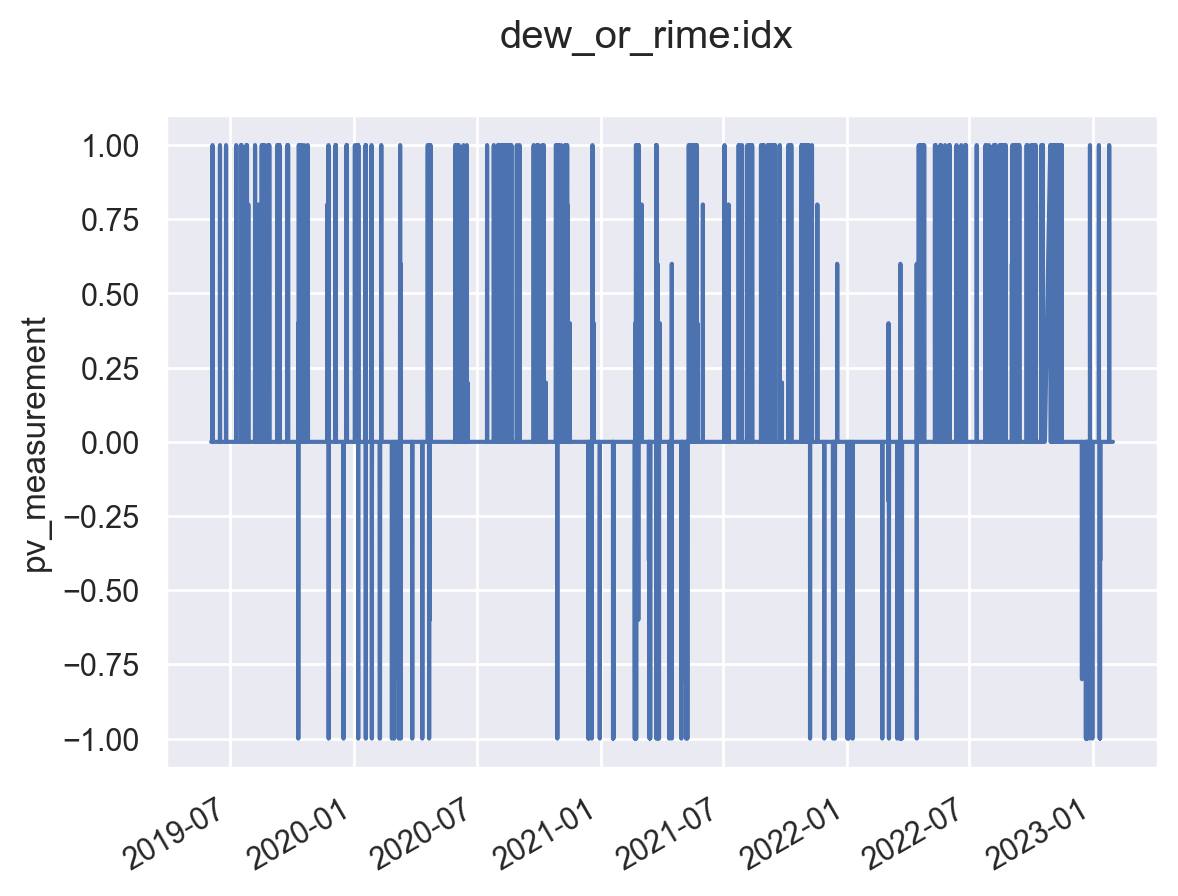

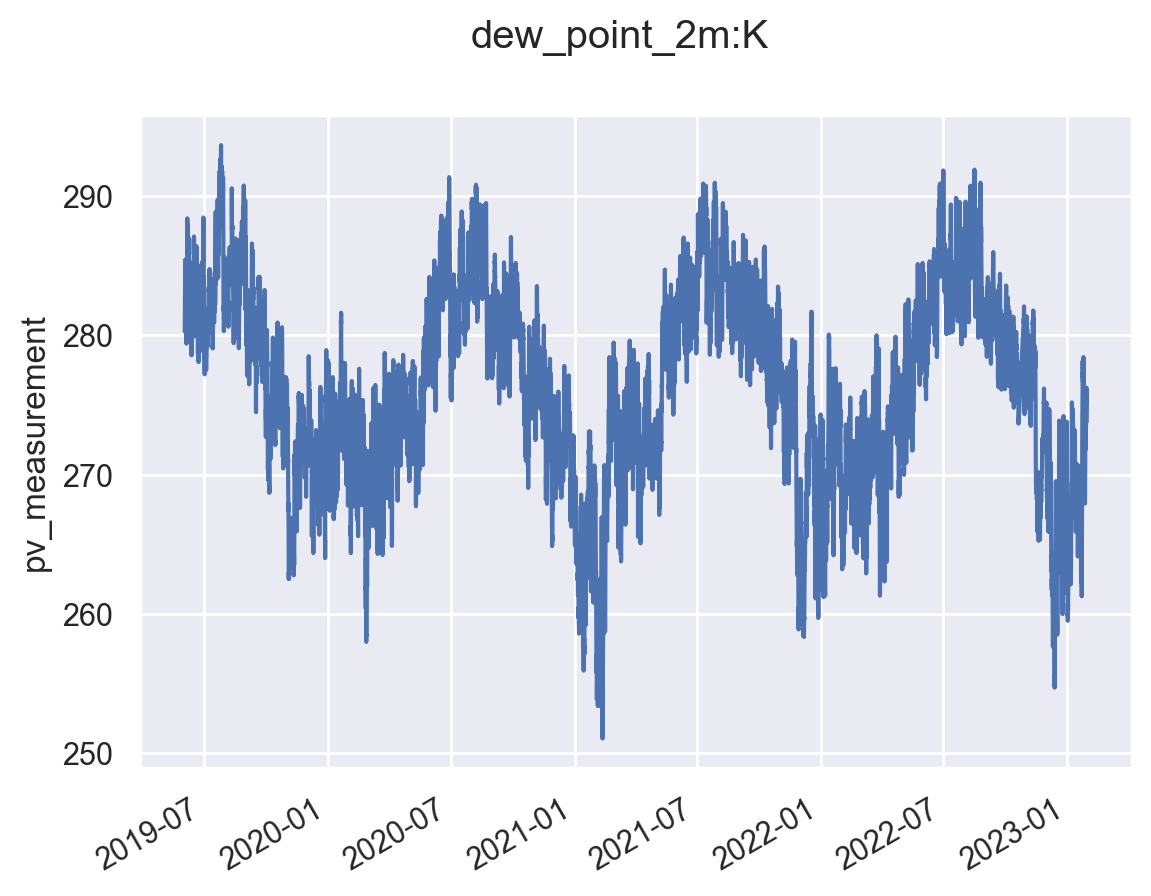

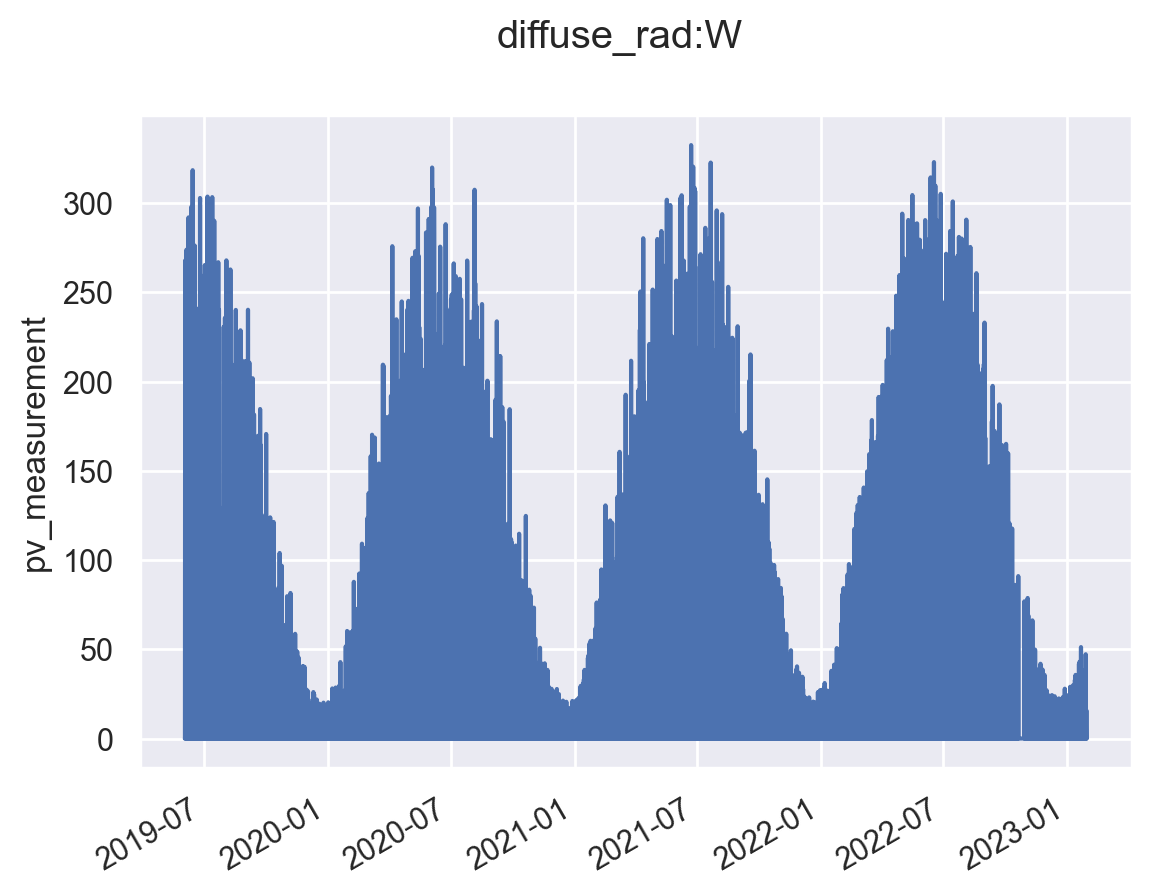

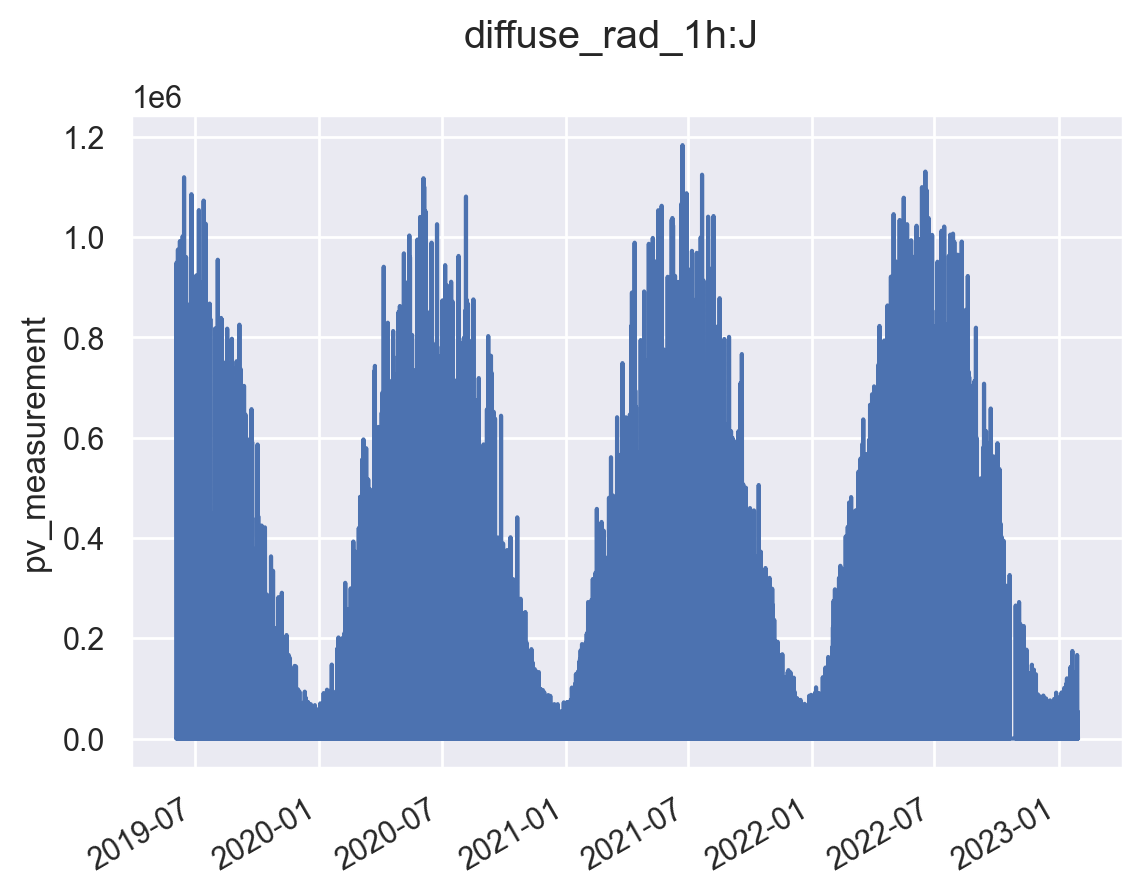

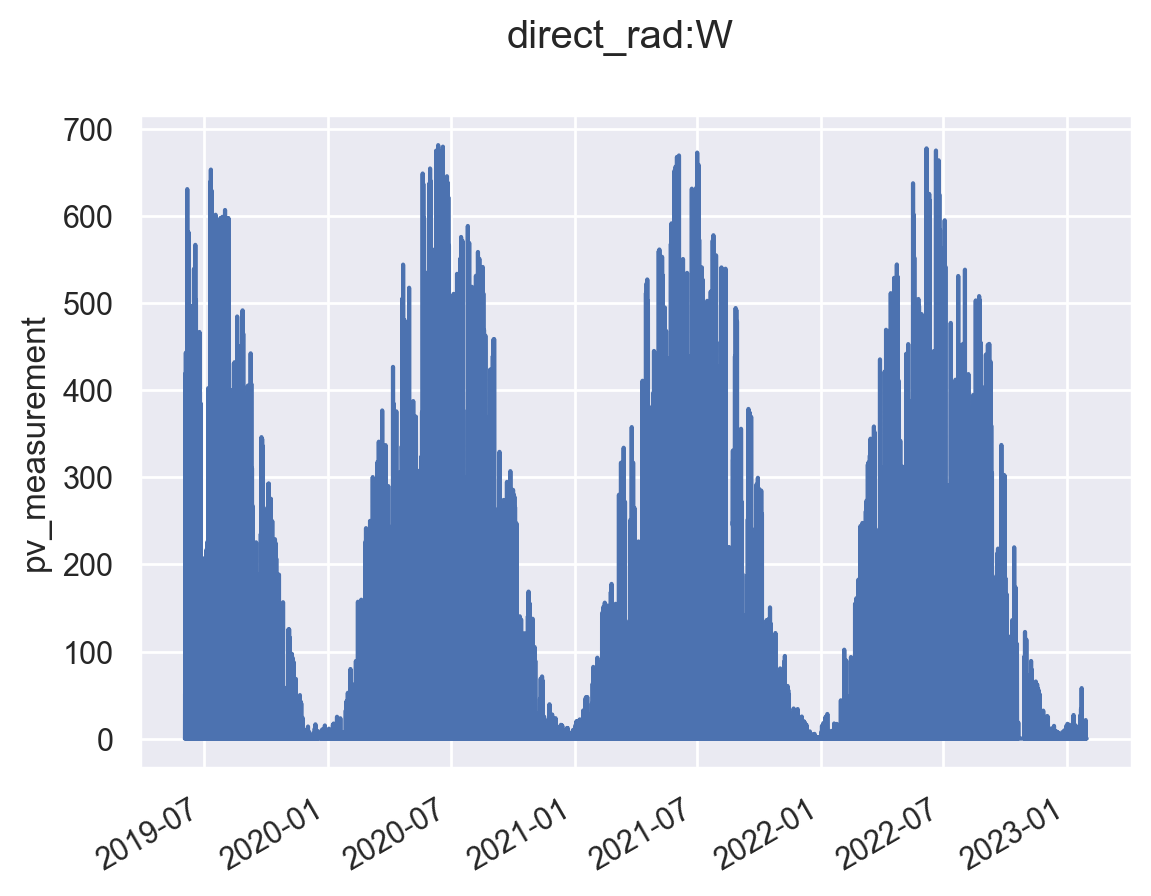

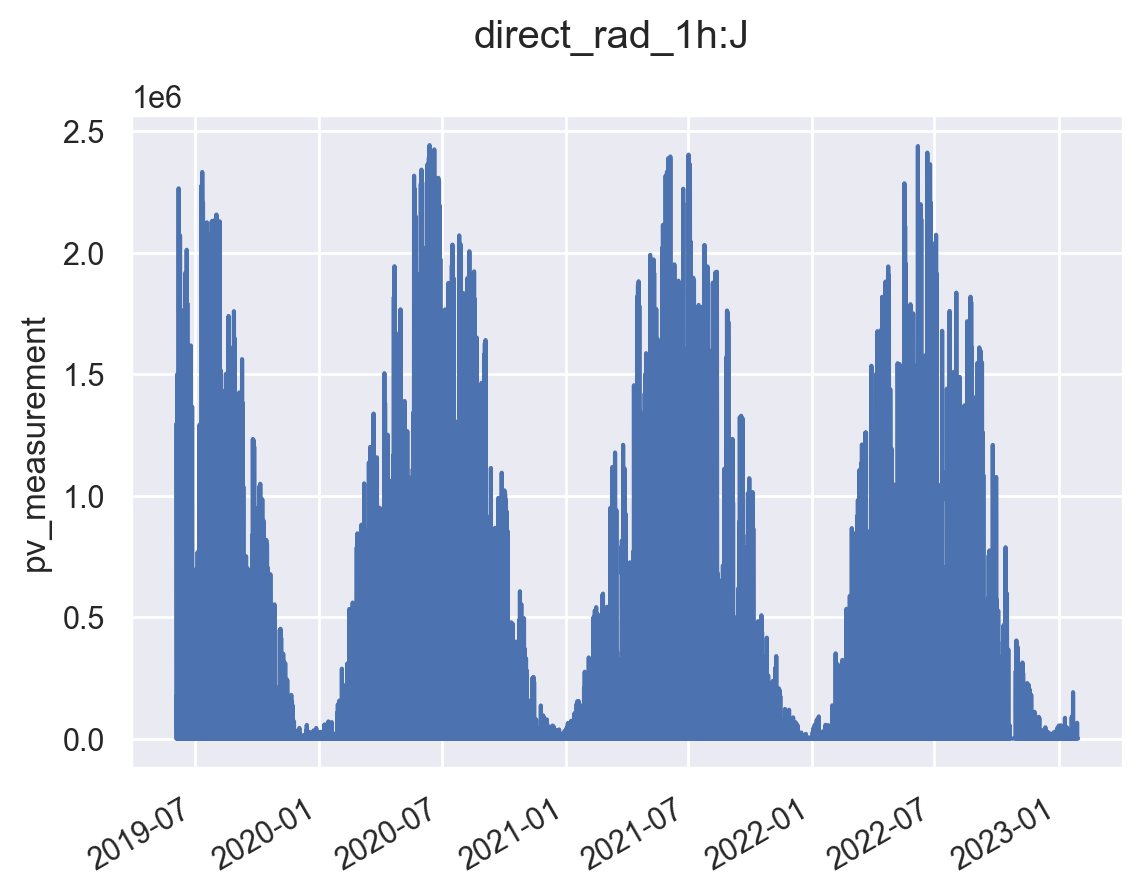

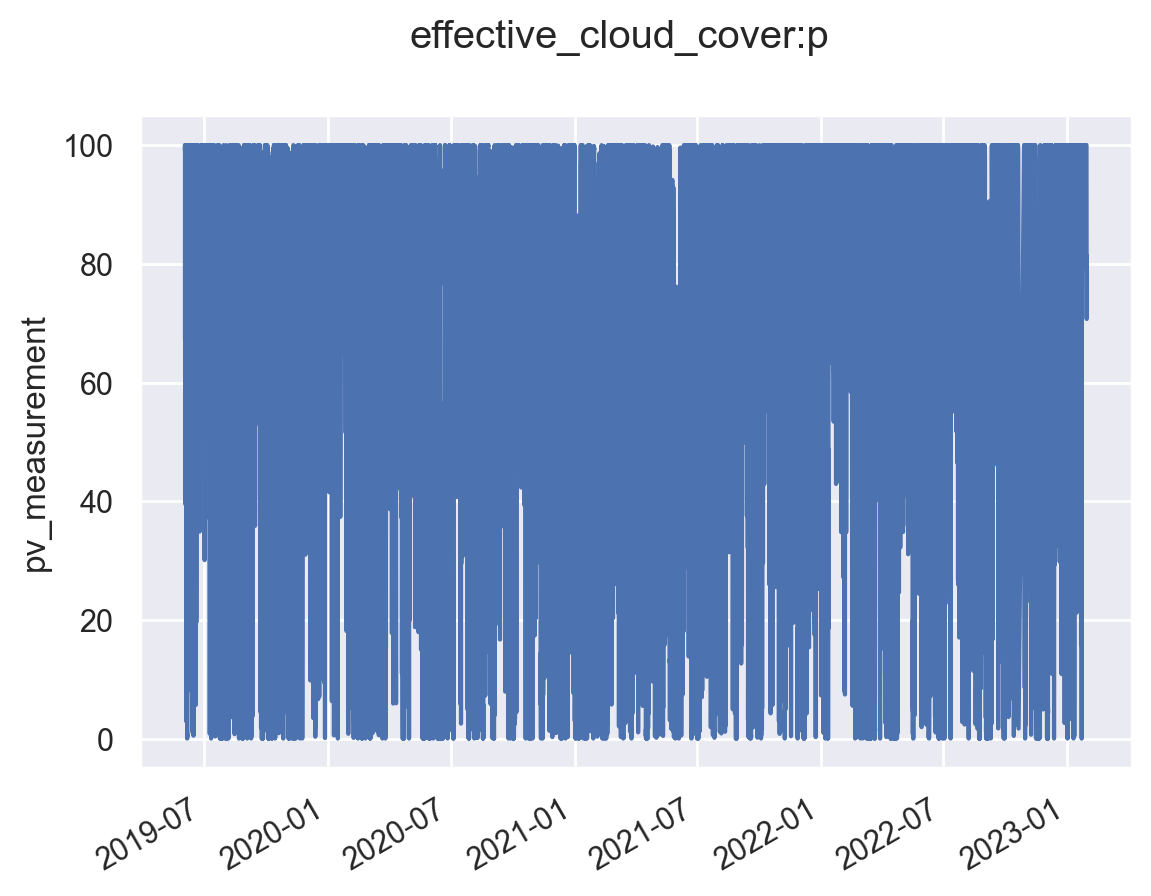

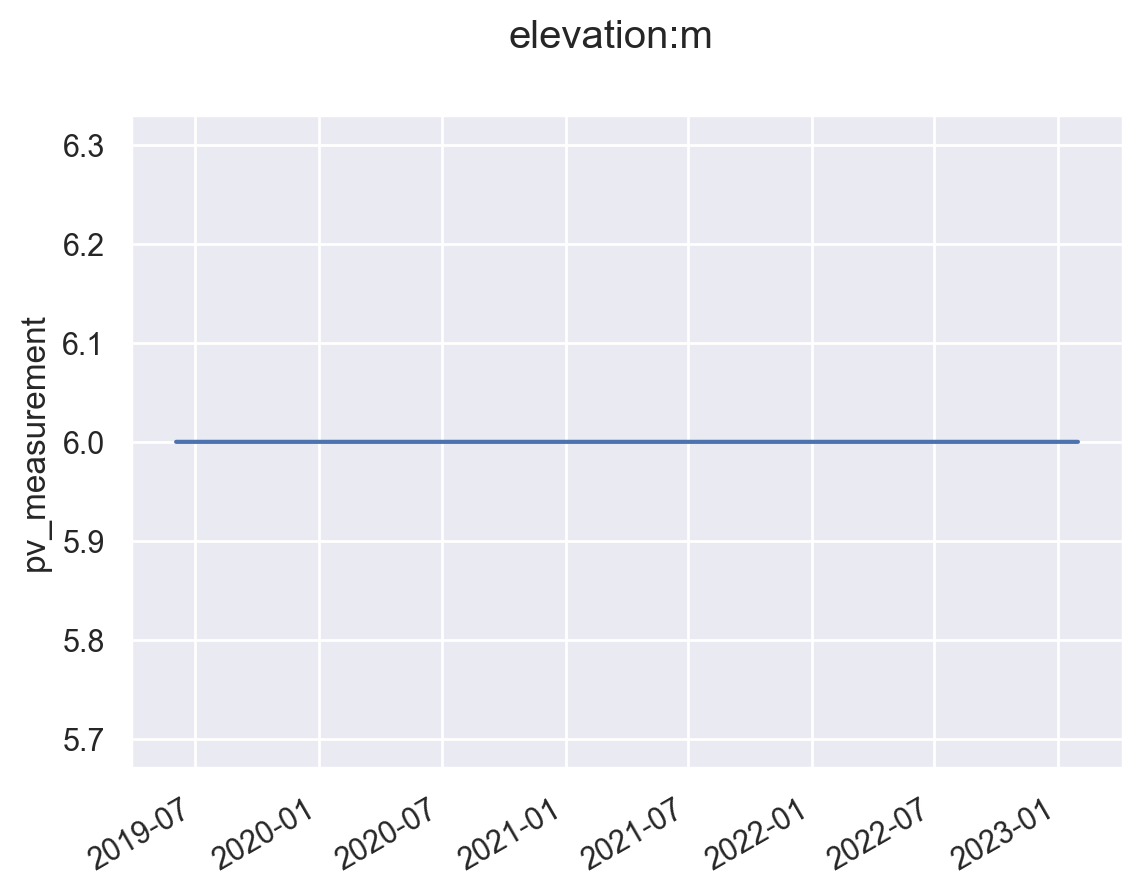

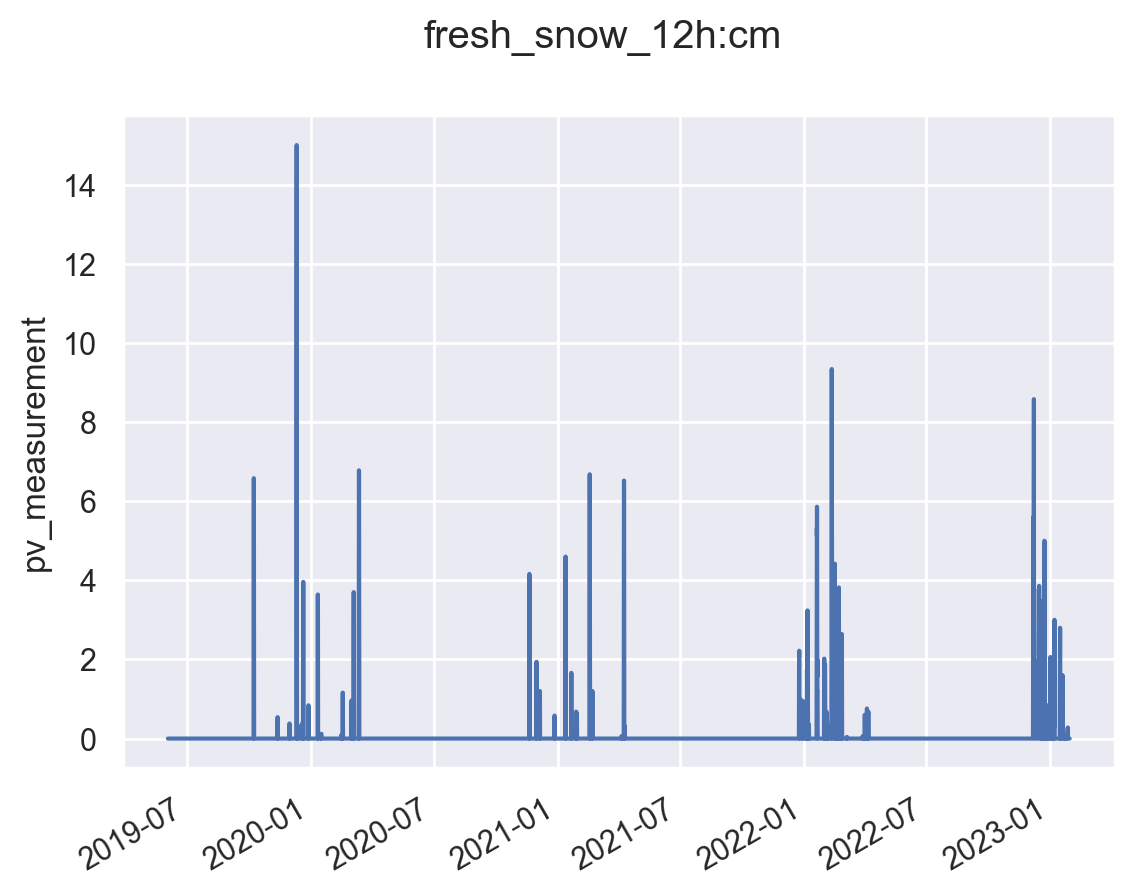

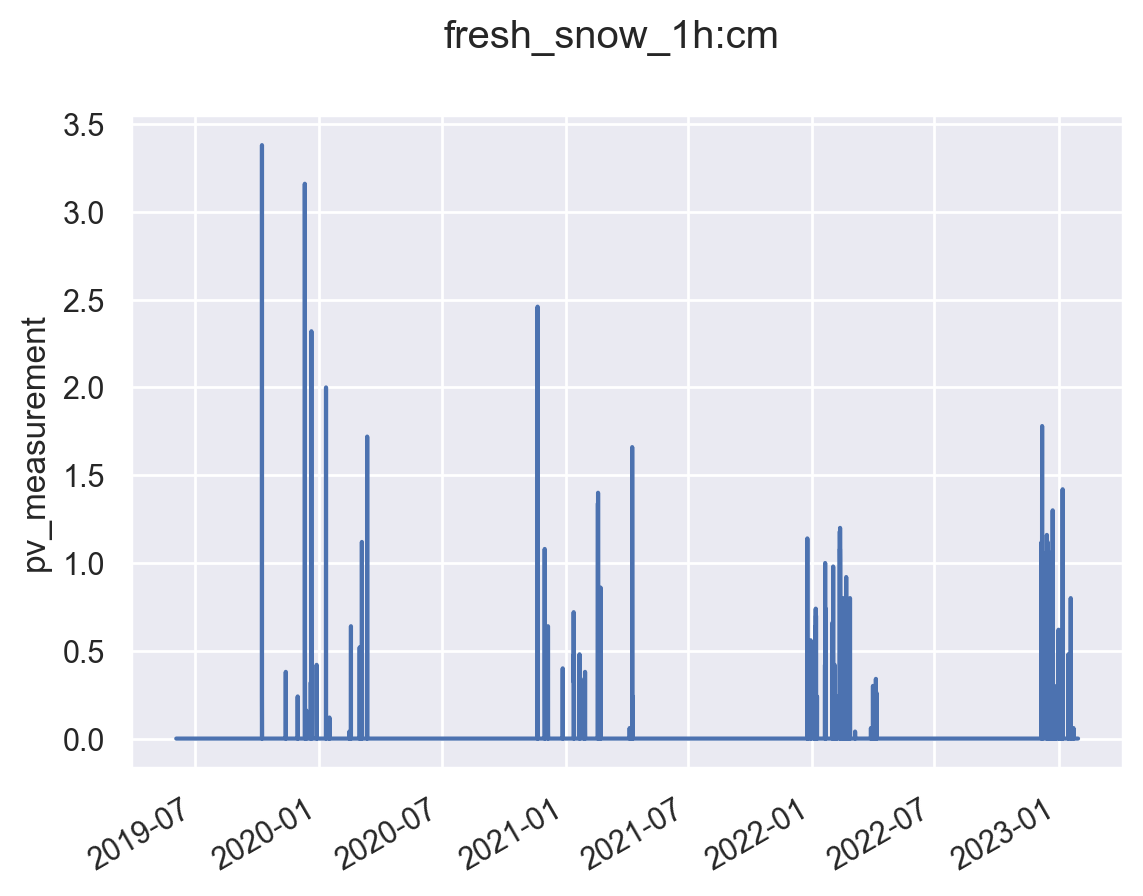

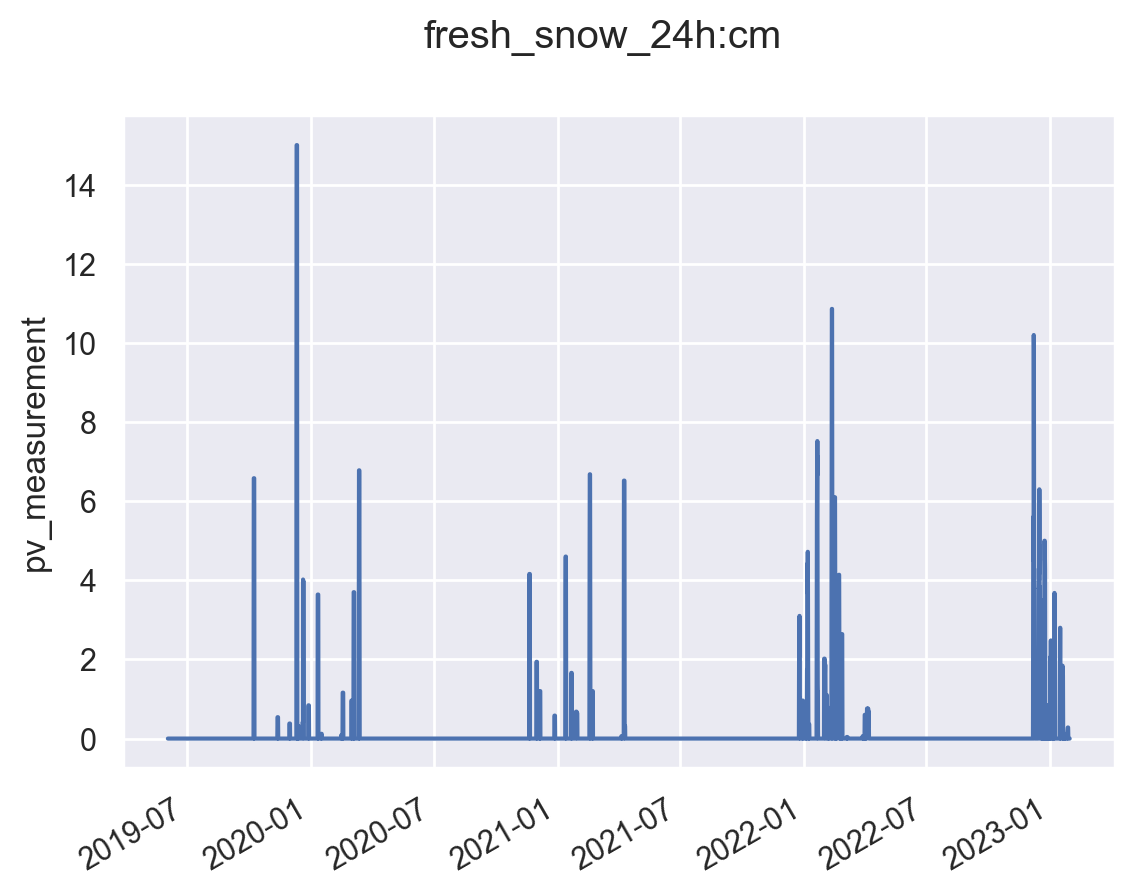

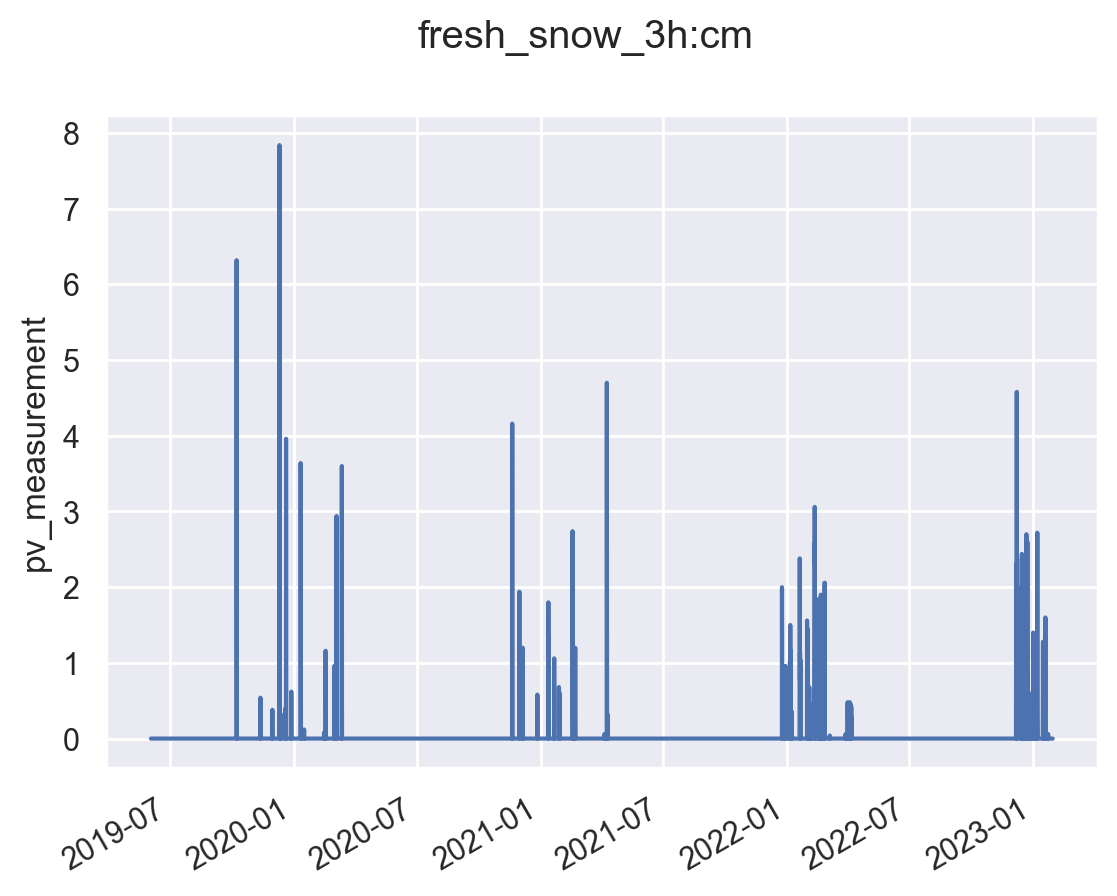

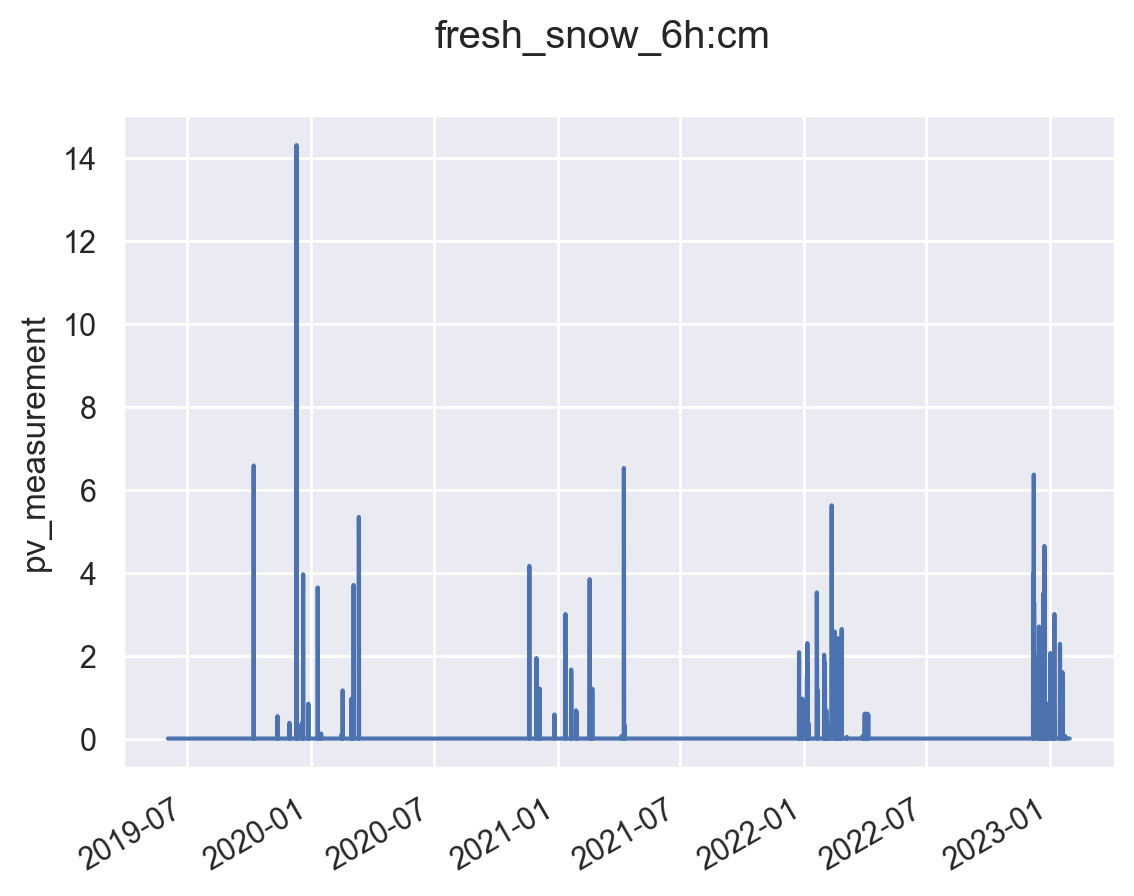

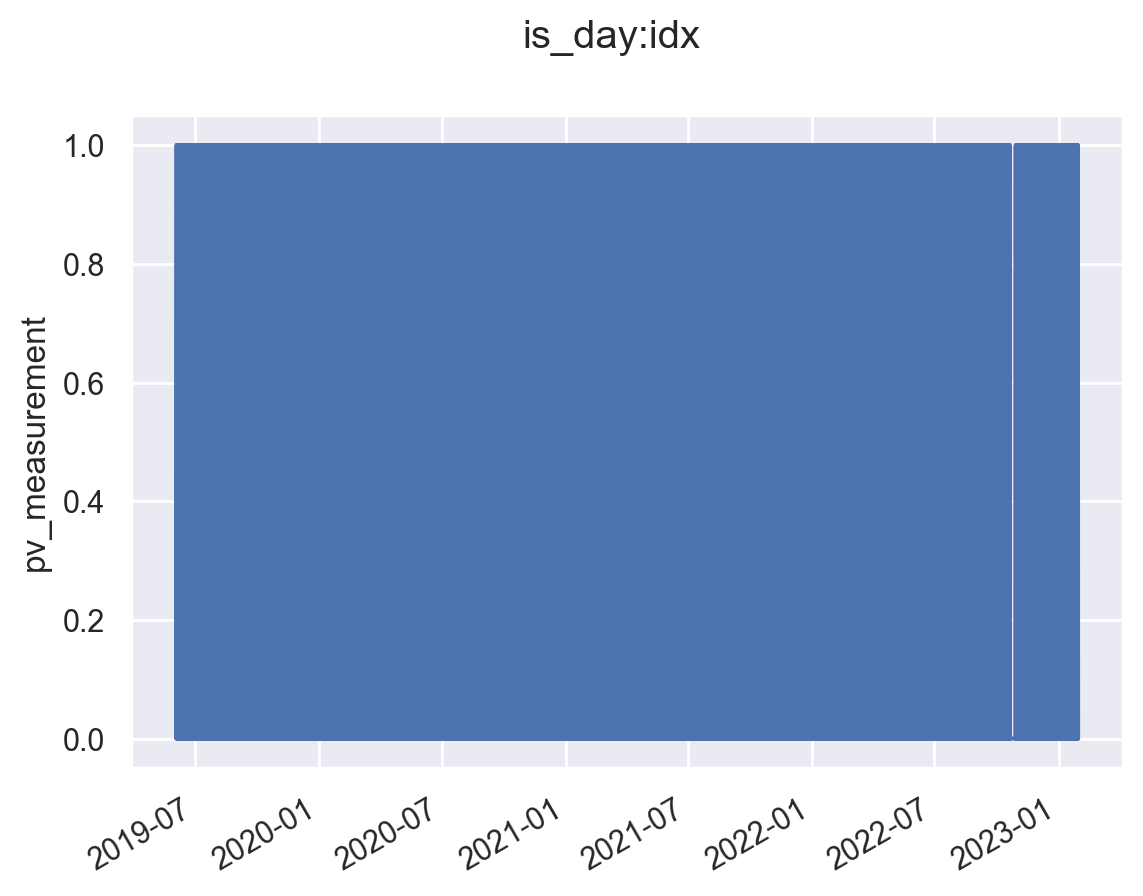

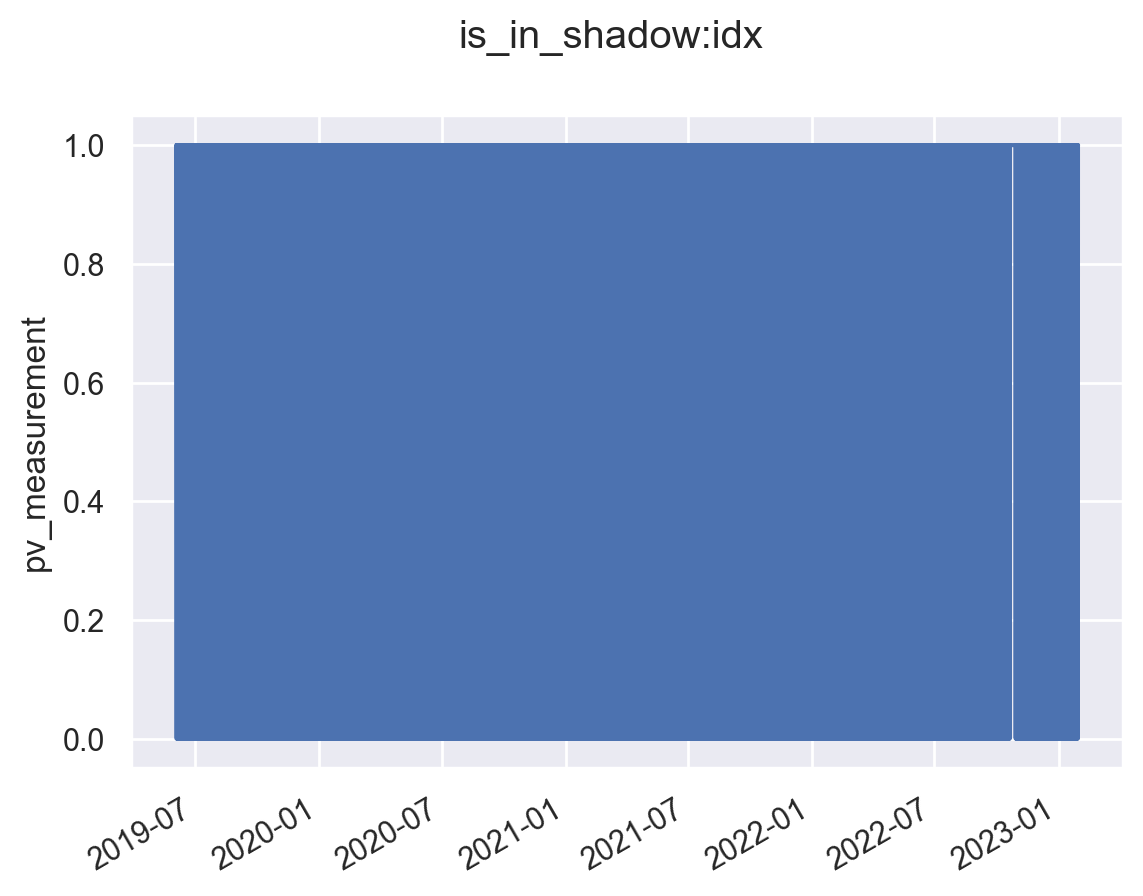

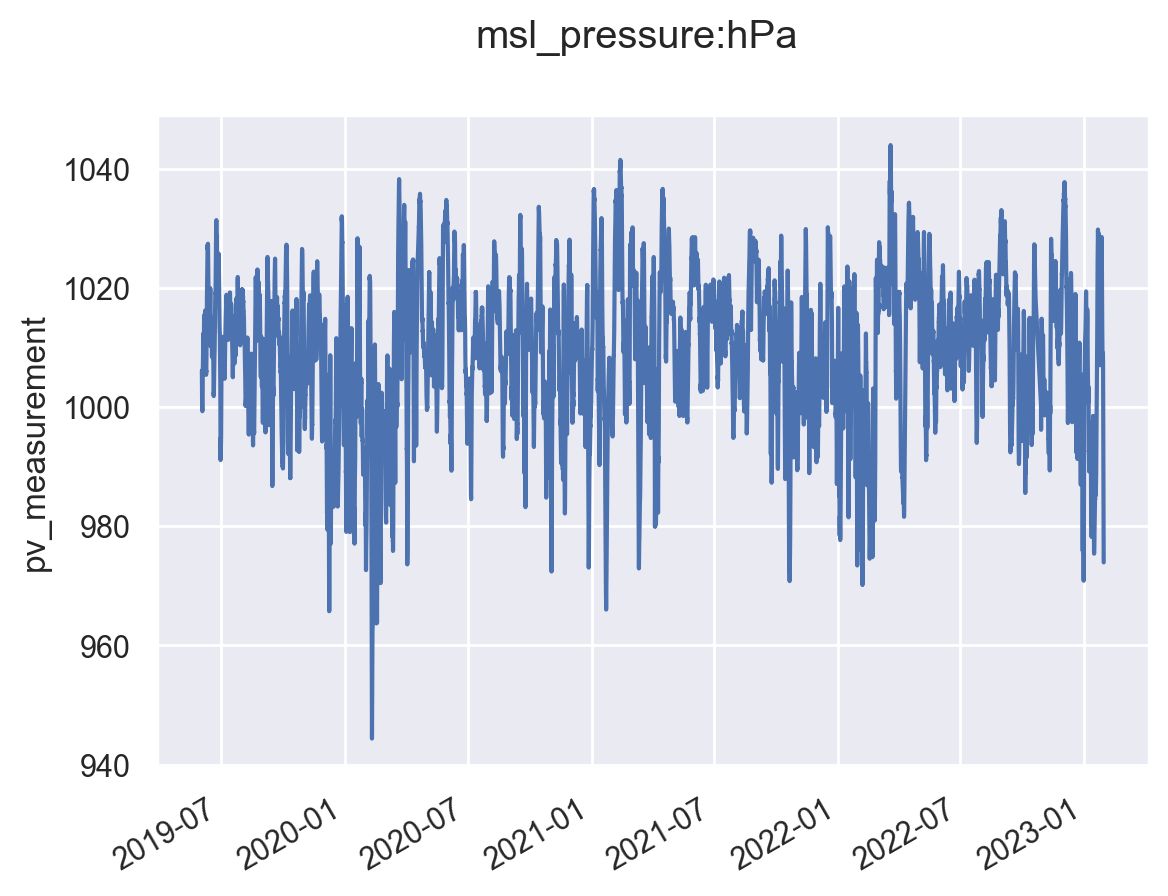

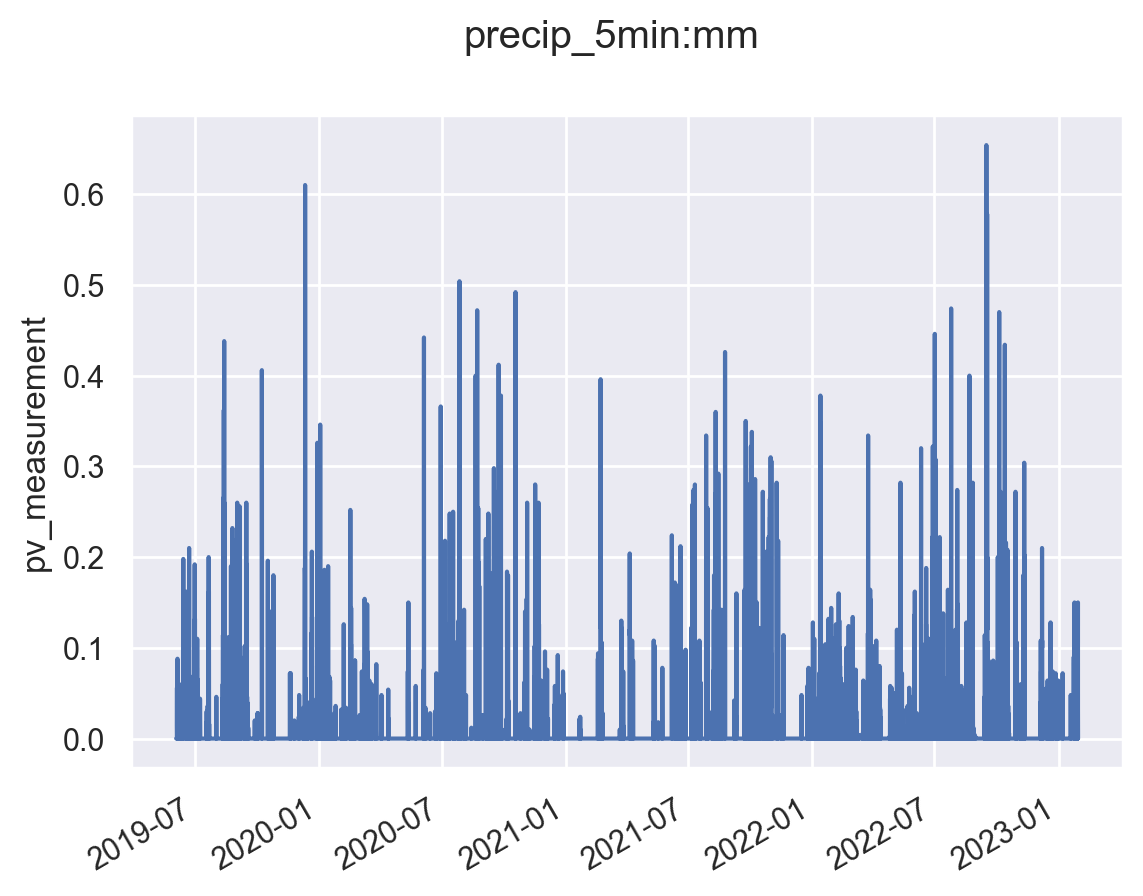

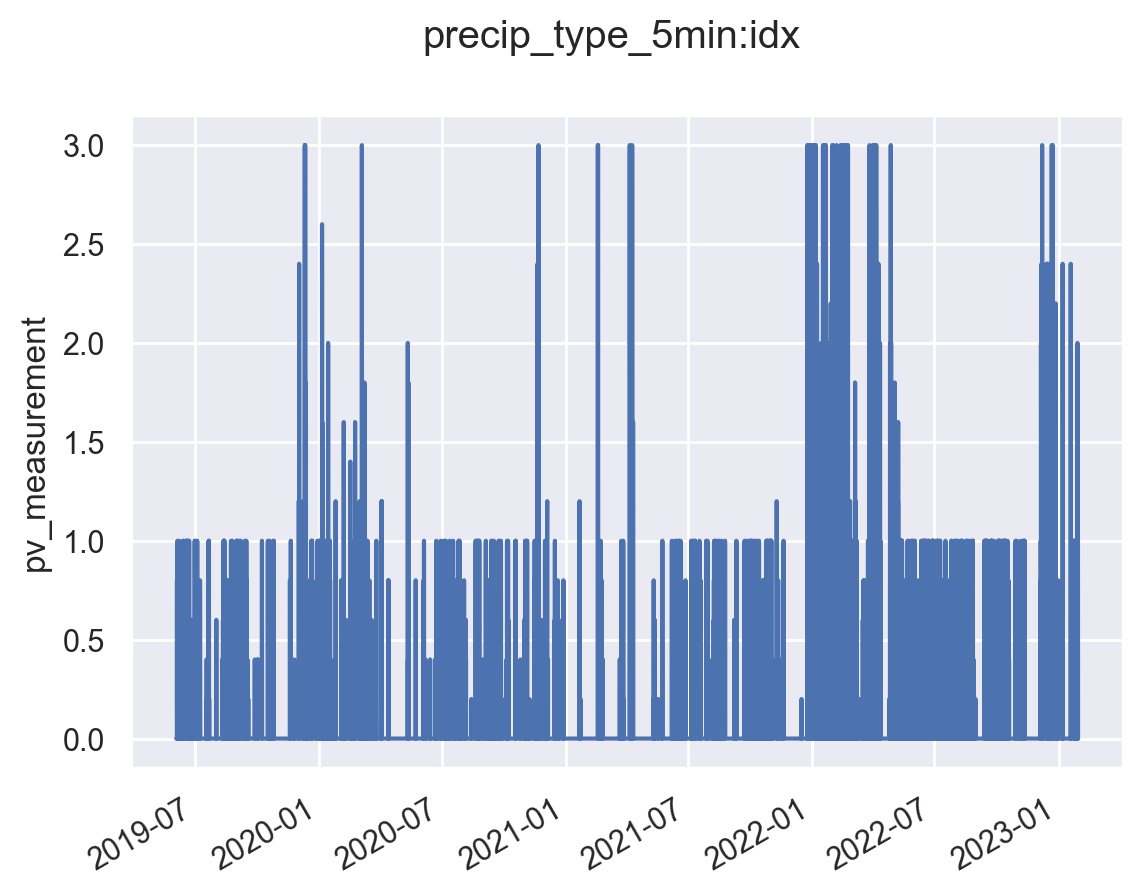

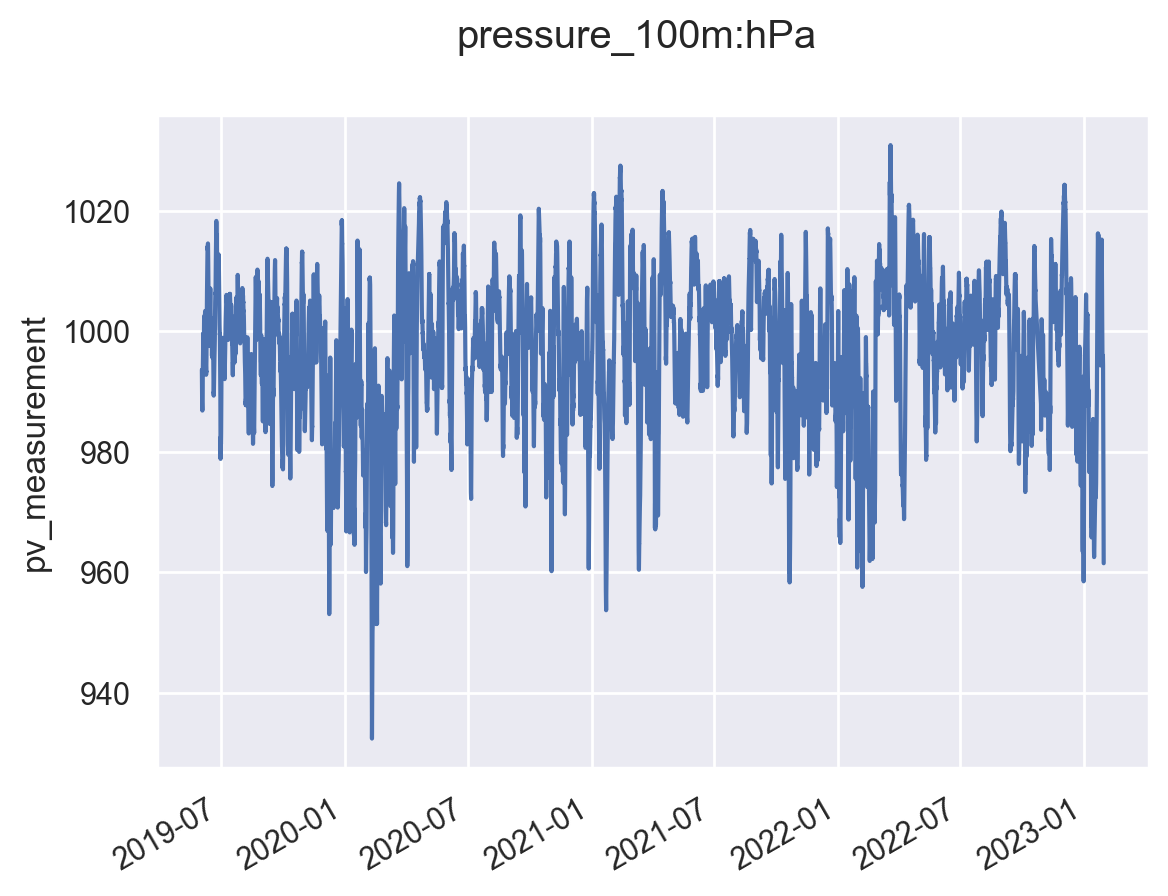

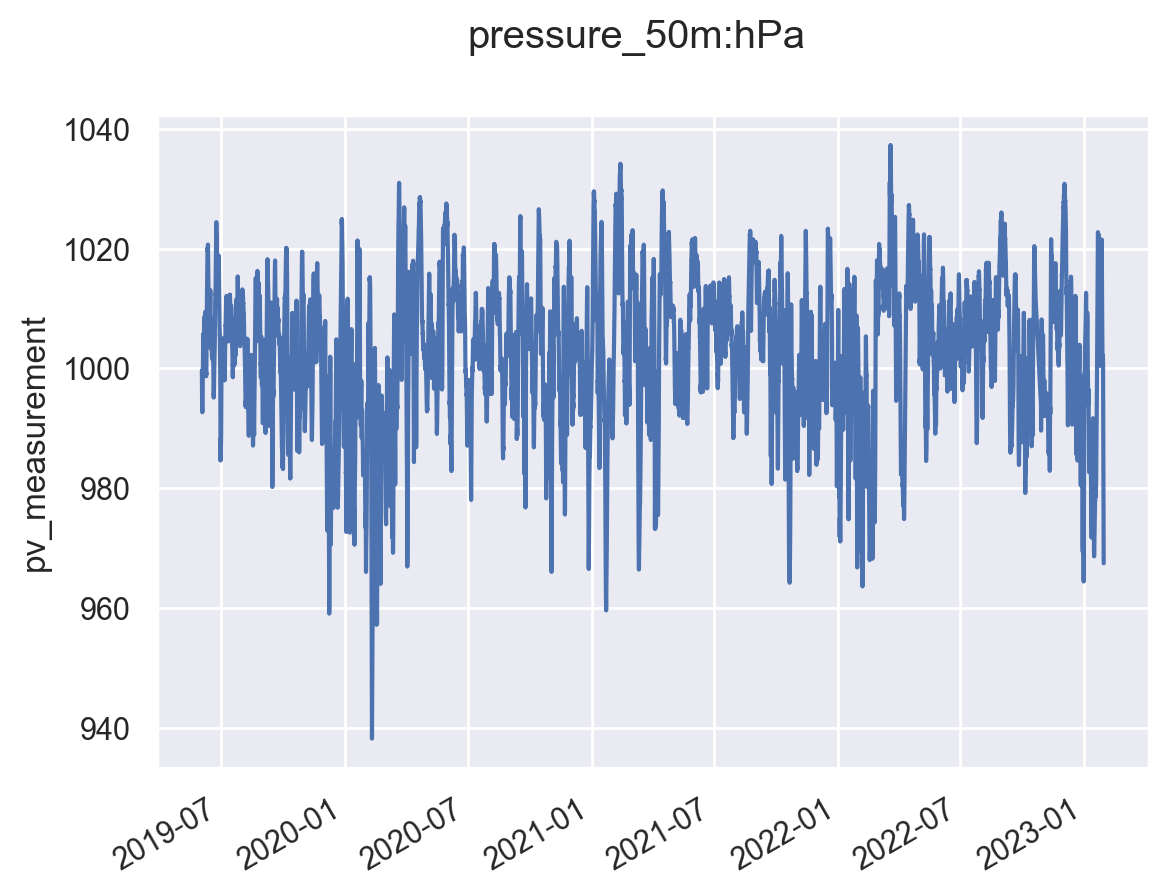

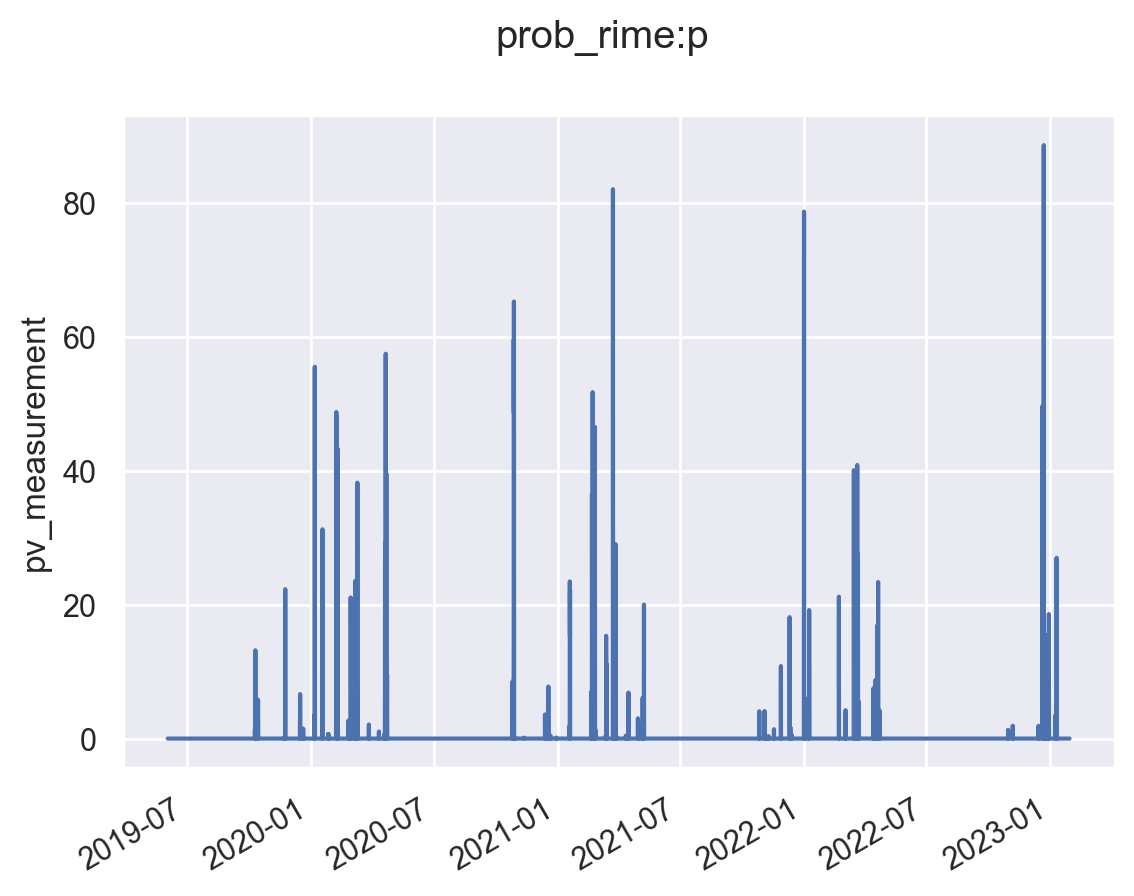

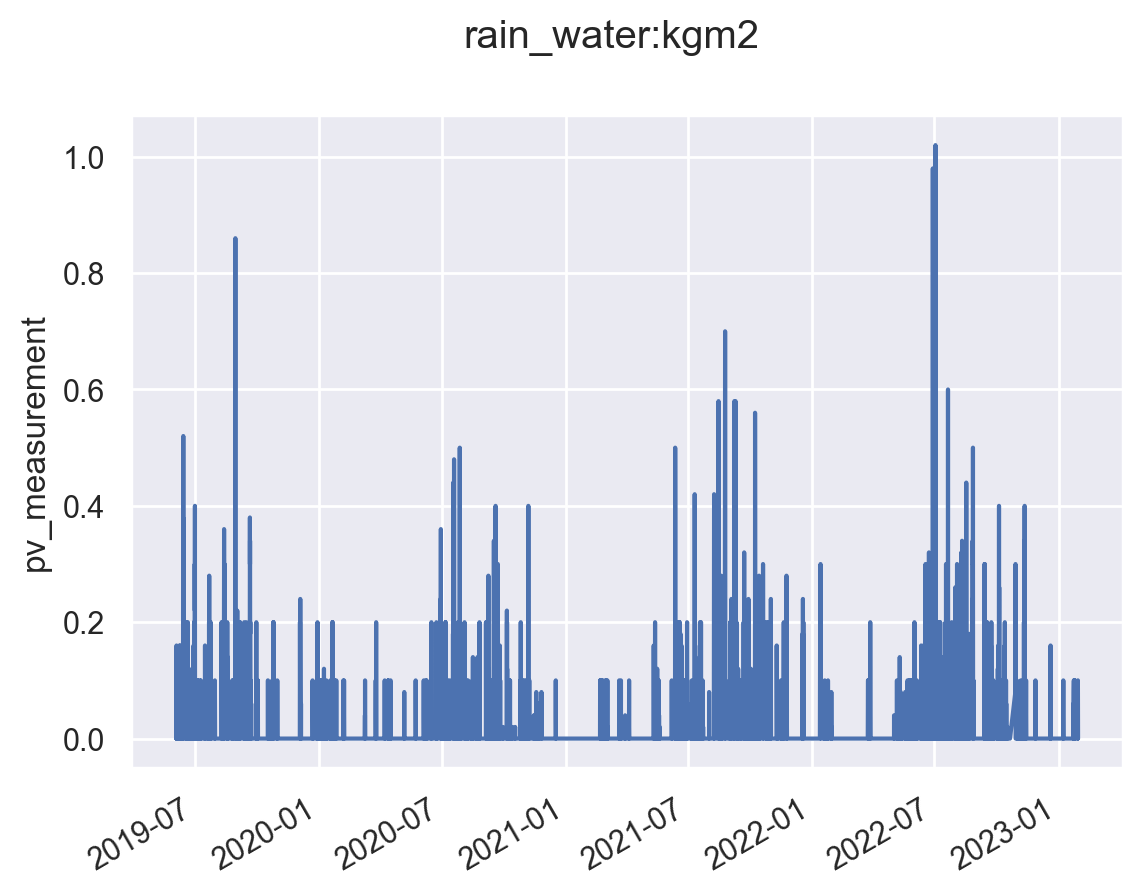

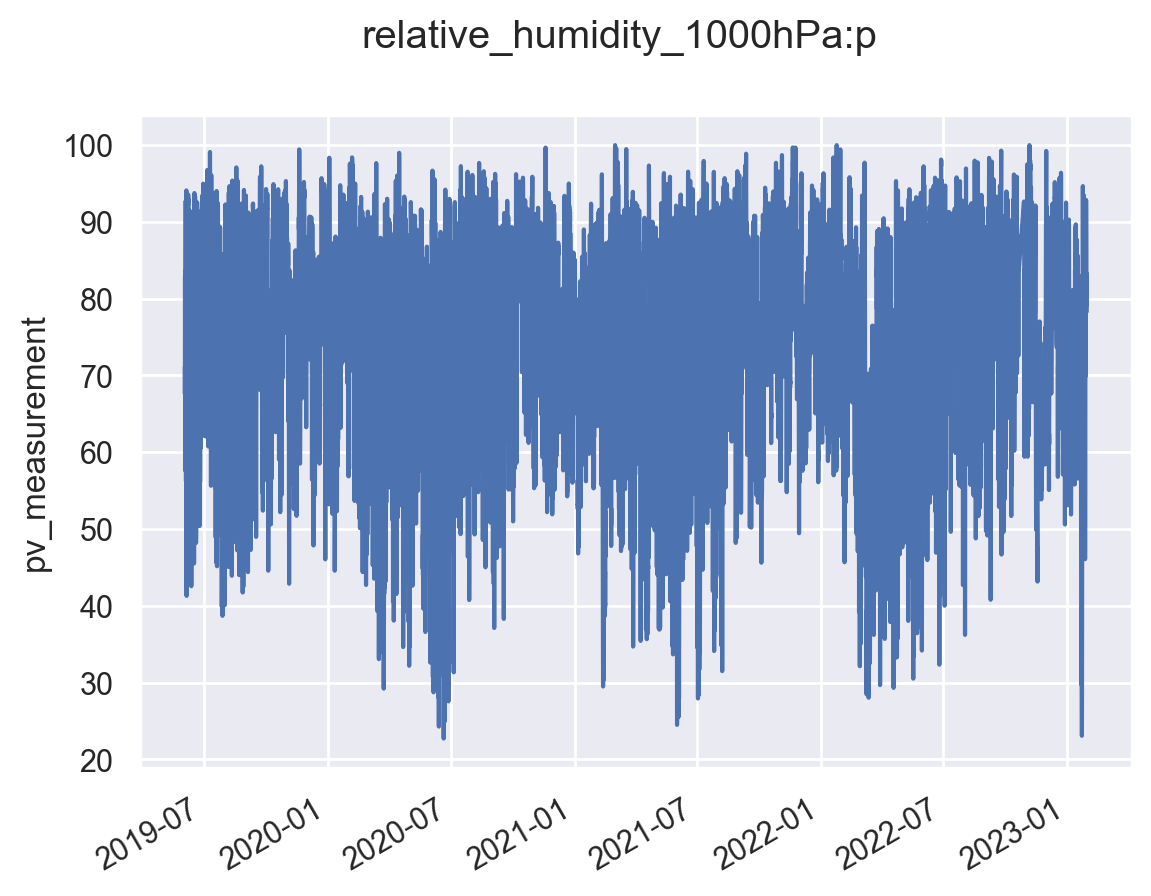

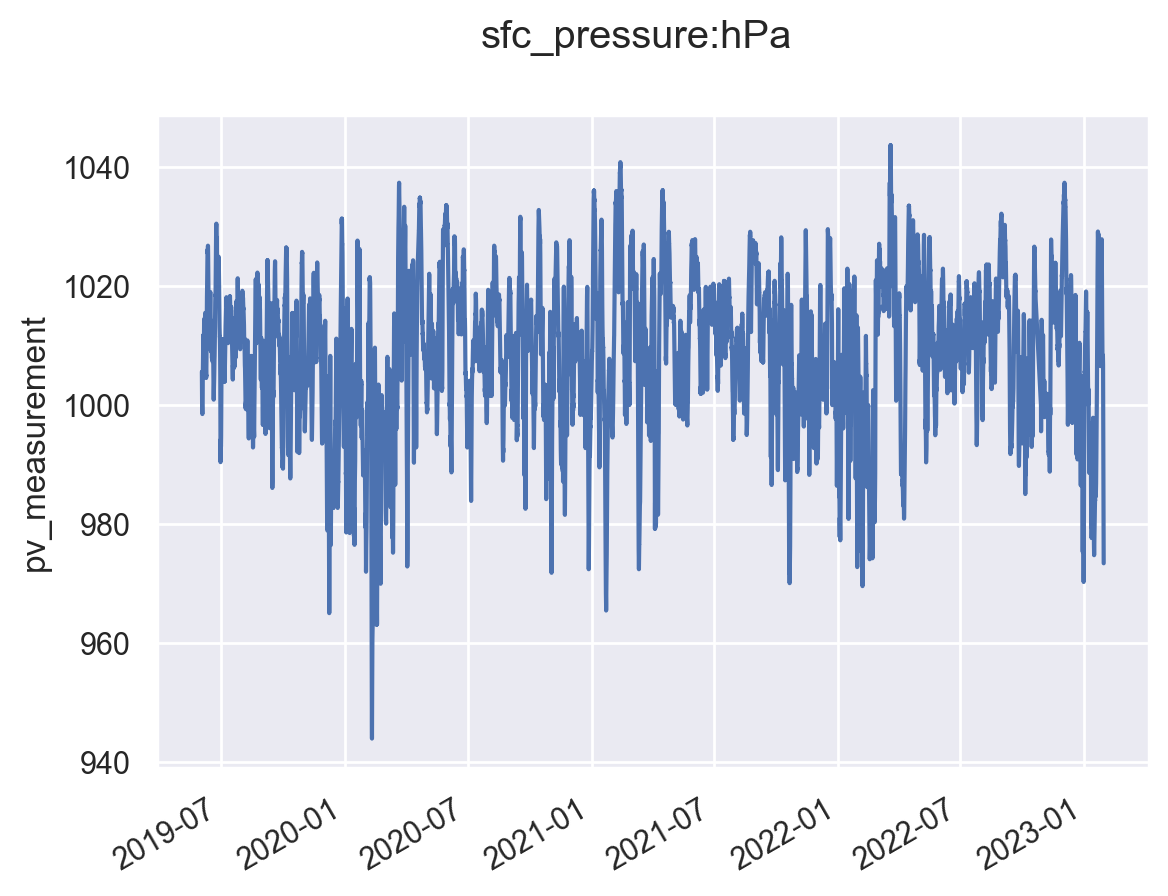

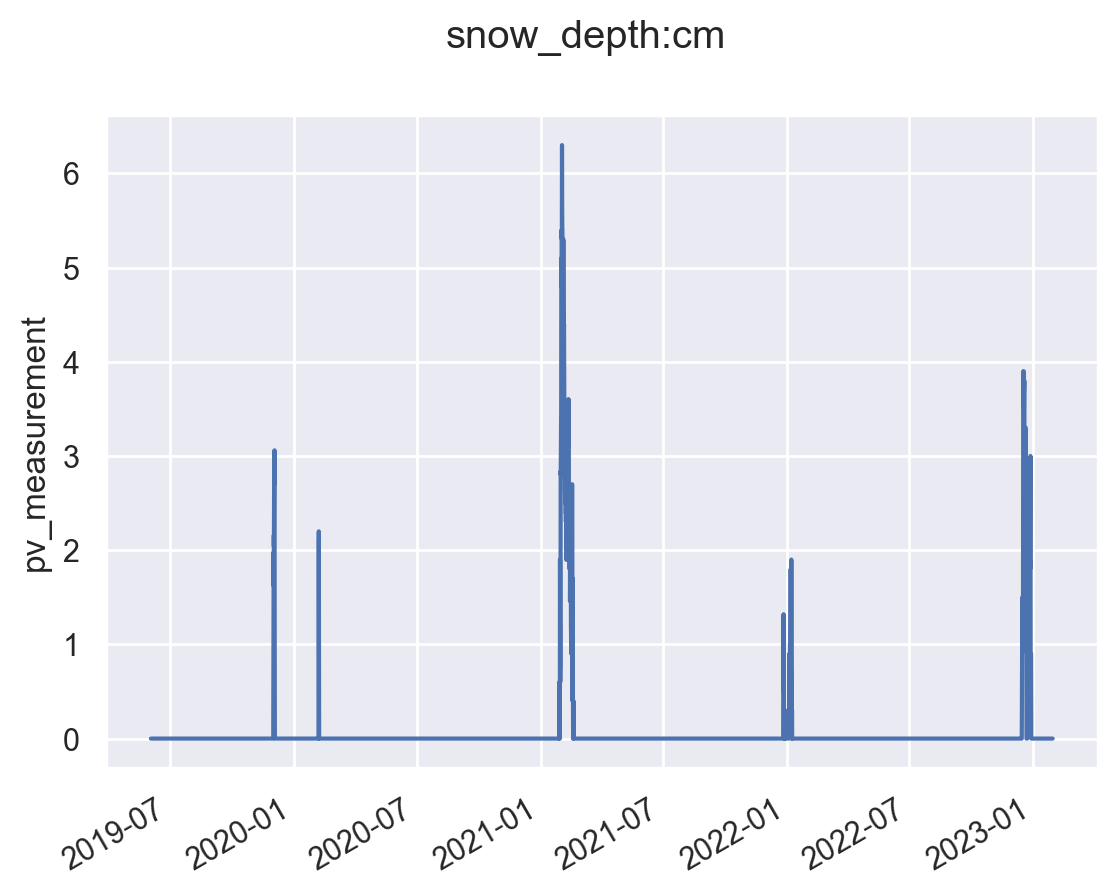

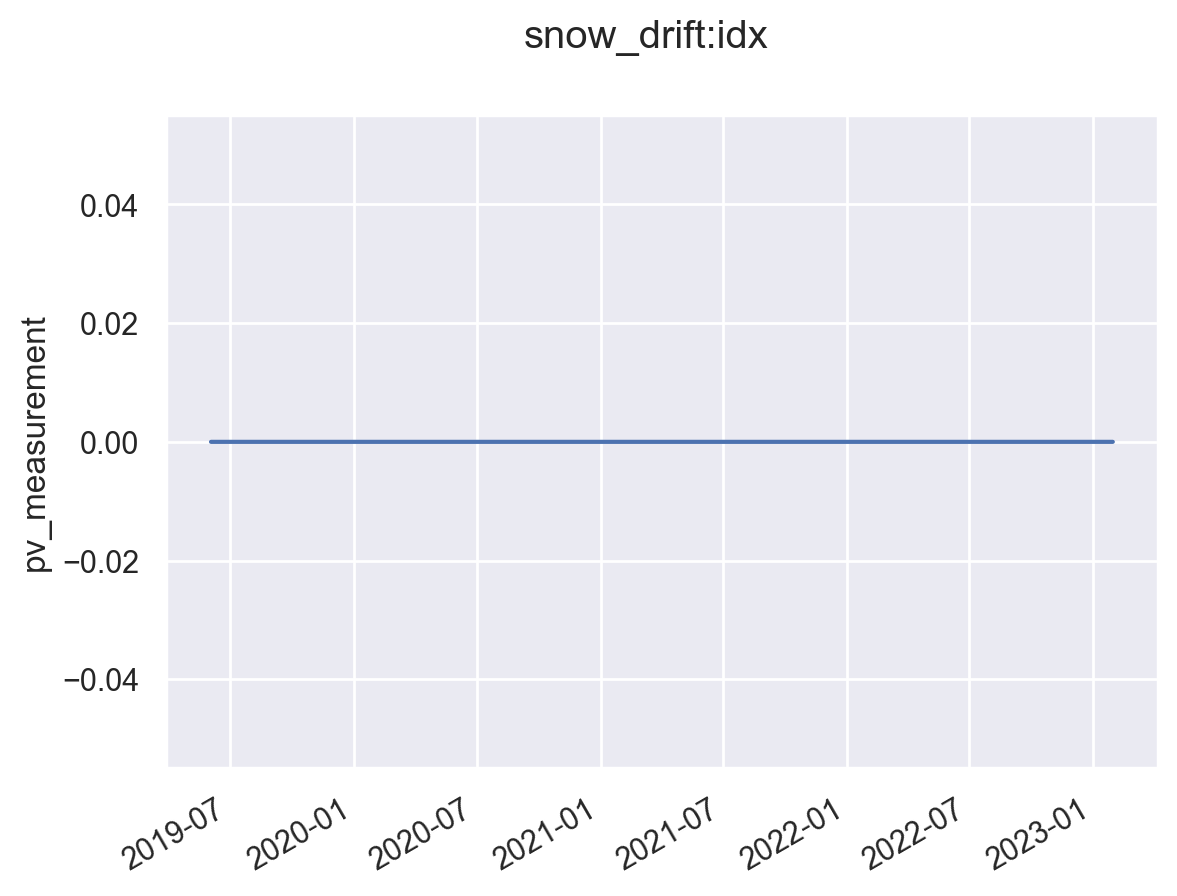

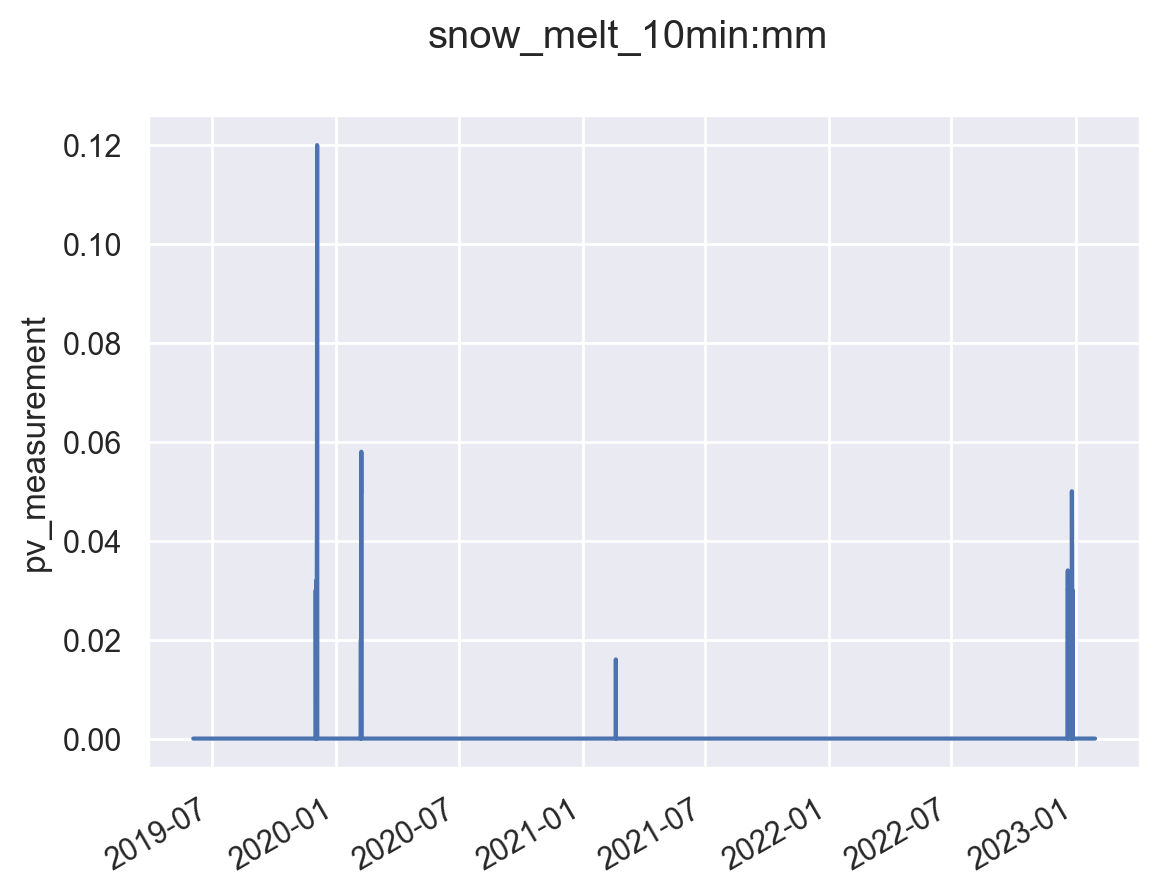

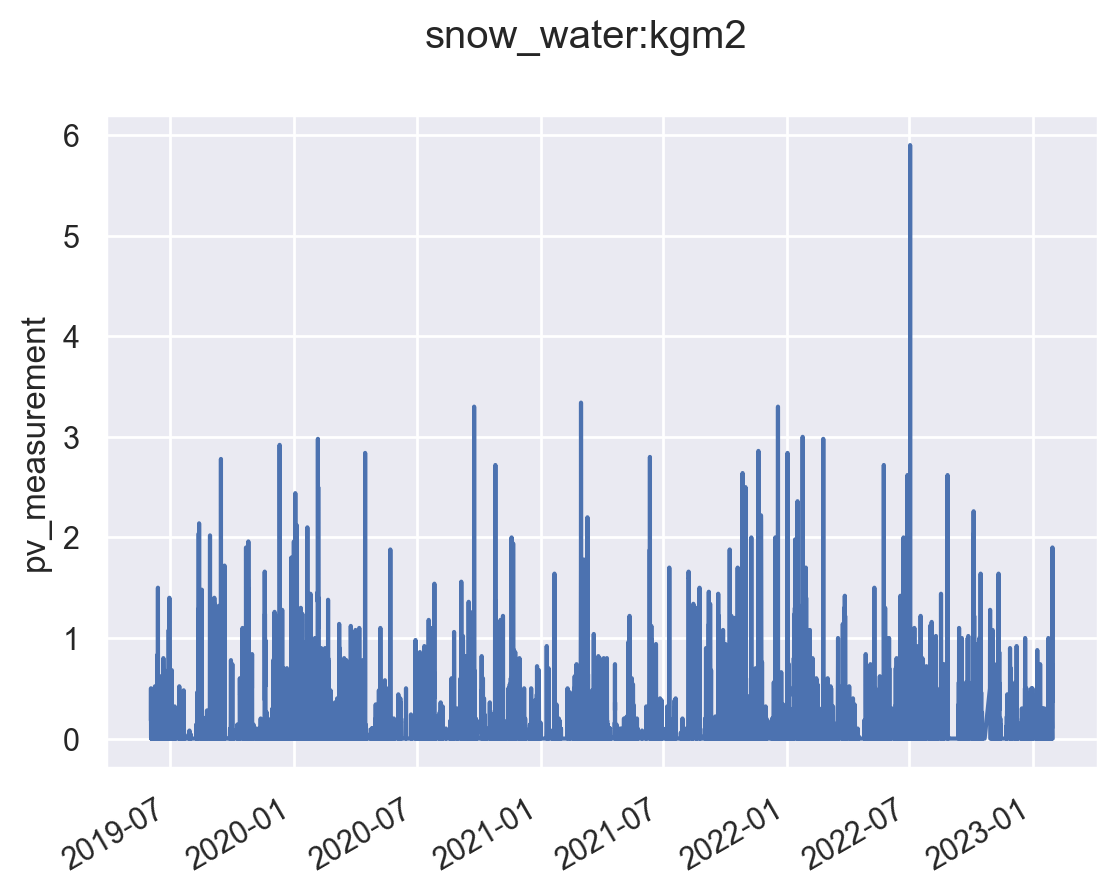

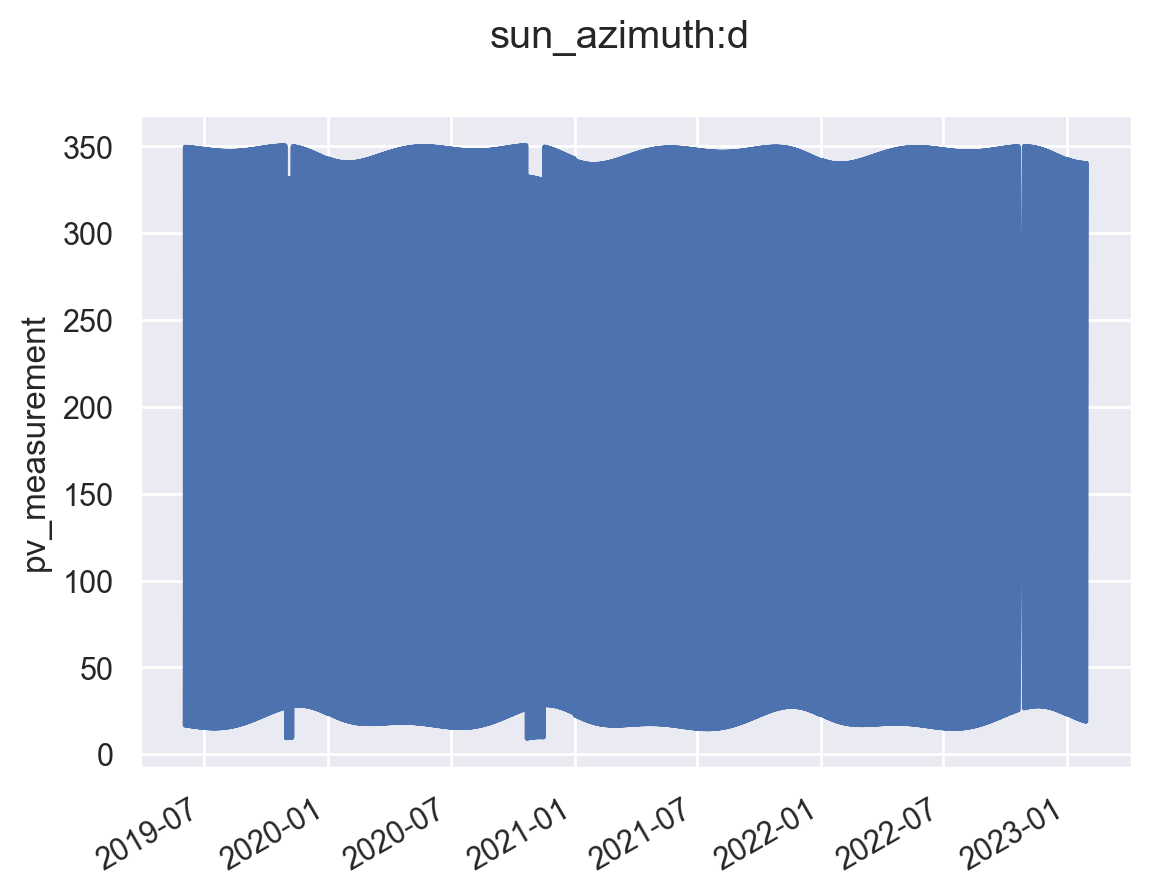

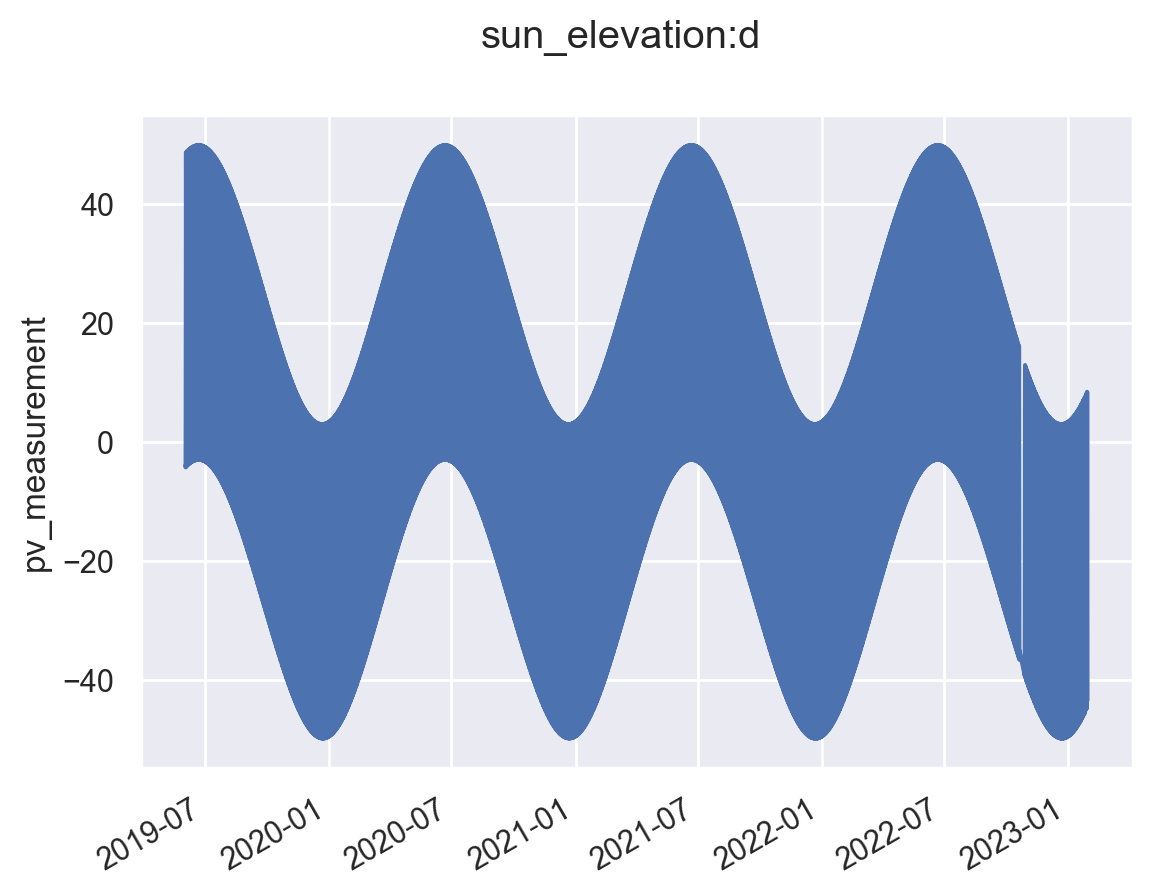

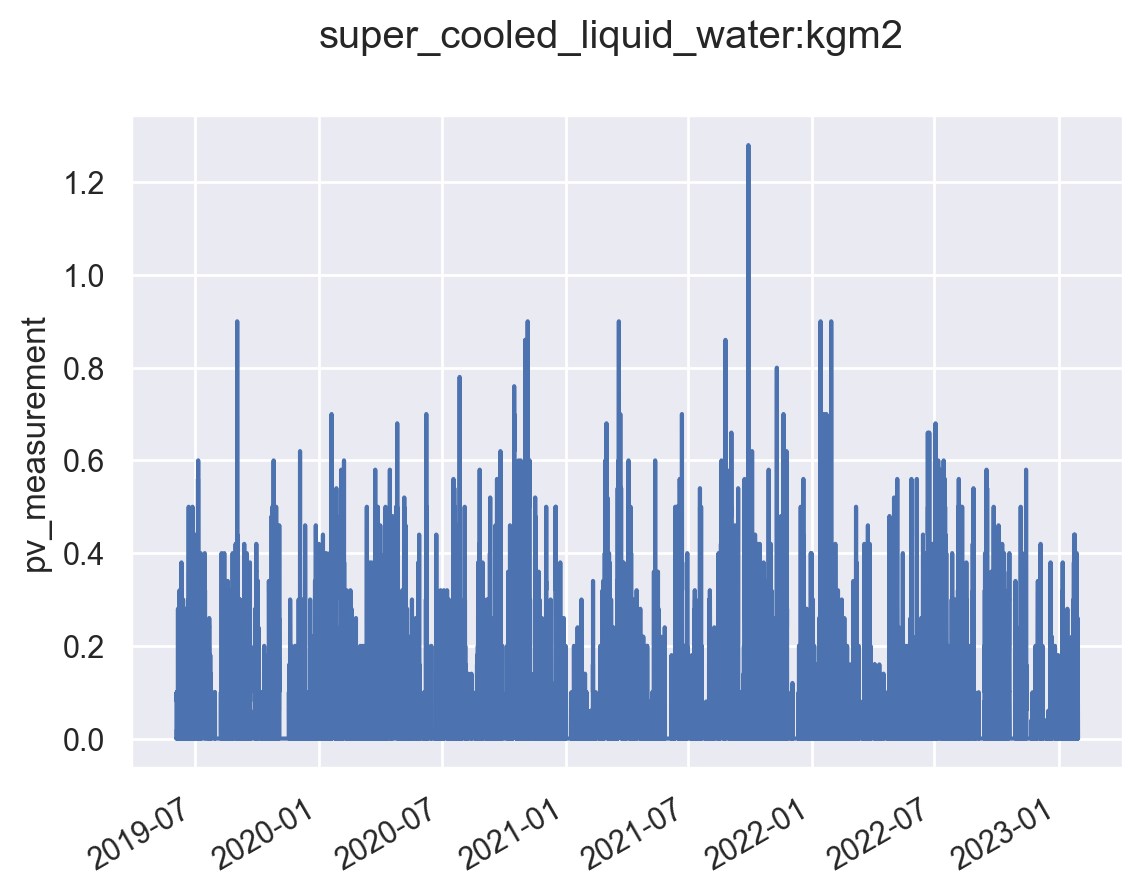

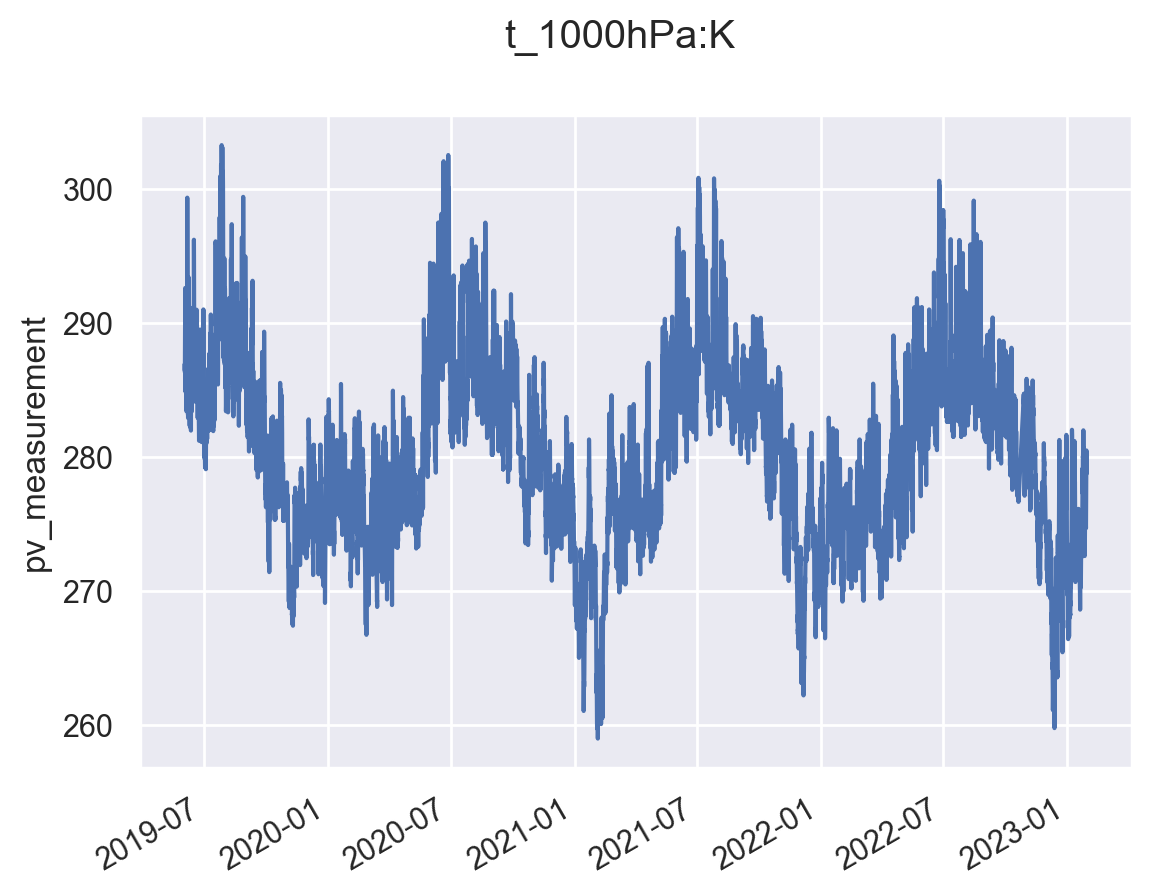

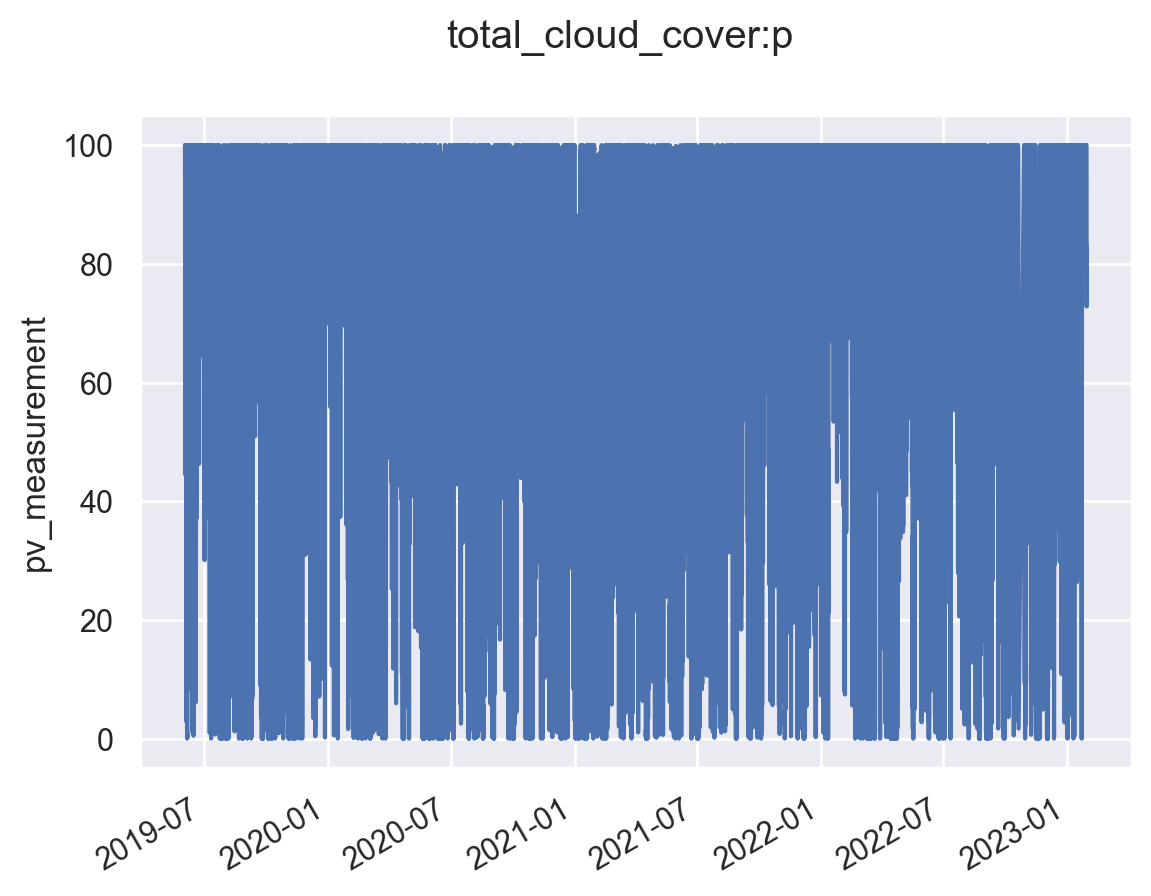

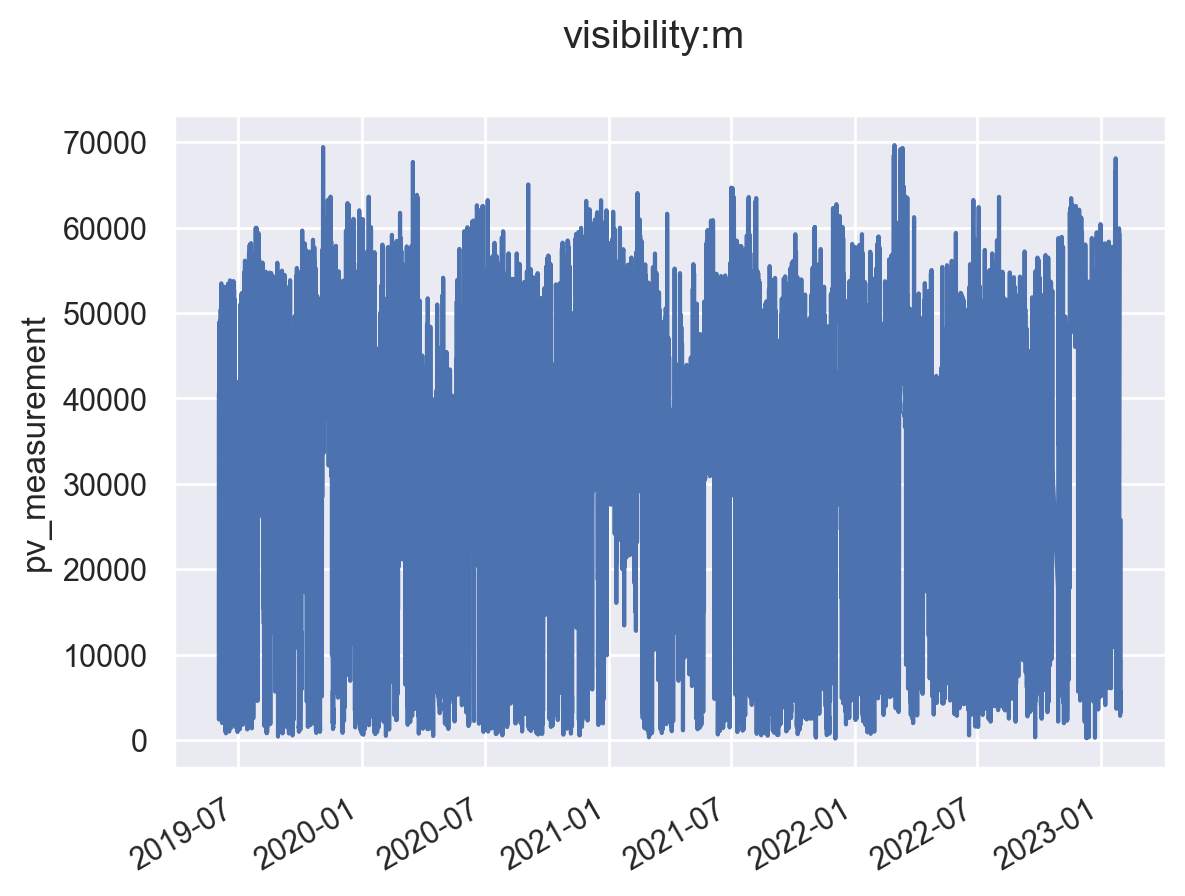

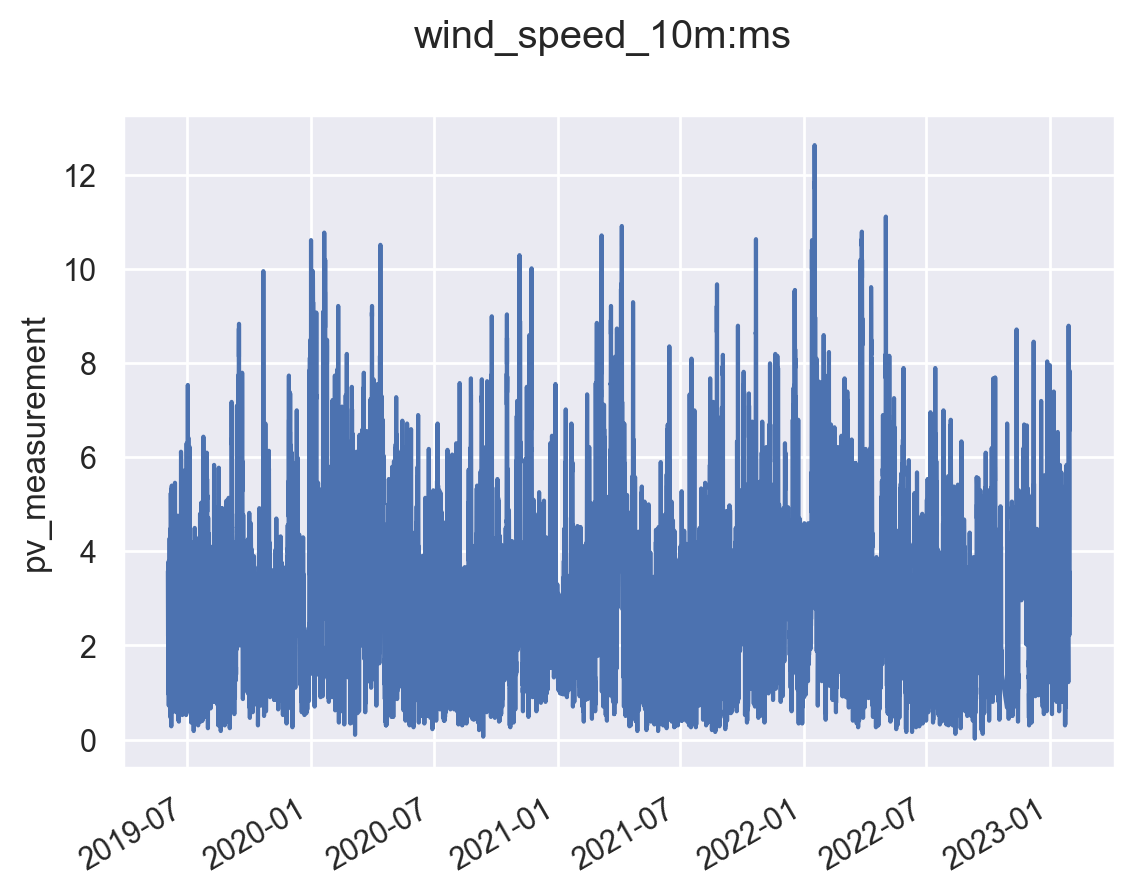

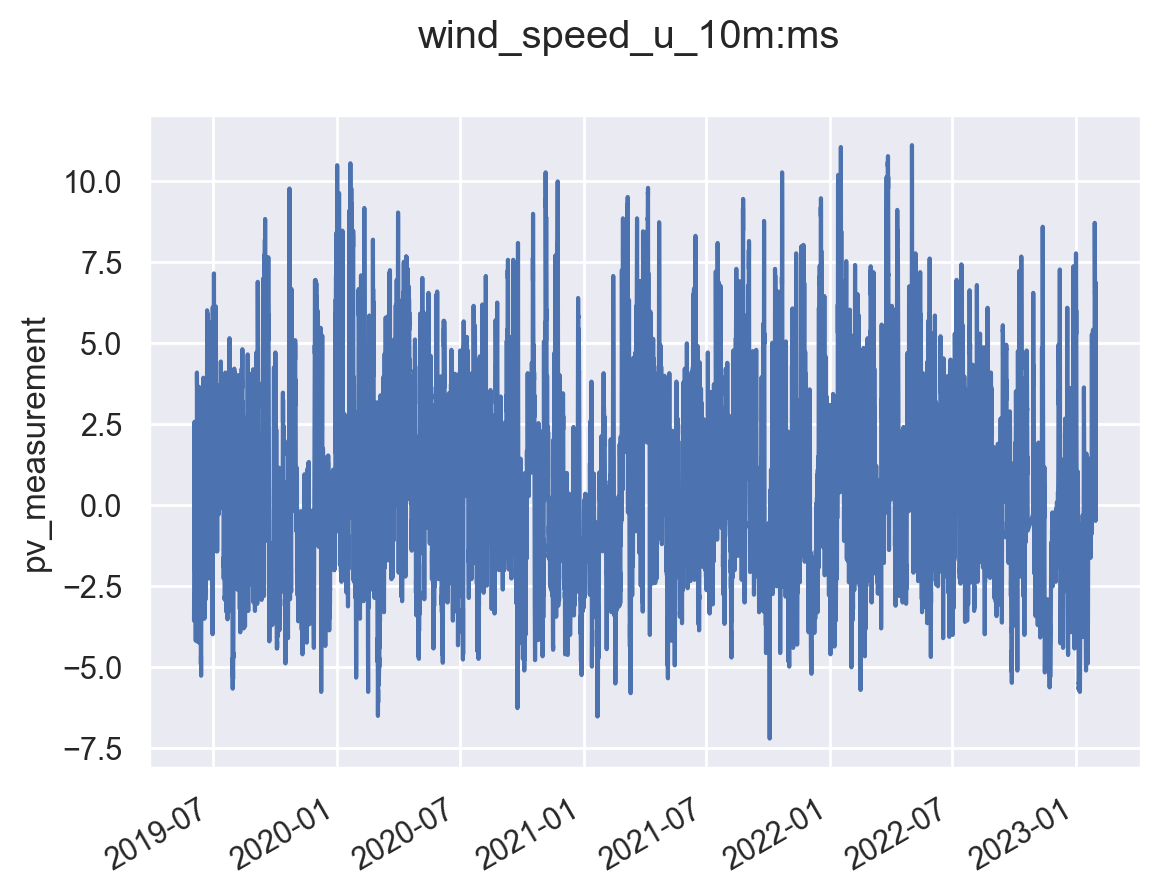

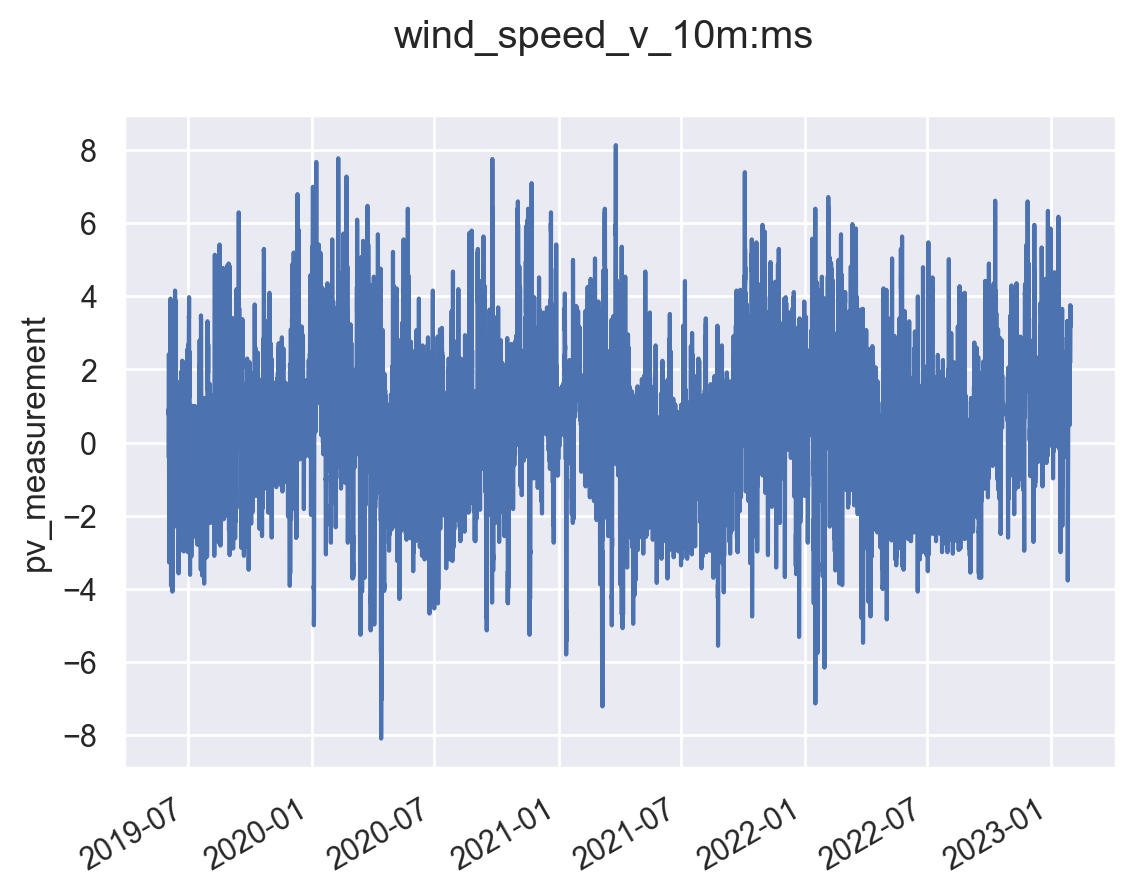

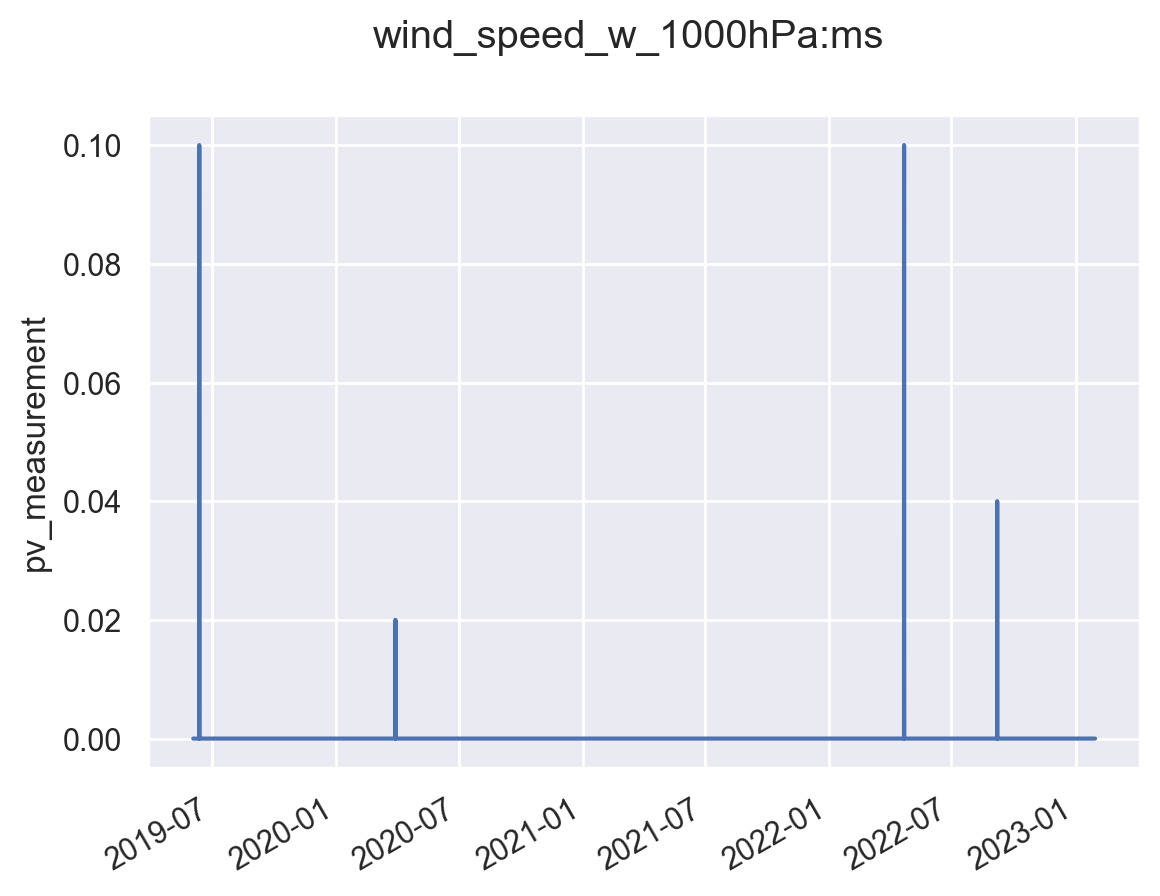

In [96]:
for i in range(len(X_train_estimated_train.columns)-1):
    plt.plot(X_train_estimated_train.iloc[:,[0]],X_train_estimated_train.iloc[:,[i+1]])
    plt.gcf().autofmt_xdate()
    plt.ylabel("pv_measurement")
    plt.suptitle(X_train_estimated_train.columns[i+1])
    plt.show()

In [78]:
test_mod = SARIMAX(train_a_clean_train["pv_measurement"], exog = X_train_estimated_train.iloc[:,1:], order = (1, 1, 1))
test_mod_fit = test_mod.fit()
test_mod_fit_pred = test_mod_fit.predict(start=len(train_a_clean_train), end=(len(train_a_clean_train) + len(X_train_estimated_test)-1), type = "levels", exog = X_train_estimated_test.iloc[:,1:])
test_mod_fit_pred[test_mod_fit_pred < 0] = 0
test_mod_fit_pred_full = pd.DataFrame({'time': X_train_estimated_test["date_forecast"], 'pv_measurement': test_mod_fit_pred.reset_index(drop=True)}, columns=train_a_clean_train.columns)
print(np.mean(abs(train_a_clean_test["pv_measurement"] - test_mod_fit_pred_full["pv_measurement"])))

591.2370040878784


In [5]:
finding_best_order_a = pd.DataFrame(columns=["p","d","q", "AIC"])
for p in range(3):
    for d in range(3):
        for q in range(3):
            finding_best_order_a = pd.concat([finding_best_order_a, pd.DataFrame(np.array([[p,d,q,SARIMAX(train_a_clean["pv_measurement"], exog = X_train_a_cleanest.iloc[:,1:], order = (p, d, q)).fit().aic]]), columns=finding_best_order_a.columns)], ignore_index=True)
            print(p,d,q)

0 0 0
0 0 1
0 0 2
0 1 0
0 1 1
0 1 2
0 2 0
0 2 1
0 2 2
1 0 0
1 0 1
1 0 2
1 1 0
1 1 1
1 1 2
1 2 0
1 2 1
1 2 2
2 0 0
2 0 1
2 0 2
2 1 0
2 1 1
2 1 2
2 2 0
2 2 1
2 2 2


In [6]:
finding_best_order_a["p"] = finding_best_order_a["p"].astype(int)
finding_best_order_a["d"] = finding_best_order_a["d"].astype(int)
finding_best_order_a["q"] = finding_best_order_a["q"].astype(int)
finding_best_order_a

p  d  q            AIC
0   0  0  0  837377.766470
1   0  0  1  503169.647174
2   0  0  2  497939.147453
3   0  1  0  821435.764644
4   0  1  1  499460.182150
5   0  1  2  498519.973057
6   0  2  0  848140.768133
7   0  2  1  501683.831140
8   0  2  2  503205.186980
9   1  0  0  495741.360921
10  1  0  1  495722.168775
11  1  0  2  495744.473805
12  1  1  0  499614.639881
13  1  1  1  496900.496794
14  1  1  2  496915.295441
15  1  2  0  517059.272581
16  1  2  1  505939.181326
17  1  2  2  502216.252313
18  2  0  0  495723.301501
19  2  0  1  495743.907643
20  2  0  2  523264.811203
21  2  1  0  499047.267303
22  2  1  1  497478.112018
23  2  1  2  496439.863784
24  2  2  0  512670.516235
25  2  2  1  507458.164481
26  2  2  2  503750.878568

In [7]:
finding_best_order_a[finding_best_order_a["AIC"] == finding_best_order_a["AIC"].min()]

p  d  q            AIC
10  1  0  1  495722.168775

In [8]:
full_model_SARIMAX_a_1_0_1 = SARIMAX(train_a_clean["pv_measurement"], exog = X_train_a_cleanest.iloc[:,1:], order = (1, 0, 1))
full_model_SARIMAX_a_1_0_1_fit = full_model_SARIMAX_a_1_0_1.fit()
full_model_SARIMAX_a_1_0_1_fit_predicted = full_model_SARIMAX_a_1_0_1_fit.predict(start=len(X_train_a_cleanest), end=(len(X_train_a_cleanest) + len(X_test_a_cleanest)-1), type = "levels", exog = X_test_a_cleanest.iloc[:,1:])
full_model_SARIMAX_a_1_0_1_fit_predicted[full_model_SARIMAX_a_1_0_1_fit_predicted < 0] = 0
full_model_SARIMAX_a_1_0_1_fit_predicted_full = pd.DataFrame({'time': X_test_a_cleanest["date_forecast"], 'pv_measurement': full_model_SARIMAX_a_1_0_1_fit_predicted.reset_index(drop=True)}, columns=train_a_clean.columns)
full_model_SARIMAX_a_1_0_1_fit_train_predicted_full = pd.concat([train_a_clean, full_model_SARIMAX_a_1_0_1_fit_predicted_full], ignore_index=True)

In [117]:
full_model_SARIMAX_a_2_1_9 = SARIMAX(train_a_clean["pv_measurement"], exog = X_train_a_cleanest.iloc[:,1:], order = (2, 1, 9))
full_model_SARIMAX_a_2_1_9_fit = full_model_SARIMAX_a_2_1_9.fit()
full_model_SARIMAX_a_2_1_9_fit_predicted = full_model_SARIMAX_a_2_1_9_fit.predict(start=len(X_train_a_cleanest), end=(len(X_train_a_cleanest) + len(X_test_a_cleanest)-1), type = "levels", exog = X_test_a_cleanest.iloc[:,1:])
full_model_SARIMAX_a_2_1_9_fit_predicted[full_model_SARIMAX_a_2_1_9_fit_predicted < 0] = 0
full_model_SARIMAX_a_2_1_9_fit_predicted_full = pd.DataFrame({'time': X_test_a_cleanest["date_forecast"], 'pv_measurement': full_model_SARIMAX_a_2_1_9_fit_predicted.reset_index(drop=True)}, columns=train_a_clean.columns)
full_model_SARIMAX_a_2_1_9_fit_train_predicted_full = pd.concat([train_a_clean, full_model_SARIMAX_a_2_1_9_fit_predicted_full], ignore_index=True)

In [118]:
full_model_SARIMAX_a_2_1_3 = SARIMAX(train_a_clean["pv_measurement"], exog = X_train_a_cleanest.iloc[:,1:], order = (2, 1, 3))
full_model_SARIMAX_a_2_1_3_fit = full_model_SARIMAX_a_2_1_3.fit()
full_model_SARIMAX_a_2_1_3_fit_predicted = full_model_SARIMAX_a_2_1_3_fit.predict(start=len(X_train_a_cleanest), end=(len(X_train_a_cleanest) + len(X_test_a_cleanest)-1), type = "levels", exog = X_test_a_cleanest.iloc[:,1:])
full_model_SARIMAX_a_2_1_3_fit_predicted[full_model_SARIMAX_a_2_1_3_fit_predicted < 0] = 0
full_model_SARIMAX_a_2_1_3_fit_predicted_full = pd.DataFrame({'time': X_test_a_cleanest["date_forecast"], 'pv_measurement': full_model_SARIMAX_a_2_1_3_fit_predicted.reset_index(drop=True)}, columns=train_a_clean.columns)
full_model_SARIMAX_a_2_1_3_fit_train_predicted_full = pd.concat([train_a_clean, full_model_SARIMAX_a_2_1_3_fit_predicted_full], ignore_index=True)

C:\Users\olara\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\olara\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


In [119]:
print(full_model_SARIMAX_a_2_1_9_fit.aic)
print(full_model_SARIMAX_a_2_1_3_fit.aic)

495161.99173851404
500154.5107206343


In [120]:
full_model_SARIMAX_a_fit_predicted_csv = pd.DataFrame({'id': np.arange(0,720), 'prediction': full_model_SARIMAX_a_2_1_9_fit_predicted.reset_index(drop=True)}, columns=["id", "prediction"])
full_model_SARIMAX_a_fit_predicted_csv.to_csv("full_arimax_A.csv", index=False)

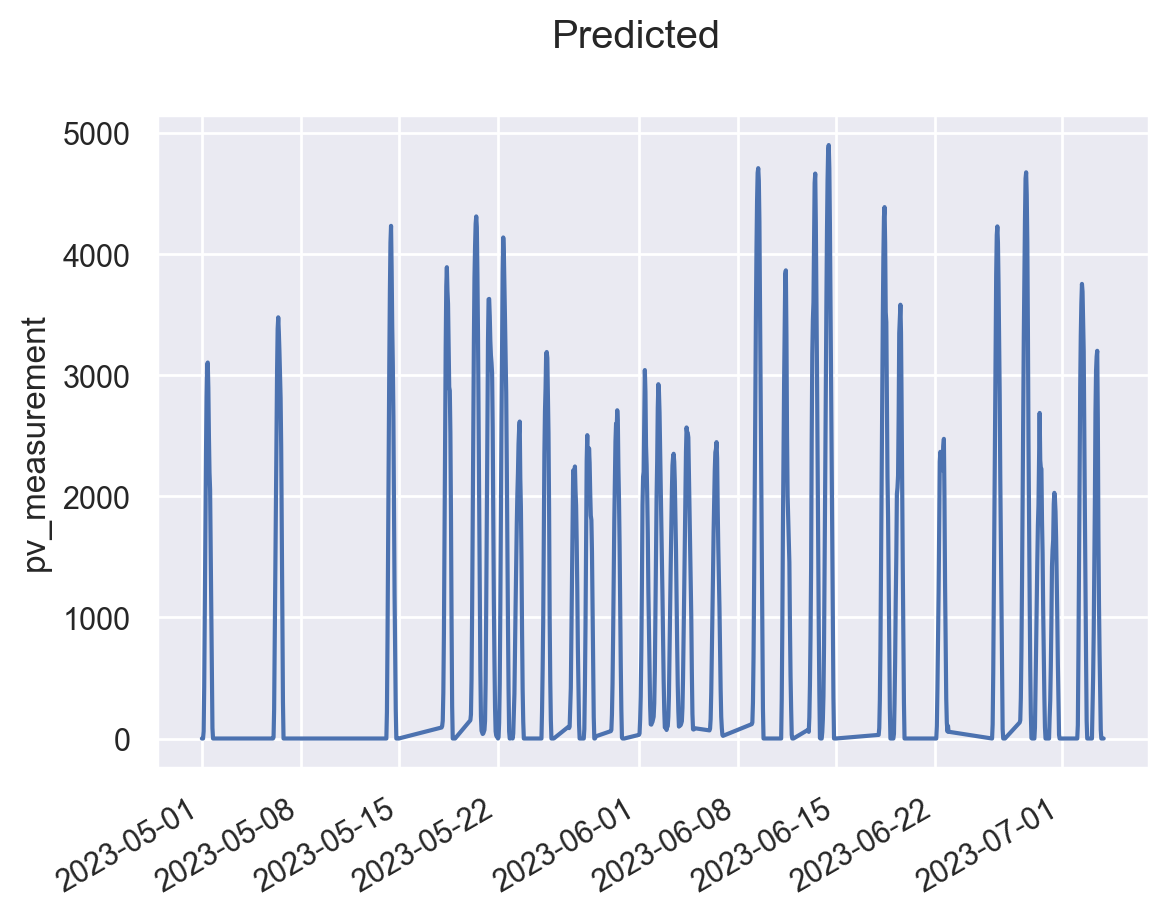

In [15]:
plt.plot(X_test_a_cleanest["date_forecast"],full_model_SARIMAX_a_fit_predicted)
plt.gcf().autofmt_xdate()
plt.ylabel("pv_measurement")
plt.suptitle("Predicted")
plt.show()

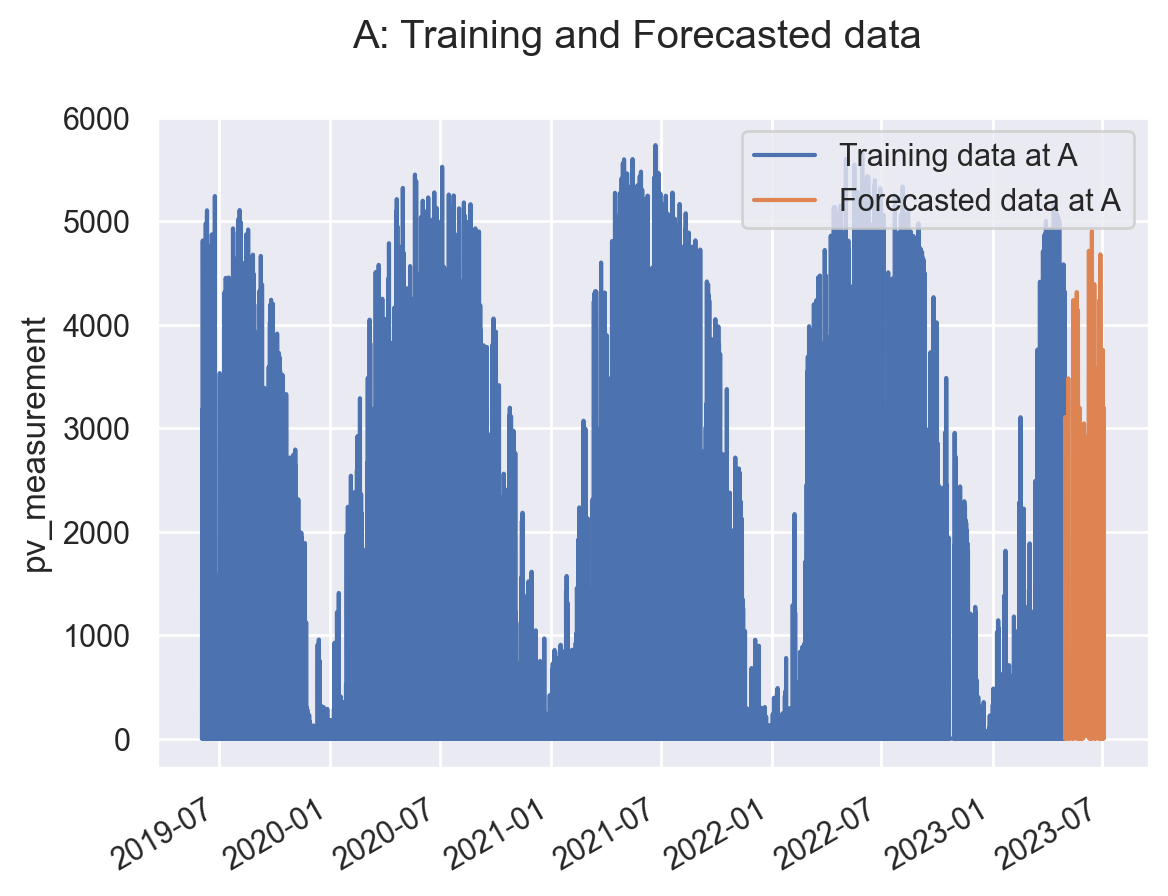

In [16]:

plt.plot(train_a_clean["time"], train_a_clean["pv_measurement"])
plt.plot(full_model_SARIMAX_a_fit_predicted_full["time"], full_model_SARIMAX_a_fit_predicted_full["pv_measurement"])
plt.gcf().autofmt_xdate()
plt.ylabel("pv_measurement")
plt.suptitle("A: Training and Forecasted data")
plt.legend(["Training data at A", "Forecasted data at A"], loc = "upper right")
plt.show()

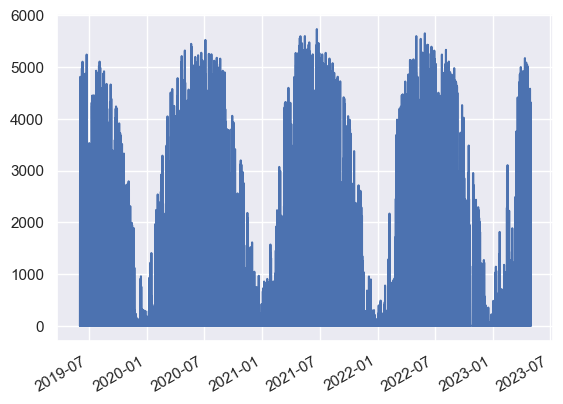

In [9]:
plt.plot(train_a_clean.iloc[:,[0]], train_a_clean.iloc[:,[1]])
plt.gcf().autofmt_xdate()
plt.show()

In [8]:
train_a[train_a.isna().any(axis=1)]

Empty DataFrame
Columns: [time, pv_measurement]
Index: []

In [6]:
train_a[train_a.isna().any(axis=1)].drop(train_a[train_a.isna().any(axis=1)].index)

Empty DataFrame
Columns: [time, pv_measurement]
Index: []

In [ ]:
.drop(train_b[train_b.isna().any(axis=1)].index)

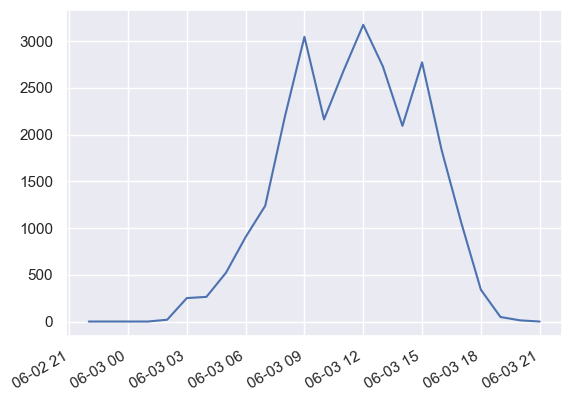

In [10]:
plt.plot(train_a.iloc[0:24,0], train_a.iloc[0:24,1])
plt.gcf().autofmt_xdate()
plt.show()

In [174]:
train_a[train_a.isna().any(axis=1)]

Empty DataFrame
Columns: [time, pv_measurement]
Index: []

In [37]:
X_train_a_cleanest[X_train_a_cleanest.isna().any(axis=1)]

Empty DataFrame
Columns: [date_forecast, absolute_humidity_2m:gm3, air_density_2m:kgm3, clear_sky_energy_1h:J, clear_sky_rad:W, dew_or_rime:idx, dew_point_2m:K, diffuse_rad:W, diffuse_rad_1h:J, direct_rad:W, direct_rad_1h:J, effective_cloud_cover:p, elevation:m, fresh_snow_12h:cm, fresh_snow_1h:cm, fresh_snow_24h:cm, fresh_snow_3h:cm, fresh_snow_6h:cm, is_day:idx, is_in_shadow:idx, msl_pressure:hPa, precip_5min:mm, precip_type_5min:idx, pressure_100m:hPa, pressure_50m:hPa, prob_rime:p, rain_water:kgm2, relative_humidity_1000hPa:p, sfc_pressure:hPa, snow_depth:cm, snow_drift:idx, snow_melt_10min:mm, snow_water:kgm2, sun_azimuth:d, sun_elevation:d, super_cooled_liquid_water:kgm2, t_1000hPa:K, total_cloud_cover:p, visibility:m, wind_speed_10m:ms, wind_speed_u_10m:ms, wind_speed_v_10m:ms, wind_speed_w_1000hPa:ms]
Index: []

In [43]:
X_test_a_cleanest[X_test_a_cleanest.isna().any(axis=1)]

Empty DataFrame
Columns: [date_forecast, absolute_humidity_2m:gm3, air_density_2m:kgm3, clear_sky_energy_1h:J, clear_sky_rad:W, dew_or_rime:idx, dew_point_2m:K, diffuse_rad:W, diffuse_rad_1h:J, direct_rad:W, direct_rad_1h:J, effective_cloud_cover:p, elevation:m, fresh_snow_12h:cm, fresh_snow_1h:cm, fresh_snow_24h:cm, fresh_snow_3h:cm, fresh_snow_6h:cm, is_day:idx, is_in_shadow:idx, msl_pressure:hPa, precip_5min:mm, precip_type_5min:idx, pressure_100m:hPa, pressure_50m:hPa, prob_rime:p, rain_water:kgm2, relative_humidity_1000hPa:p, sfc_pressure:hPa, snow_depth:cm, snow_drift:idx, snow_melt_10min:mm, snow_water:kgm2, sun_azimuth:d, sun_elevation:d, super_cooled_liquid_water:kgm2, t_1000hPa:K, total_cloud_cover:p, visibility:m, wind_speed_10m:ms, wind_speed_u_10m:ms, wind_speed_v_10m:ms, wind_speed_w_1000hPa:ms]
Index: []

In [21]:
best_params = auto_arima(train_a_clean["pv_measurement"], trace=True,suppress_warnings=True)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=505102.749, Time=17.61 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=514635.733, Time=0.28 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=512348.027, Time=0.35 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=512841.866, Time=0.97 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=514633.733, Time=0.15 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=511794.204, Time=2.65 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=511832.534, Time=3.20 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=20.38 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=505101.392, Time=22.59 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=13.80 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=505100.619, Time=18.28 sec
 ARIMA(4,1,3)(0,0,0)[0] intercept   : AIC=505541.431, Time=25.45 sec
 ARIMA(3,1,4)(0,0,0)[0] intercept   : AIC=inf, Time=30.29 sec
 ARIMA(2,1,4)(0,0,0)[0] intercept   : AIC=inf, Time=29.58 sec
 ARIMA(4,1,2)(0,0,0)[0] i

In [22]:
best_params.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                34061
Model:               SARIMAX(2, 1, 3)   Log Likelihood             -252542.218
Date:                Sun, 24 Sep 2023   AIC                         505096.437
Time:                        10:13:20   BIC                         505147.052
Sample:                             0   HQIC                        505112.580
                              - 34061                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.8642      0.002   1069.072      0.000       1.861       1.868
ar.L2         -0.9313      0.002   -553.823      0.000      -0.935      -0.928
ma.L1         -1.8371      0.003   -584.956      0.000      -1.843      -1.831
ma.L2          0.8382      0.005    154.801      0.000       0.828       0.849
ma.L3          0.0136      0.003      4.617      0.000       0.008       0.019
sigma2      1.615e+05    511.621    315.584      0.000     1.6e+05    1.62e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):            190481.16
Prob(Q):                              0.92   Prob(JB):                         0.00
Heteroskedasticity (H):               0.89   Skew:                             0.62
Prob(H) (two-sided):                  0.00   Kurtosis:                        14.52
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [11]:
model_sarimax = SARIMAX(train_a_clean["pv_measurement"], exog = X_train_a_cleanest.iloc[:,1:], order = (2, 1, 3))

C:\Users\olara\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\olara\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [12]:
model_sarimax_fit = model_sarimax.fit()

C:\Users\olara\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\olara\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


In [39]:
model_sarimax_fit_predicted = model_sarimax_fit.predict(start=len(X_train_a_cleanest), end=(len(X_train_a_cleanest) + len(X_test_a_cleanest[0:(24*3)])-1), type = "levels", exog = X_test_a_cleanest.iloc[0:(24*3),1:])

C:\Users\olara\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


In [40]:
print(model_sarimax_fit.summary())

                               SARIMAX Results                                
Dep. Variable:         pv_measurement   No. Observations:                34061
Model:               SARIMAX(2, 1, 3)   Log Likelihood             -250029.255
Date:                Mon, 25 Sep 2023   AIC                         500154.511
Time:                        10:55:01   BIC                         500559.433
Sample:                             0   HQIC                        500283.655
                              - 34061                                         
Covariance Type:                  opg                                         
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
absolute_humidity_2m:gm3          64.4611     23.427      2.752      0.006      18.546     110.377
air_density_2m:kgm3            -1.457e+04      2.105  -6919.940      0.

In [153]:
i=0
len(X_train_a_cleanest) + (24*i)

34061

In [154]:
len(X_train_a_cleanest) + (24*i)

34061

In [150]:
X_test_a_cleanest.iloc[(24*i):(24*(i+1)),1:]

absolute_humidity_2m:gm3  air_density_2m:kgm3  clear_sky_energy_1h:J  \
24                  4.480000               1.2976           0.000000e+00   
25                  4.300000               1.2990           0.000000e+00   
26                  4.200000               1.2998           2.802400e+02   
27                  4.200000               1.2980           4.031532e+04   
28                  4.320000               1.2926           2.392327e+05   
29                  4.480000               1.2854           6.132416e+05   
30                  4.560000               1.2786           1.074981e+06   
31                  4.600000               1.2712           1.544317e+06   
32                  4.679999               1.2644           1.968846e+06   
33                  4.700000               1.2586           2.310430e+06   
34                  4.700000               1.2546           2.541221e+06   
35                  4.240000               1.2514           2.643229e+06   
36                  3.600000               1.2494           2.608656e+06   
37                  3.280000               1.2482           2.440142e+06   
38                  3.200000               1.2452           2.150674e+06   
39                  3.240000               1.2428           1.763237e+06   
40                  3.440000               1.2428           1.310693e+06   
41                  4.200000               1.2468           8.374087e+05   
42                  5.000000               1.2558           4.075204e+05   
43                  5.000000               1.2642           1.143632e+05   
44                  4.900000               1.2698           7.992319e+03   
45                  5.040000               1.2768           0.000000e+00   
46                  5.060000               1.2828           0.000000e+00   
47                  5.460000               1.2828           0.000000e+00   

    clear_sky_rad:W  dew_or_rime:idx  dew_point_2m:K  diffuse_rad:W  \
24         0.000000              0.0      272.180023       0.000000   
25         0.000000              0.0      271.559998       0.000000   
26         1.000000              0.0      271.220001       0.900000   
27        29.559998              0.0      271.240021      20.860001   
28       111.919998              0.0      271.759979      51.079998   
29       232.619995              0.0      272.260010      93.220001   
30       364.820007              0.0      272.600006     159.839996   
31       490.979980              0.0      272.880005     198.180008   
32       598.920044              0.0      273.100006     216.180008   
33       679.460022              0.0      273.260010     246.160004   
34       726.299927              0.0      273.360016     274.919983   
35       735.779968              0.0      271.860016     293.079987   
36       707.220032              0.0      269.619995     275.200012   
37       642.780029              0.0      268.499969     223.140015   
38       547.460022              0.0      268.100006     142.600006   
39       429.059998              0.0      268.360016      98.080002   
40       298.080017              0.0      269.119995      73.180000   
41       168.980011              0.0      271.660004      55.859997   
42        63.980000              0.0      274.100006      33.680000   
43         9.100000              0.0      273.980011       7.480000   
44         0.000000              0.0      273.639984       0.000000   
45         0.000000              0.0      274.000000       0.000000   
46         0.000000              0.0      273.980042       0.000000   
47         0.000000              0.2      274.760010       0.000000   

    diffuse_rad_1h:J  direct_rad:W  direct_rad_1h:J  effective_cloud_cover:p  \
24      0.000000e+00      0.000000     0.000000e+00                99.940002   
25      0.000000e+00      0.000000     0.000000e+00               100.000000   
26      1.624740e+03      0.000000     0.000000e+00                99.340004   
27     

In [160]:
X_test_a_cleanest.iloc[(24*i):(24*(i+1)),1:].reset_index(drop=True)

absolute_humidity_2m:gm3  air_density_2m:kgm3  clear_sky_energy_1h:J  \
0                   4.480000               1.2976           0.000000e+00   
1                   4.300000               1.2990           0.000000e+00   
2                   4.200000               1.2998           2.802400e+02   
3                   4.200000               1.2980           4.031532e+04   
4                   4.320000               1.2926           2.392327e+05   
5                   4.480000               1.2854           6.132416e+05   
6                   4.560000               1.2786           1.074981e+06   
7                   4.600000               1.2712           1.544317e+06   
8                   4.679999               1.2644           1.968846e+06   
9                   4.700000               1.2586           2.310430e+06   
10                  4.700000               1.2546           2.541221e+06   
11                  4.240000               1.2514           2.643229e+06   
12                  3.600000               1.2494           2.608656e+06   
13                  3.280000               1.2482           2.440142e+06   
14                  3.200000               1.2452           2.150674e+06   
15                  3.240000               1.2428           1.763237e+06   
16                  3.440000               1.2428           1.310693e+06   
17                  4.200000               1.2468           8.374087e+05   
18                  5.000000               1.2558           4.075204e+05   
19                  5.000000               1.2642           1.143632e+05   
20                  4.900000               1.2698           7.992319e+03   
21                  5.040000               1.2768           0.000000e+00   
22                  5.060000               1.2828           0.000000e+00   
23                  5.460000               1.2828           0.000000e+00   

    clear_sky_rad:W  dew_or_rime:idx  dew_point_2m:K  diffuse_rad:W  \
0          0.000000              0.0      272.180023       0.000000   
1          0.000000              0.0      271.559998       0.000000   
2          1.000000              0.0      271.220001       0.900000   
3         29.559998              0.0      271.240021      20.860001   
4        111.919998              0.0      271.759979      51.079998   
5        232.619995              0.0      272.260010      93.220001   
6        364.820007              0.0      272.600006     159.839996   
7        490.979980              0.0      272.880005     198.180008   
8        598.920044              0.0      273.100006     216.180008   
9        679.460022              0.0      273.260010     246.160004   
10       726.299927              0.0      273.360016     274.919983   
11       735.779968              0.0      271.860016     293.079987   
12       707.220032              0.0      269.619995     275.200012   
13       642.780029              0.0      268.499969     223.140015   
14       547.460022              0.0      268.100006     142.600006   
15       429.059998              0.0      268.360016      98.080002   
16       298.080017              0.0      269.119995      73.180000   
17       168.980011              0.0      271.660004      55.859997   
18        63.980000              0.0      274.100006      33.680000   
19         9.100000              0.0      273.980011       7.480000   
20         0.000000              0.0      273.639984       0.000000   
21         0.000000              0.0      274.000000       0.000000   
22         0.000000              0.0      273.980042       0.000000   
23         0.000000              0.2      274.760010       0.000000   

    diffuse_rad_1h:J  direct_rad:W  direct_rad_1h:J  effective_cloud_cover:p  \
0       0.000000e+00      0.000000     0.000000e+00                99.940002   
1       0.000000e+00      0.000000     0.000000e+00               100.000000   
2       1.624740e+03      0.000000     0.000000e+00                99.340004   
3      

In [163]:
(len(X_train_a_cleanest) + (24*i) + len(X_test_a_cleanest.iloc[(24*i):(24*(i+1))])-1)

34108

In [171]:
i=30
predict = (model_sarimax_fit.predict(start=(len(X_train_a_cleanest)), end=((len(X_train_a_cleanest)) + len(X_test_a_cleanest.iloc[0:(24*(i+1))])-1), type = "levels", exog = X_test_a_cleanest.iloc[0:(24*(i+1)),1:].reset_index(drop=True)))

C:\Users\olara\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


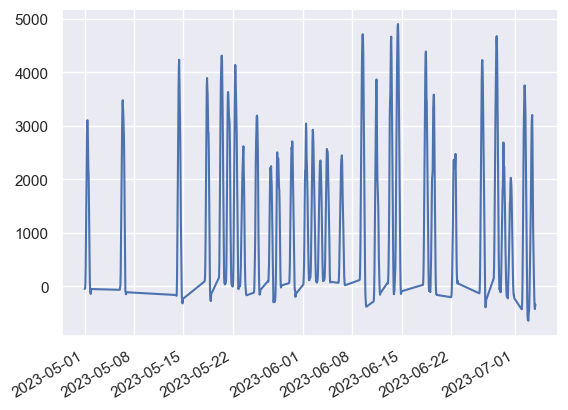

In [173]:
plt.plot(X_test_a_cleanest["date_forecast"],predict)
plt.gcf().autofmt_xdate()
plt.show()

In [80]:
test = model_sarimax_fit.pvalues.reset_index()
new_names = np.array(test.iloc[:42][test.iloc[:,1] < 0.05]["index"])

C:\Users\olara\AppData\Local\Temp\ipykernel_15152\1954930134.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  new_names = np.array(test.iloc[:42][test.iloc[:,1] < 0.05]["index"])


In [81]:
new_train_sign = X_train_a_cleanest[new_names]

In [83]:
new_test_sign = X_test_a_cleanest[new_names]

In [84]:
model_sarimax_testing = SARIMAX(train_a_clean["pv_measurement"], exog = new_train_sign, order = (2, 1, 3))

C:\Users\olara\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\olara\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [85]:
model_sarimax_testing_fit = model_sarimax_testing.fit()

C:\Users\olara\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\olara\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\olara\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [87]:
model_sarimax_testing_fit_predicted = model_sarimax_testing_fit.predict(start=len(X_train_a_cleanest), end=(len(X_train_a_cleanest) + len(X_test_a_cleanest)-1), type = "levels", exog = new_test_sign)

C:\Users\olara\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


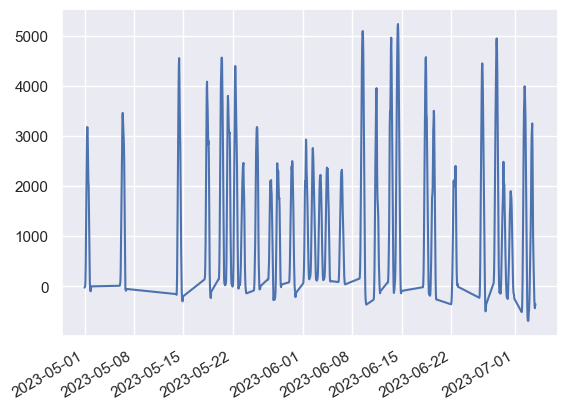

In [88]:
plt.plot(X_test_a_cleanest["date_forecast"],model_sarimax_testing_fit_predicted)
plt.gcf().autofmt_xdate()
plt.show()

In [89]:
print(model_sarimax_testing_fit.summary())

                               SARIMAX Results                                
Dep. Variable:         pv_measurement   No. Observations:                34061
Model:               SARIMAX(2, 1, 3)   Log Likelihood             -248963.328
Date:                Sun, 24 Sep 2023   AIC                         497976.655
Time:                        20:45:49   BIC                         498187.552
Sample:                             0   HQIC                        498043.918
                              - 34061                                         
Covariance Type:                  opg                                         
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
absolute_humidity_2m:gm3    23.7737      6.620      3.591      0.000      10.798      36.749
air_density_2m:kgm3      -1.171e+04      3.614  -3239.016      0.000   -1.17e+04   -1.17e

In [95]:
test_test = model_sarimax_testing_fit.pvalues.reset_index()
new_new_names = np.array(test_test.iloc[:19][test_test.iloc[:,1] < 0.05]["index"])

C:\Users\olara\AppData\Local\Temp\ipykernel_15152\381966519.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  new_new_names = np.array(test_test.iloc[:19][test_test.iloc[:,1] < 0.05]["index"])


In [99]:
new_new_train_sign = X_train_a_cleanest[new_new_names]

In [100]:
new_new_test_sign = X_test_a_cleanest[new_new_names]

In [101]:
model_sarimax_testing = SARIMAX(train_a_clean["pv_measurement"], exog = new_new_train_sign, order = (2, 1, 3))

C:\Users\olara\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\olara\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [102]:
model_sarimax_testing_fit = model_sarimax_testing.fit()

C:\Users\olara\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\olara\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\olara\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [103]:
model_sarimax_testing_fit_predicted = model_sarimax_testing_fit.predict(start=len(X_train_a_cleanest), end=(len(X_train_a_cleanest) + len(X_test_a_cleanest)-1), type = "levels", exog = new_new_test_sign)

C:\Users\olara\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


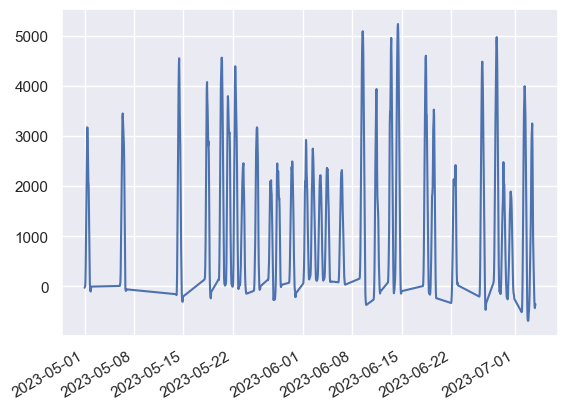

In [104]:
plt.plot(X_test_a_cleanest["date_forecast"],model_sarimax_testing_fit_predicted)
plt.gcf().autofmt_xdate()
plt.show()

In [105]:
print(model_sarimax_testing_fit.summary())

                               SARIMAX Results                                
Dep. Variable:         pv_measurement   No. Observations:                34061
Model:               SARIMAX(2, 1, 3)   Log Likelihood             -248965.314
Date:                Sun, 24 Sep 2023   AIC                         497976.629
Time:                        20:50:16   BIC                         498170.654
Sample:                             0   HQIC                        498038.510
                              - 34061                                         
Covariance Type:                  opg                                         
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
absolute_humidity_2m:gm3    24.5095      6.651      3.685      0.000      11.474      37.545
air_density_2m:kgm3      -1.066e+04      1.799  -5924.819      0.000   -1.07e+04   -1.07e

In [ ]:
test_test = model_sarimax_testing_fit.pvalues.reset_index()
new_new_names = np.array(test_test.iloc[:19][test_test.iloc[:,1] < 0.05]["index"])

C:\Users\olara\AppData\Local\Temp\ipykernel_15152\381966519.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  new_new_names = np.array(test_test.iloc[:19][test_test.iloc[:,1] < 0.05]["index"])


In [48]:
model = ARIMA(np.array(train_a_clean["pv_measurement"]), exog = np.array(X_train_a_cleanest.iloc[:,1:43]), order = (2, 1, 3))

In [49]:
model_fit = model.fit()

In [50]:
model_fit_predicted = model_fit.predict(start=len(X_train_a_cleanest), end=(len(X_train_a_cleanest) + len(X_test_a_cleanest)-1), type = "levels", exog = np.array(X_test_a_cleanest.iloc[:,1:43]))

In [51]:
model_fit_predicted

array([-4.73212674e+01, -4.47204628e+01, -3.34847103e+01,  5.97027624e+01,
        4.26489866e+02,  1.01914663e+03,  1.71196269e+03,  2.35115006e+03,
        2.81960740e+03,  3.08512490e+03,  3.10650797e+03,  2.89776451e+03,
        2.49758196e+03,  2.19549193e+03,  2.05744624e+03,  1.55609094e+03,
        1.00634064e+03,  4.99147833e+02,  8.58671885e+01, -8.78910397e+01,
       -1.12483743e+02, -1.40054153e+02, -7.50206981e+01, -4.92835906e+01,
       -6.30771138e+01, -1.37375911e+01,  1.05584398e+01,  2.39844727e+02,
        8.05567054e+02,  1.43025931e+03,  1.93861450e+03,  2.48817673e+03,
        3.03568965e+03,  3.38485769e+03,  3.48000022e+03,  3.35886473e+03,
        3.20174699e+03,  3.01369935e+03,  2.81591585e+03,  2.41114628e+03,
        1.77367278e+03,  1.03199494e+03,  3.03245665e+02, -9.60266876e+01,
       -1.13838073e+02, -1.46883042e+02, -1.41969834e+02, -1.08712468e+02,
       -1.60726539e+02, -1.76721656e+02, -1.15322662e+02,  2.20012494e+02,
        8.40083105e+02,  

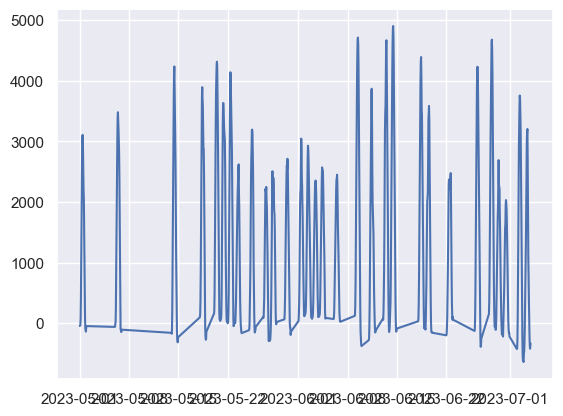

In [52]:
plt.plot(X_test_a_cleanest["date_forecast"],model_fit_predicted)

In [25]:
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                34061
Model:                 ARIMA(2, 1, 3)   Log Likelihood             -250029.255
Date:                Sun, 24 Sep 2023   AIC                         500154.511
Time:                        10:15:42   BIC                         500559.433
Sample:                             0   HQIC                        500283.655
                              - 34061                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1            64.4611     23.427      2.752      0.006      18.546     110.377
x2         -1.457e+04      2.101  -6934.412      0.000   -1.46e+04   -1.46e+04
x3            -0.0001   6.59e-05     -1.834      0.0

In [53]:
model_test = ARIMA(np.array(train_a_clean["pv_measurement"]), order = (2, 1, 3))

In [54]:
model_test_fit = model_test.fit()

C:\Users\olara\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [55]:
model_test_fit_predicted = model_test_fit.predict(start=len(X_train_a_cleanest), end=(len(X_train_a_cleanest) + len(X_test_a_cleanest)-1), type = "levels")

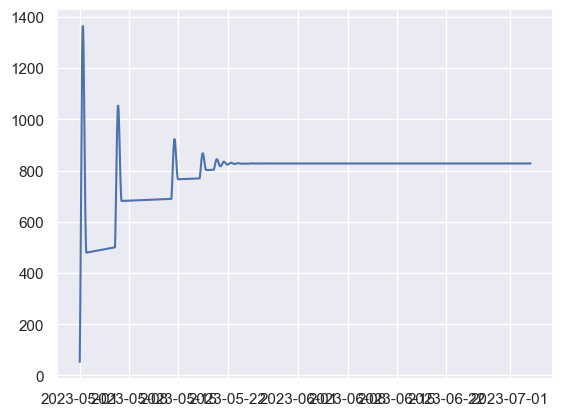

In [56]:
plt.plot(X_test_a_cleanest["date_forecast"],model_test_fit_predicted)

In [28]:
print(model_test_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                34061
Model:                 ARIMA(2, 1, 3)   Log Likelihood             -252542.218
Date:                Sun, 24 Sep 2023   AIC                         505096.437
Time:                        10:16:17   BIC                         505147.052
Sample:                             0   HQIC                        505112.580
                              - 34061                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.8642      0.002   1069.072      0.000       1.861       1.868
ar.L2         -0.9313      0.002   -553.823      0.000      -0.935      -0.928
ma.L1         -1.8371      0.003   -584.956      0.0

In [50]:
model.predict(start=len(X_train_a_cleanest), end=(len(X_train_a_cleanest) + len(X_test_estimated_a_clean)-1), typ = "levels")

TypeError: Model.predict() missing 1 required positional argument: 'params'